In [243]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from itertools import combinations

In [244]:
# without pd
def load_file(f):
    dataset = []
    with open(f, "r") as file:
              for line in file:
                  dataset.append(line.strip().split(','))
    return dataset

In [245]:
dataset = load_file("Dataset1.csv")
for data in dataset:
    print(data)

['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM', 'Fertility']
['138', '8.6', '560', '7.46', '0.62', '0.7', '5.9', '0.24', '0.31', '0.77', '8.71', '0.11', '1.204', '0']
['213', '7.5', '338', '7.62', '0.75', '1.06', '25.4', '0.3', '0.86', '1.54', '2.89', '2.29', '1.8232', '0']
['163', '9.6', '718', '7.59', '0.51', '1.11', '14.3', '0.3', '0.86', '1.57', '2.7', '2.03', '1.9092', '0']
['157', '6.8', '475', '7.64', '0.58', '0.94', '26', '0.34', '0.54', '1.53', '2.65', '1.82', '1.6168', '0']
['270', '9.9', '444', '7.63', '0.4', '0.86', '11.8', '0.25', '0.76', '1.69', '2.43', '2.26', '1.4792', '1']
['220', '8.6', '444', '7.43', '0.65', '0.72', '11.7', '0.37', '0.66', '0.9', '2.19', '1.82', '1.2384', '0']
['220', '7.2', '222', '7.62', '0.43', '0.81', '7.4', '0.34', '0.69', '1.05', '2', '1.88', '1.3932', '0']
['207', '7', '401', '7.63', '0.59', '0.69', '7.6', '0.32', '0.68', '0.62', '2.43', '1.68', '1.1868', '0']
['333', '14.9', '422', '8.26', '0.48', 'NA', '8.45', '0.51

## 1.1.1. Manipulation de dataset

In [246]:
def load(f):
    dataset = pd.read_csv(f)
    return dataset
dataset = load("Dataset1.csv")
print(dataset)

       N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1

In [247]:
# infos de base du dataset
def info_dataset(dataset):
    dataset.info()
    print(dataset.head())
    print(dataset.shape)
info_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB
     N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0

In [248]:
import re

def aff_nombres_manquants(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    column = dataset_sorted[attr]
    manquant = 0

    integer_pattern = re.compile(r'^[+-]?\d+$')
    decimal_pattern = re.compile(r'^[+-]?\d*\.\d+$')

    for i in column:
        if (integer_pattern.match(str(i)) or decimal_pattern.match(str(i))):
            continue
        else:
            manquant += 1

    print("Le nombre de valeurs manquantes est de :", manquant)
    print("Le pourcentage de valeurs manquantes est de:",
          manquant * 100 / len(dataset_sorted), '%')


In [249]:
for attr in dataset.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants(dataset, attr)     

COLUMN: N
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: P
Le nombre de valeurs manquantes est de : 2
Le pourcentage de valeurs manquantes est de: 0.22598870056497175 %
COLUMN: K
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: pH
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: EC
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: OC
Le nombre de valeurs manquantes est de : 1
Le pourcentage de valeurs manquantes est de: 0.11299435028248588 %
COLUMN: S
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: Zn
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: Fe
Le nombre de valeurs manquantes est de : 0
Le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: Cu
Le nombre de val

N : Azote (Nitrogen)<br>
P : Phosphore (Phosphorus)<br>
K : Potassium<br>
pH : Potentiel Hydrogène, mesure de l'acidité ou de la basicité du sol<br>
EC : Conductivité électrique, mesure de la capacité du sol à conduire l'électricité<br>
OC : Carbone organique<br>
S : Soufre<br>
Zn : Zinc<br>
Fe : Fer<br>
Cu : Cuivre<br>
Mn : Manganèse<br>
B : Bore<br>
OM : Matière organique<br>
Fertility : Fertilité du sol (peut être une mesure composite basée sur plusieurs des paramètres mentionnés)

This dataset represents a detailed view of the physical and chemical properties of soil, which is essential for understanding its agricultural potential and its ability to support plant growth.The 

The attributes provided seem to represent various properties or measurements related to soil. Here's a brief interpretation of each attribute:

10. *N (Nitrogen):* Represents the nitrogen content in the soil, which is an essential nutrient for plant growth. [100,500]

2. *P (Phosphorus):* Indicates the phosphorus content in the soil, another vital nutrient for plant development. [0,80]

3. *K (Potassium):* Reflects the potassium content in the soil, an essential element for overall plant health. [160,880]

4. *pH:* Denotes the pH level of the soil, which is a measure of its acidity or alkalinity. pH is crucial as it affects nutrient availability to plants. [3,9]

5. *EC (Electrical Conductivity):* Measures the soil's ability to conduct an electrical current, providing an indication of the soil's salinity or fertility. [0.11,0.57]

6. *OC (Organic Carbon):* Indicates the amount of organic carbon present in the soil, which is a key component of soil organic matter. [0,14]

7. *S (Sulfur):* Represents the sulfur content in the soil, which is another essential nutrient for plants. [0,18]

8. *Zn (Zinc):* Indicates the zinc content in the soil, an essential micronutrient for plant growth. [0.12,2.17]

9. *Fe (Iron):* Represents the iron content in the soil, another important micronutrient for plants. [0.2,55]

10. *Cu (Copper):* Denotes the copper content in the soil, which is a micronutrient required in small amounts for plant growth. [0,3.0]

11. *Mn (Manganese):* Indicates the manganese content in the soil, a micronutrient essential for various metabolic processes in plants. [0.1,13]

12. *B (Boron):* Represents the boron content in the soil, which is a micronutrient important for plant development. [0.04,7.40]

13. *OM (Organic Matter):* Indicates the overall organic matter content in the soil, which is crucial for soil structure and fertility. [0,20]

14. *Fertility:* Represents an overall measure of soil fertility, likely calculated based on the combination of various nutrient levels and other soil properties.

These attributes collectively provide a comprehensive set of information about the soil, allowing for the assessment of its fertility and the potential for supporting plant growth.

## Analyse des caractéristiques des attributs du dataset :

In [250]:
def centers(dataset, attr):
    # Sort dataset by given column
    dataset_sorted = dataset.sort_values(by=attr)
    # print(dataset_sorted)
    
    # Calculate moyenne
    avg = 0
    cpt = len(dataset_sorted)
    column = dataset_sorted[attr]
    # print("column: \n")
    # print(column)
    valid_count = 0
    
    for value in column:
        # Check the type of the value
        if not pd.isna(value) and value != '?':
            avg += float(value)
            valid_count += 1
    
    # Calculate the average only for valid numeric values
    # avg = avg / cpt if cpt != 0 else 0
    # Calculate the average only for valid numeric values
    avg = avg / valid_count if valid_count != 0 else 0
    
    # Calculate median
    if cpt % 2 == 0:  # pair
        idx1 = cpt // 2
        idx2 = (cpt // 2) - 1
        med = (column.iloc[idx1] + column.iloc[idx2]) / 2
    else:
        idx = cpt // 2
        med = column.iloc[idx]
    
    # Calculate mode
    # Count occurrences of each unique value
    counts = {}
    for value in column:
        # Check the type of the value
        if isinstance(value, (int, float)):
            counts[value] = counts.get(value, 0) + 1
    
    # Find the mode(s)
    mode_values = [key for key, value in counts.items() if value == max(counts.values())]
    
    if len(mode_values) == 1:
        # print('only one')
        mode = mode_values[0]
    else:
        # If multiple modes, return a tuple of modes
        # print('multiple')
        mode = tuple(mode_values)
        
    
    
    return avg, med, mode


In [251]:
for attr in dataset.columns:
    print('COLUMN:', attr)
    avg, med, mode = centers(dataset,attr)
    # Check if avg = med = mode
    print('AVERAGE: ', avg, '...', 'MEDIAN: ', med, 'MODE: ', mode)
    if avg == med == mode:
        print("The average, median, and mode are equal. SYMMETRICAL")
    else:
        print("The average, median, and mode are not equal. NOT SYMMETRICAL")

COLUMN: N
AVERAGE:  246.99774011299436 ... MEDIAN:  257 MODE:  207
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: P
AVERAGE:  14.55526613816532 ... MEDIAN:  7 MODE:  ()
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: K
AVERAGE:  501.33898305084745 ... MEDIAN:  475 MODE:  444
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: pH
AVERAGE:  7.5119548022599005 ... MEDIAN:  7.5 MODE:  7.5
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: EC
AVERAGE:  0.5439209039548033 ... MEDIAN:  0.55 MODE:  (0.53, 0.62)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: OC
AVERAGE:  0.617816742081446 ... MEDIAN:  0.59 MODE:  0.88
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: S
AVERAGE:  7.545807909604504 ... MEDIAN:  6.64 MODE:  (4.22, 5.13)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: Zn
AVERAGE:  0.4687231638418061 ... MEDIAN:  0.36 MODE:  0.28
The average, me

In [252]:
def quartiles(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    
    n = len(dataset_sorted)
    
    # Convert the column to numeric, coercing errors to NaN
    column = pd.to_numeric(dataset_sorted[attr], errors='coerce')
    # print(column)
    
    q0 = column.iloc[0]
    # q4 = column.iloc[-1]
    # q4_values = column.dropna().values  # Drop NaN values before selecting last element
    # q4 = q4_values[-1] if len(q4_values) > 0 else None  # Set q4 to None if there are no valid values
    q4 = column.max()
    
    # Calculate q2
    x, q2, _ = centers(dataset, attr)
    
    # calculate q1
    if n % 4 == 0:  # if divisible by 4 --> 1/4
        q1_idx1 = n // 4
        q1_idx2 = (n // 4) - 1
        q1 = (column.iloc[q1_idx1] + column.iloc[q1_idx2]) / 2
    else:
        q1_idx = n // 4
        q1 = column.iloc[q1_idx]
    
    # calculate q3
    if (3 * n) % 4 == 0:  # if 3 * n is divisible by 4 --> 3/4
        q3_idx1 = (3 * n) // 4
        q3_idx2 = ((3 * n) // 4) - 1
        q3 = (column.iloc[q3_idx1] + column.iloc[q3_idx2]) / 2
    else:
        q3_idx = (3 * n) // 4
        q3 = column.iloc[q3_idx]
    
    return q0, q1, q2, q3, q4

for attr in dataset.columns:
    print('COLUMN:', attr)
    q0, q1, q2, q3, q4 = quartiles(dataset, attr)
    print('q0: ', q0)
    print('q1: ', q1)
    print('q2: ', q2)
    print('q3: ', q3)
    print('q4: ', q4)


COLUMN: N
q0:  6
q1:  201
q2:  257
q3:  307
q4:  383
COLUMN: P
q0:  10.1
q1:  4.8
q2:  7
q3:  8.1
q4:  125.0
COLUMN: K
q0:  11
q1:  412
q2:  475
q3:  581
q4:  1560
COLUMN: pH
q0:  0.9
q1:  7.35
q2:  7.5
q3:  7.63
q4:  11.15
COLUMN: EC
q0:  0.1
q1:  0.43
q2:  0.55
q3:  0.64
q4:  0.95
COLUMN: OC
q0:  0.1
q1:  0.38
q2:  0.59
q3:  0.78
q4:  24.0
COLUMN: S
q0:  0.64
q1:  4.7
q2:  6.64
q3:  8.75
q4:  31.0
COLUMN: Zn
q0:  0.07
q1:  0.28
q2:  0.36
q3:  0.47
q4:  42.0
COLUMN: Fe
q0:  0.21
q1:  2.05
q2:  3.56
q3:  6.32
q4:  44.0
COLUMN: Cu
q0:  0.09
q1:  0.63
q2:  0.93
q3:  1.25
q4:  3.02
COLUMN: Mn
q0:  0.11
q1:  6.21
q2:  8.34
q3:  11.47
q4:  31.0
COLUMN: B
q0:  0.06
q1:  0.27
q2:  0.41
q3:  0.61
q4:  2.82
COLUMN: OM
q0:  0.172
q1:  0.6536
q2:  1.0148
q3:  1.3416
q4:  41.28
COLUMN: Fertility
q0:  0
q1:  0
q2:  1
q3:  1
q4:  2


Aberrant values in column N are 38
Aberrant values in column N are 19
Aberrant values in column N are 38
Aberrant values in column N are 25
Aberrant values in column N are 31
Aberrant values in column N are 19
Aberrant values in column N are 6
Aberrant values in column N are 13
Aberrant values in column N are 6
Aberrant values in column N are 31
Aberrant values in column N are 6
Aberrant values in column N are 25
Aberrant values in column N are 31


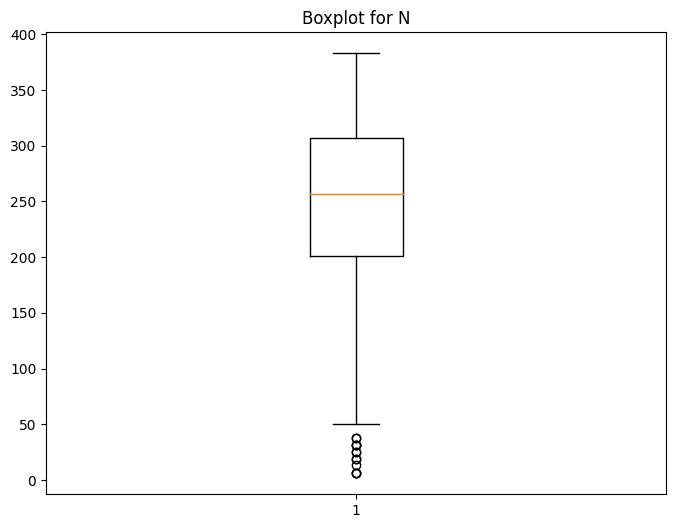

Aberrant values in column P are 14.9
Aberrant values in column P are 59.2
Aberrant values in column P are 14.5
Aberrant values in column P are 78.9
Aberrant values in column P are 14.9
Aberrant values in column P are 14.3
Aberrant values in column P are 14.7
Aberrant values in column P are 13.4
Aberrant values in column P are 18.4
Aberrant values in column P are 20.4
Aberrant values in column P are 19.3
Aberrant values in column P are 18.2
Aberrant values in column P are 19.5
Aberrant values in column P are 20.8
Aberrant values in column P are 21.5
Aberrant values in column P are 20.4
Aberrant values in column P are 21.1
Aberrant values in column P are 14.7
Aberrant values in column P are 15.6
Aberrant values in column P are 13.4
Aberrant values in column P are 14.9
Aberrant values in column P are 13.8
Aberrant values in column P are 76.8
Aberrant values in column P are 103.1
Aberrant values in column P are 78.9
Aberrant values in column P are 63.6
Aberrant values in column P are 61.4


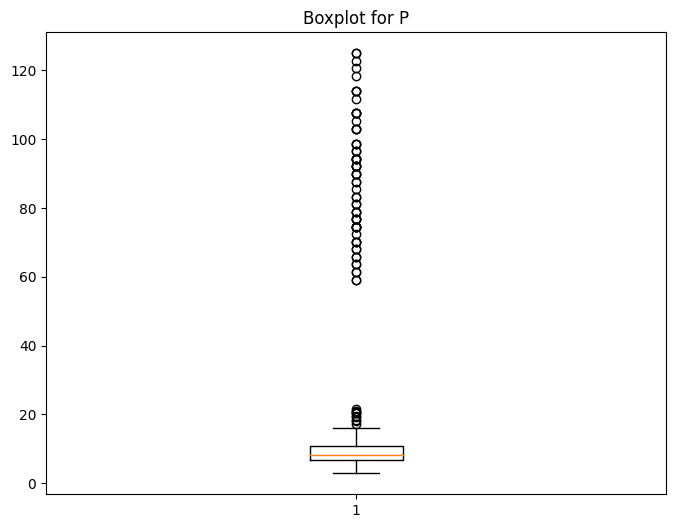

Aberrant values in column K are 127
Aberrant values in column K are 11
Aberrant values in column K are 887
Aberrant values in column K are 876
Aberrant values in column K are 845
Aberrant values in column K are 887
Aberrant values in column K are 1560
Aberrant values in column K are 845
Aberrant values in column K are 887


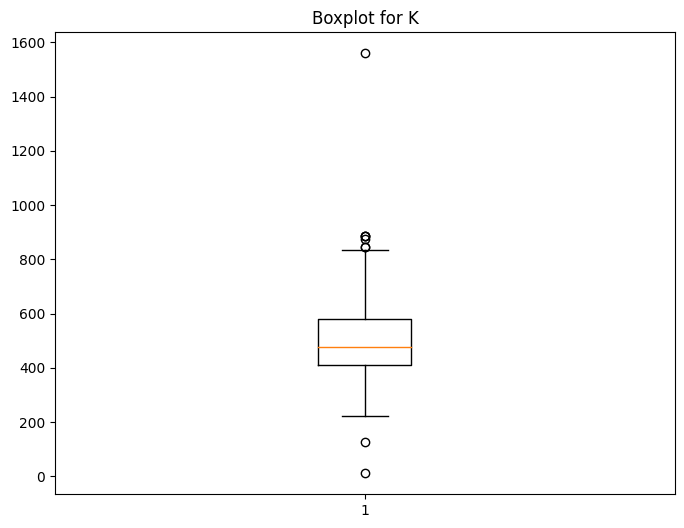

Aberrant values in column pH are 8.26
Aberrant values in column pH are 8.23
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.3
Aberrant values in column pH are 9.97
Aberrant values in column pH are 0.9
Aberrant values in column pH are 0.9
Aberrant values in column pH are 8.3
Aberrant values in column pH are 8.4
Aberrant values in column pH are 8.95
Aberrant values in column pH are 9.5
Aberrant values in column pH are 10.05
Aberrant values in column pH are 10.6
Aberrant values in column pH are 11.15
Aberrant values in column pH are 8.26
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.4
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.2
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.12
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.3
Aberrant values in column pH are 8.2
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.1
Aberrant values in column p

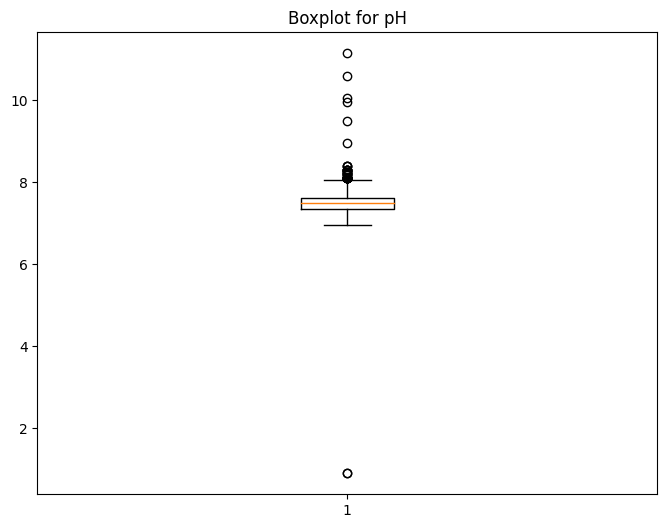

Aberrant values in column EC are 0.1


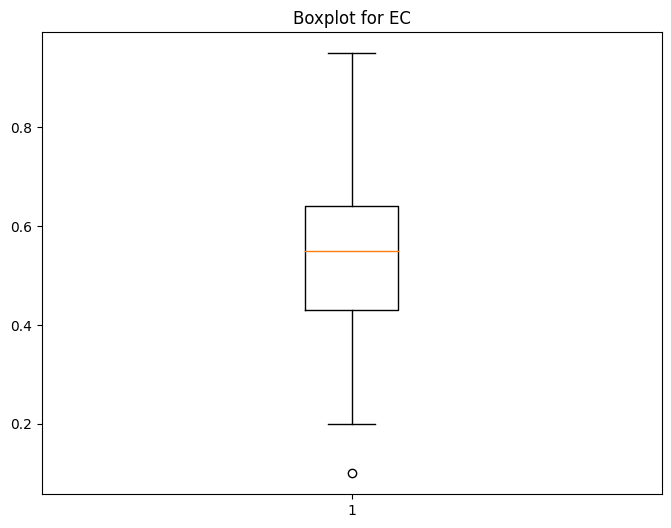

Aberrant values in column OC are 24.0


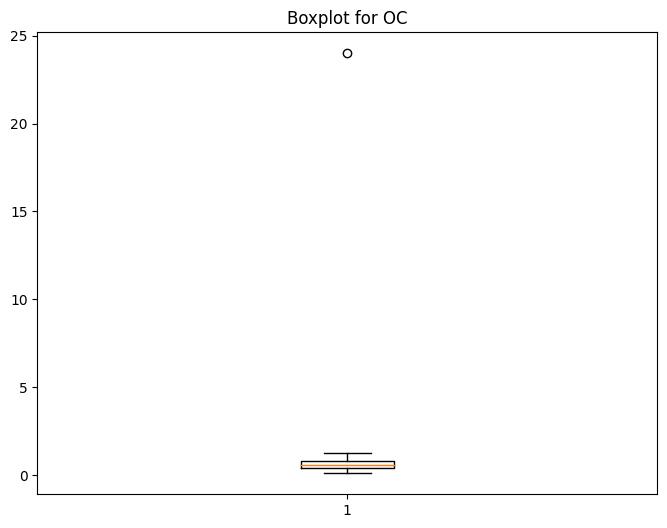

Aberrant values in column S are 25.4
Aberrant values in column S are 26.0
Aberrant values in column S are 23.6
Aberrant values in column S are 27.2
Aberrant values in column S are 15.8
Aberrant values in column S are 26.2
Aberrant values in column S are 26.0
Aberrant values in column S are 15.8
Aberrant values in column S are 15.0
Aberrant values in column S are 25.4
Aberrant values in column S are 22.4
Aberrant values in column S are 21.0
Aberrant values in column S are 22.4
Aberrant values in column S are 24.0
Aberrant values in column S are 26.0
Aberrant values in column S are 25.4
Aberrant values in column S are 16.0
Aberrant values in column S are 16.0
Aberrant values in column S are 17.4
Aberrant values in column S are 26.0
Aberrant values in column S are 27.2
Aberrant values in column S are 21.0
Aberrant values in column S are 22.8
Aberrant values in column S are 23.0
Aberrant values in column S are 16.0
Aberrant values in column S are 23.0
Aberrant values in column S are 25.7
A

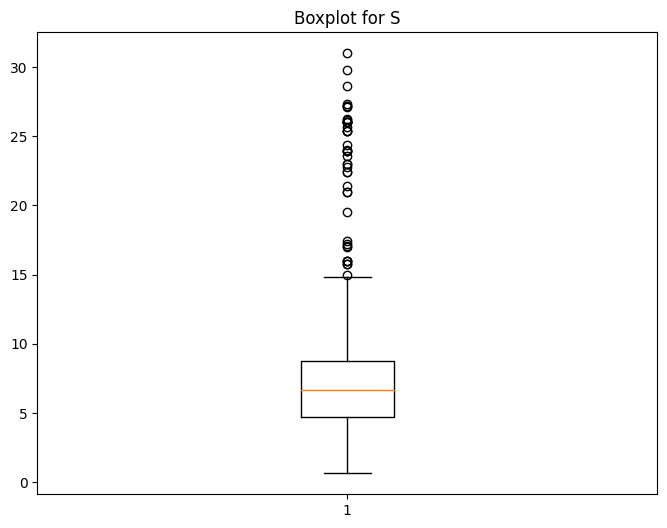

Aberrant values in column Zn are 0.77
Aberrant values in column Zn are 0.83
Aberrant values in column Zn are 0.76
Aberrant values in column Zn are 0.78
Aberrant values in column Zn are 0.79
Aberrant values in column Zn are 0.85
Aberrant values in column Zn are 42.0
Aberrant values in column Zn are 38.0


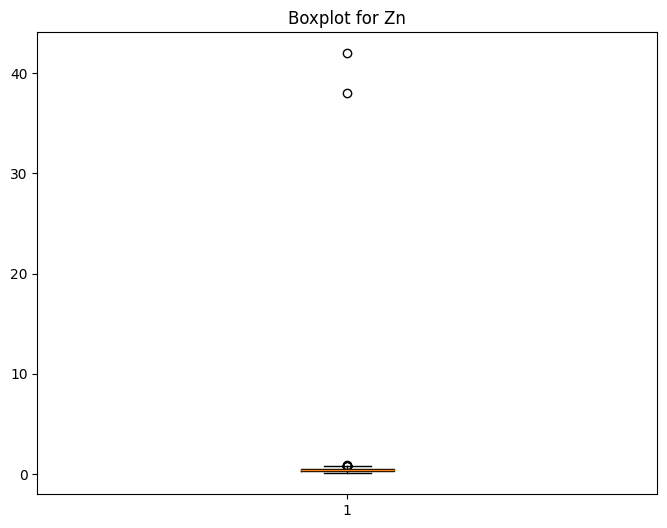

Aberrant values in column Fe are 44.0
Aberrant values in column Fe are 34.0


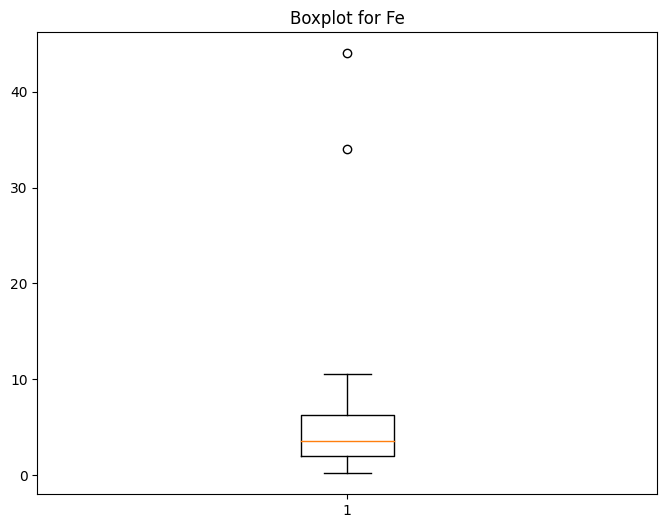

Aberrant values in column Cu are 3.02


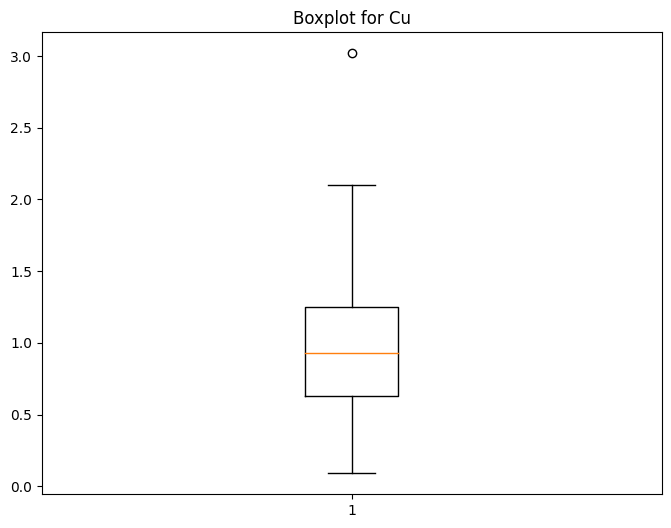

Aberrant values in column Mn are 31.0
Aberrant values in column Mn are 30.48
Aberrant values in column Mn are 21.32
Aberrant values in column Mn are 19.69
Aberrant values in column Mn are 19.69
Aberrant values in column Mn are 19.52
Aberrant values in column Mn are 21.02


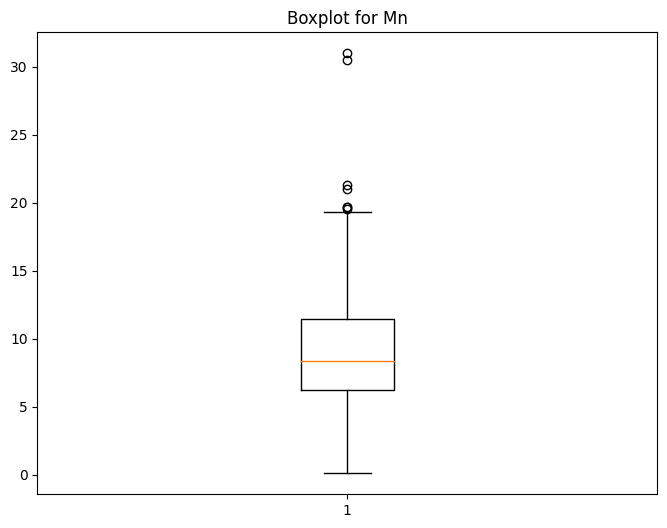

Aberrant values in column B are 2.29
Aberrant values in column B are 2.03
Aberrant values in column B are 1.82
Aberrant values in column B are 2.26
Aberrant values in column B are 1.82
Aberrant values in column B are 1.88
Aberrant values in column B are 1.68
Aberrant values in column B are 1.79
Aberrant values in column B are 2.0
Aberrant values in column B are 2.41
Aberrant values in column B are 2.38
Aberrant values in column B are 2.12
Aberrant values in column B are 2.29
Aberrant values in column B are 2.56
Aberrant values in column B are 2.79
Aberrant values in column B are 1.32
Aberrant values in column B are 2.56
Aberrant values in column B are 1.85
Aberrant values in column B are 2.65
Aberrant values in column B are 1.97
Aberrant values in column B are 2.47
Aberrant values in column B are 1.94
Aberrant values in column B are 1.91
Aberrant values in column B are 2.82
Aberrant values in column B are 1.85
Aberrant values in column B are 2.18
Aberrant values in column B are 2.12
Ab

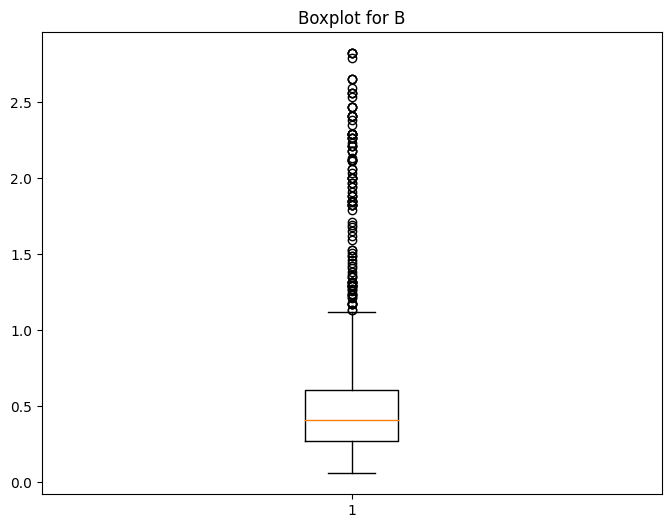

Aberrant values in column OM are 41.28


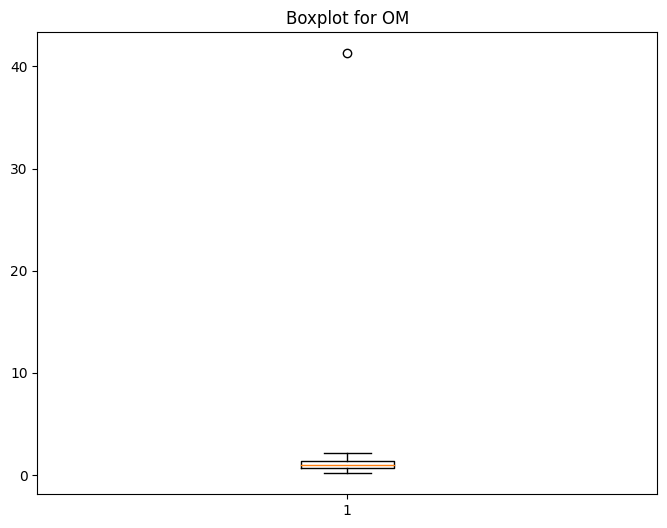

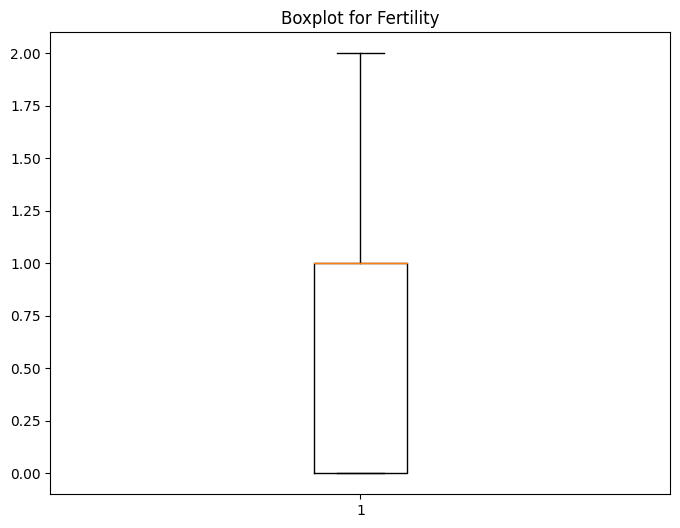

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

def box(dataset, attr):
    # Convert the data to numeric and create the histogram
    data = dataset[attr].apply(pd.to_numeric, errors='coerce').dropna()
    q0, q1, q2, q3, q4 = quartiles(dataset, attr)
    val = 1.5 * (q3 - q1)
    upper = q3 + val
    lower = q1 - val
    for value in data:
        if (value < lower) or (value > upper):
            print("Aberrant values in column", attr, "are", value)

    # Create a boxplot for the attribute
    plt.figure(figsize=(8, 6))
    plt.title(f"Boxplot for {attr}")
    plt.boxplot(data)
    plt.show()  # Show the boxplot for each attribute

for attr in dataset.columns:
    box(dataset, attr)

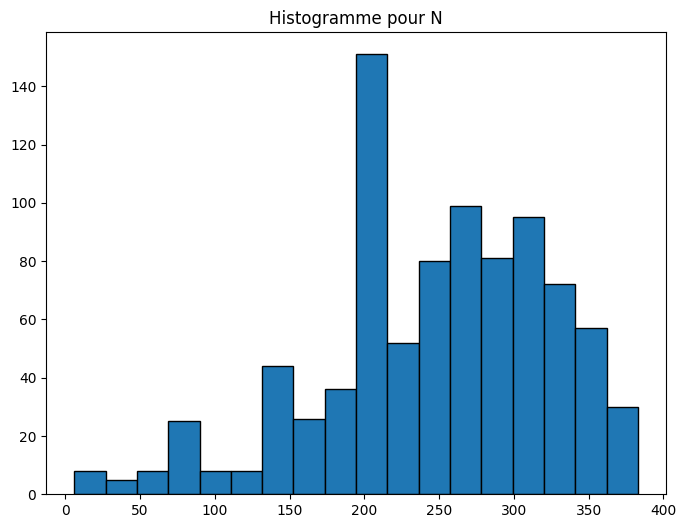

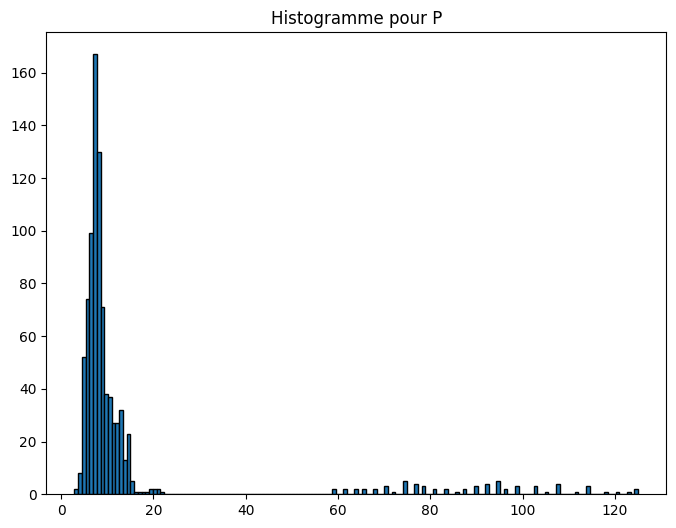

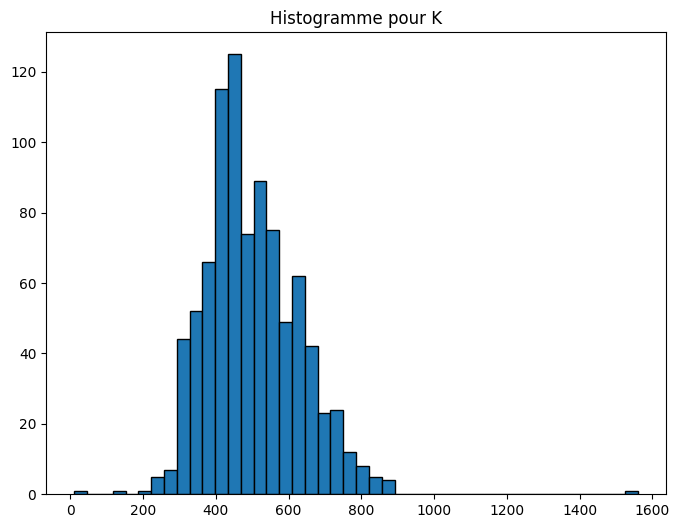

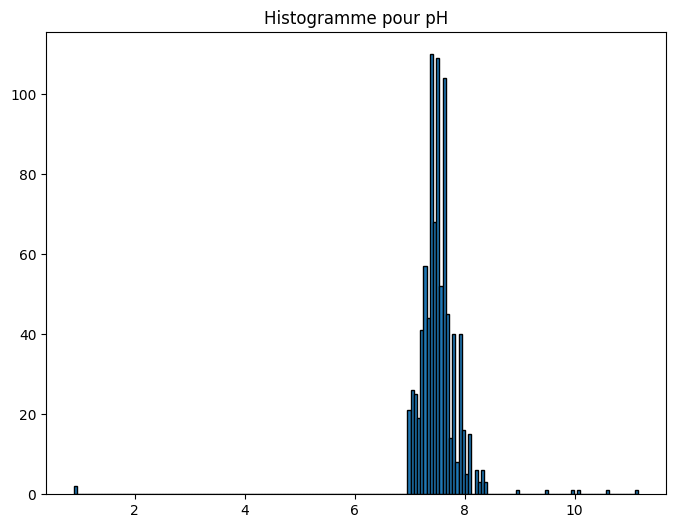

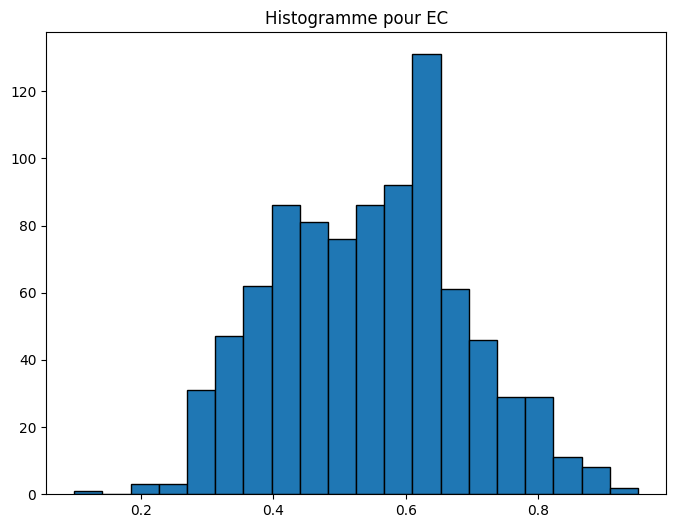

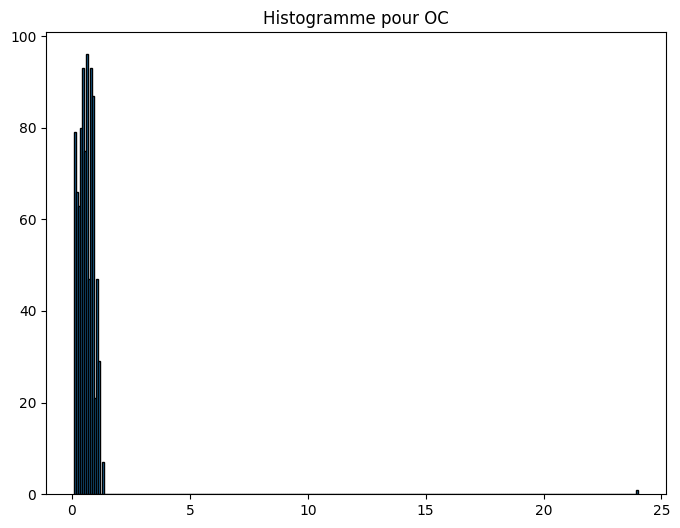

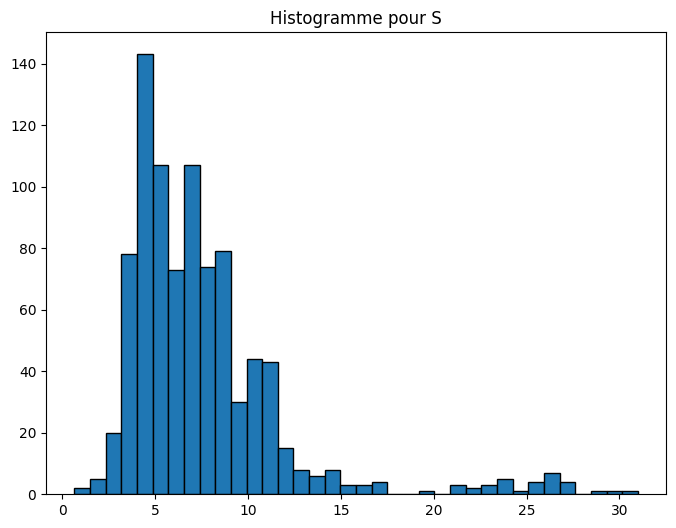

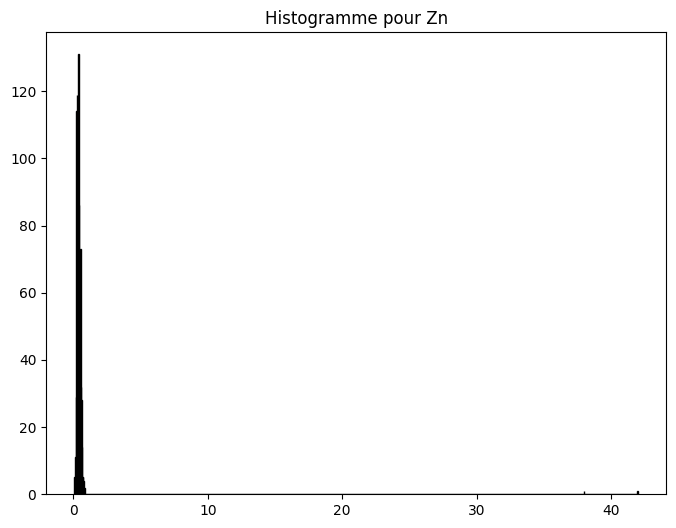

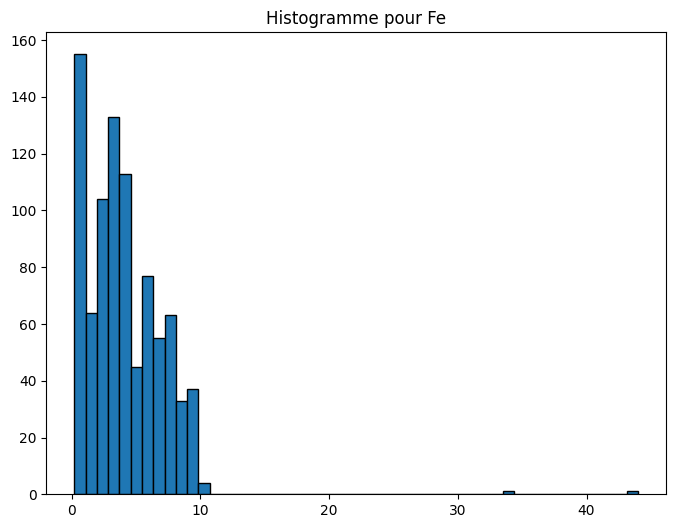

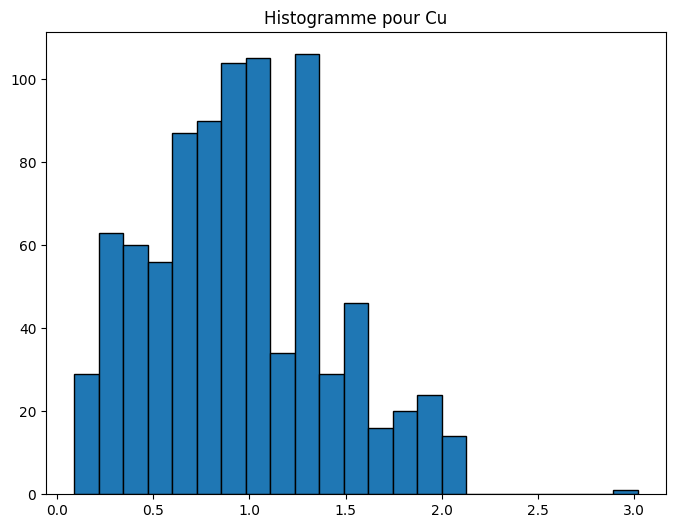

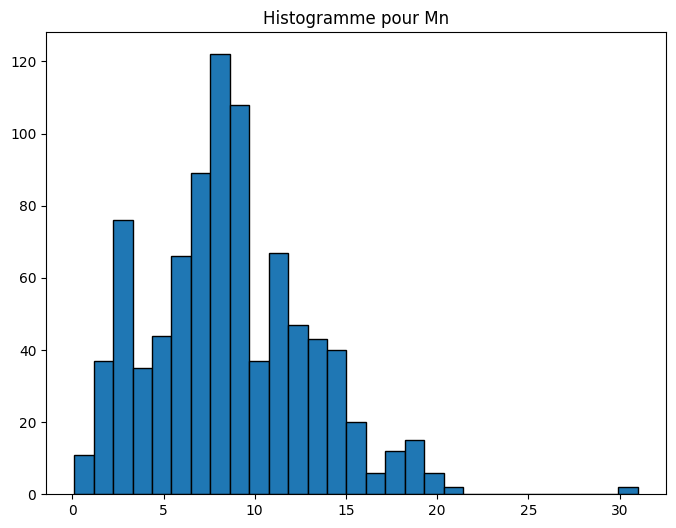

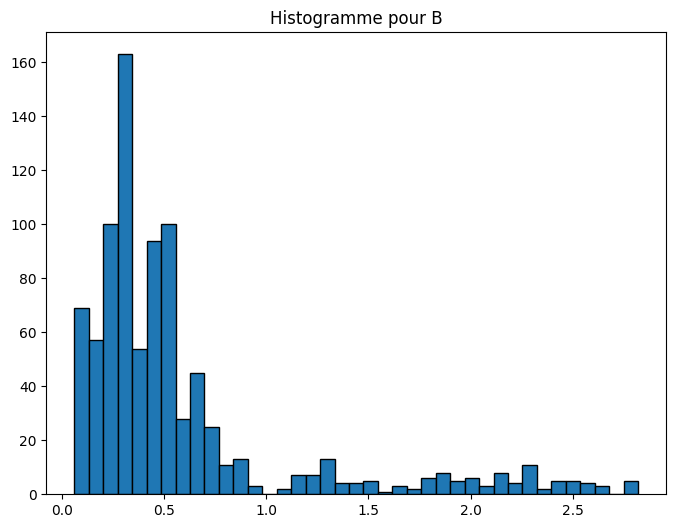

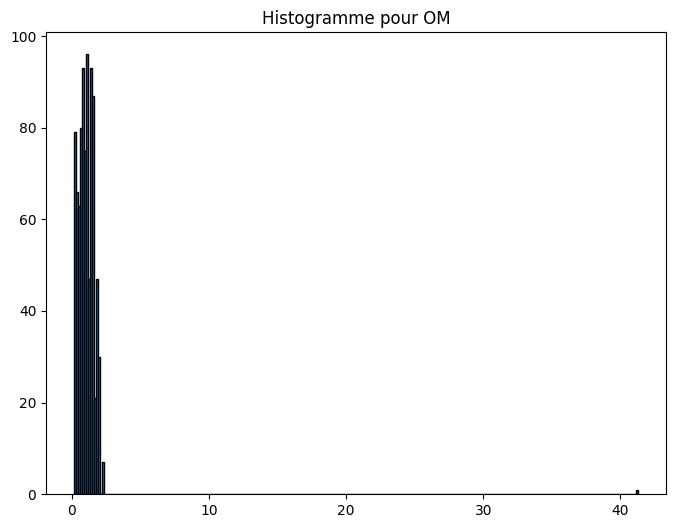

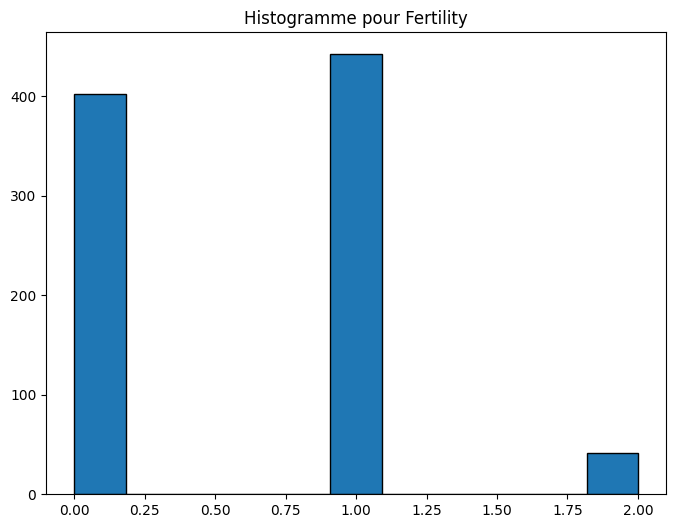

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

def histogramme(dataset, attr):
    # Filtrer les valeurs non numériques
    data = dataset[attr].apply(pd.to_numeric, errors='coerce').dropna()
        # Créer un histogramme pour chaque attr
    plt.figure(figsize=(8, 6))
    plt.title(f"Histogramme pour {attr}")
    plt.hist(data, bins='auto', edgecolor='black')
    plt.show()

# Appelez la fonction avec votre DataFrame
for attr in dataset.columns:
    histogramme(dataset, attr )

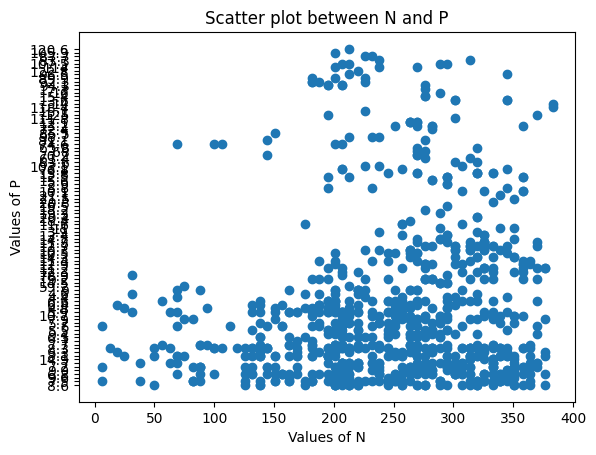

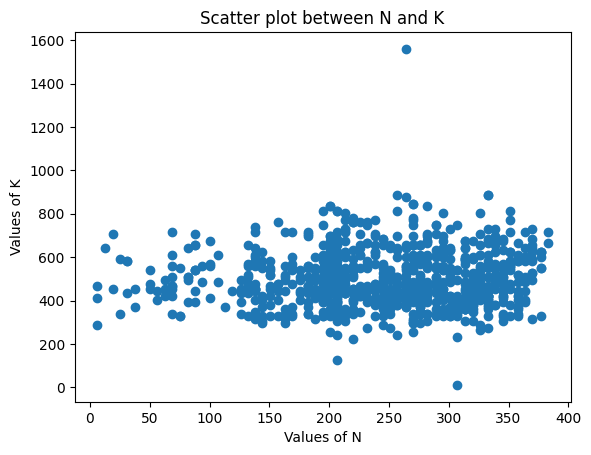

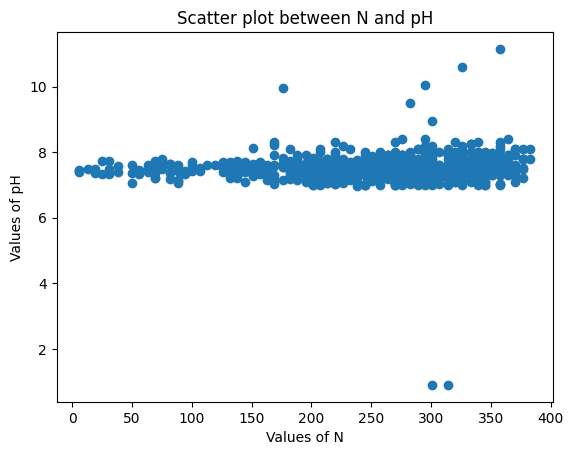

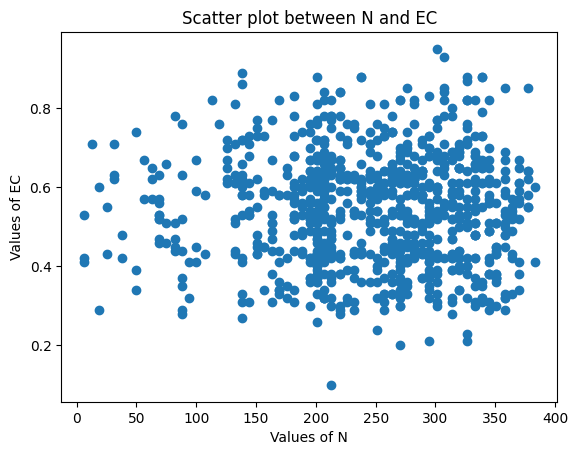

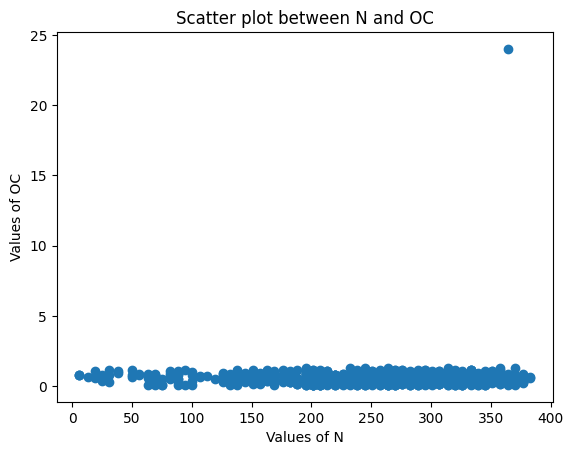

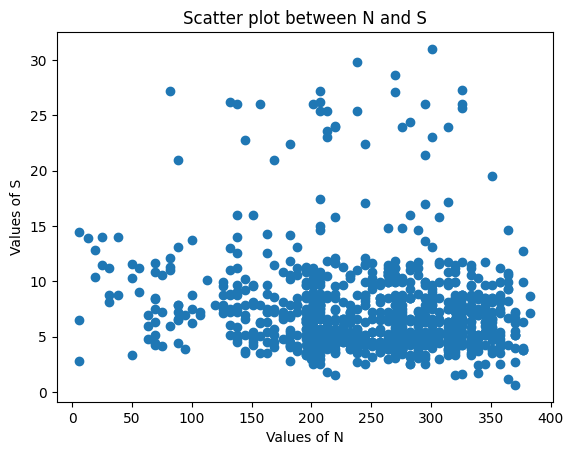

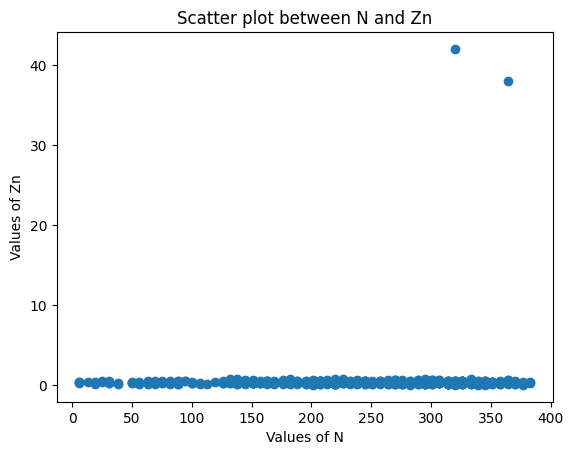

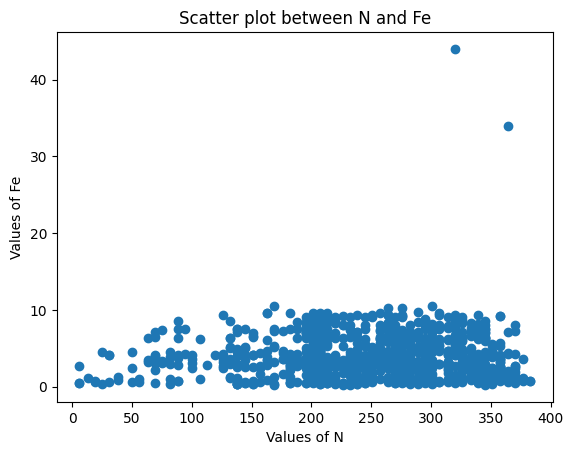

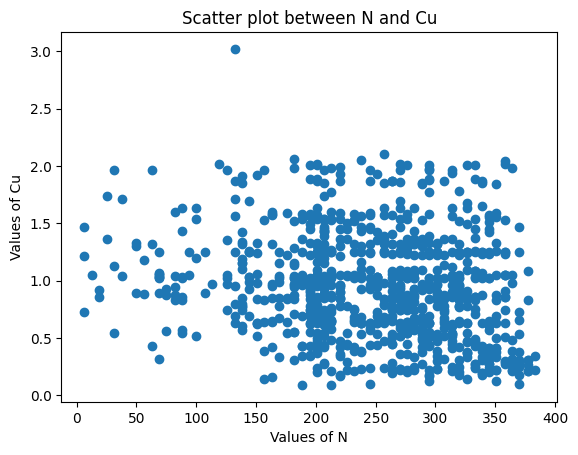

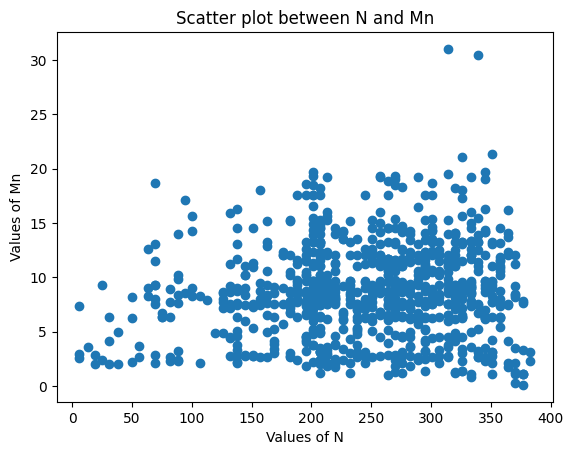

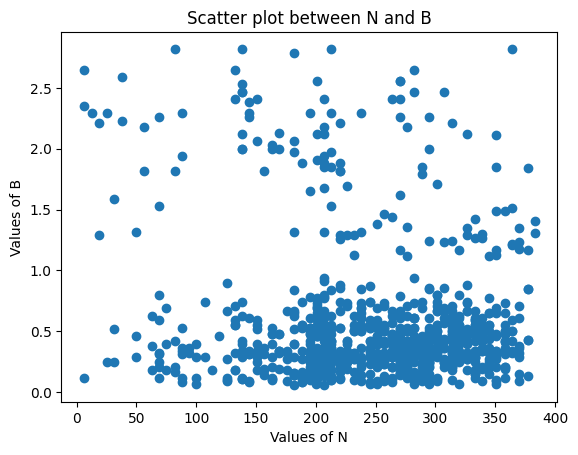

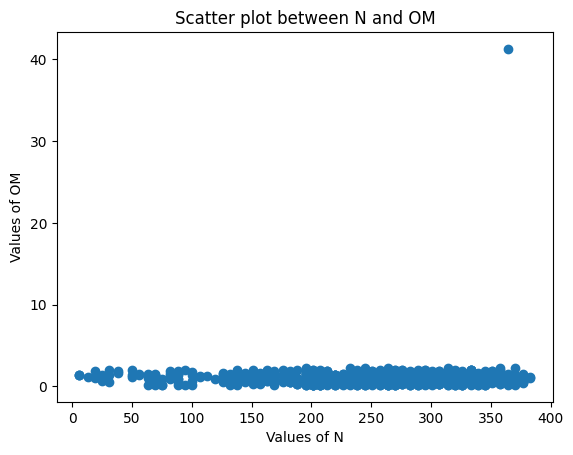

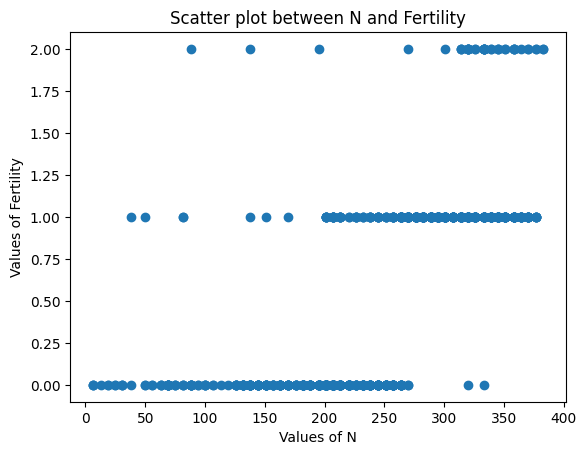

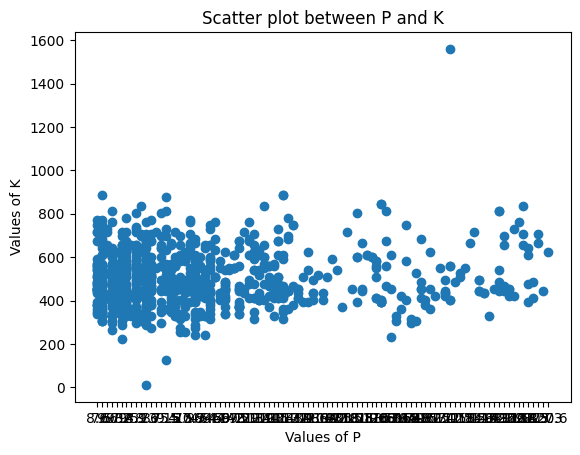

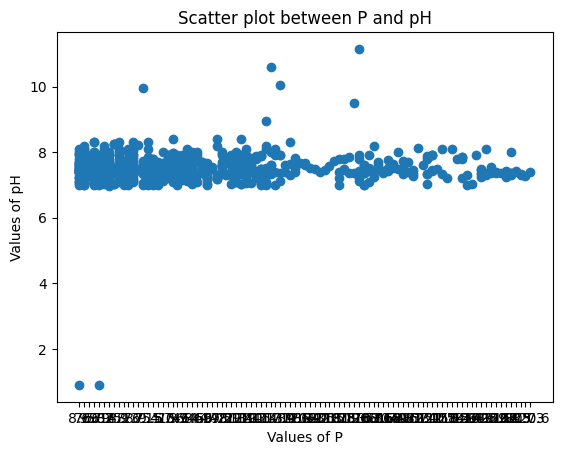

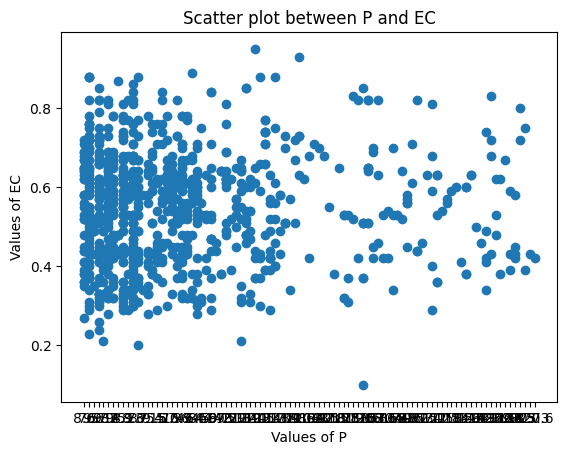

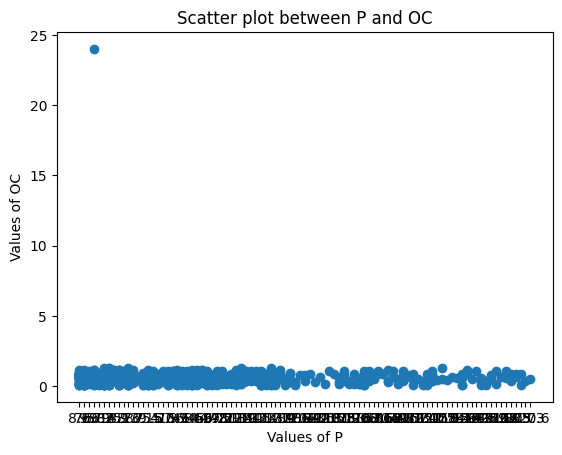

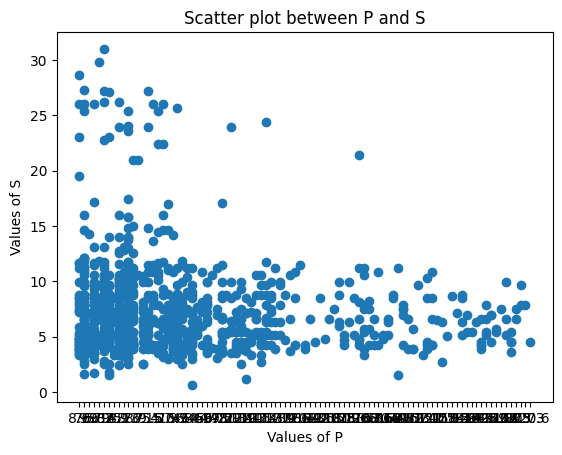

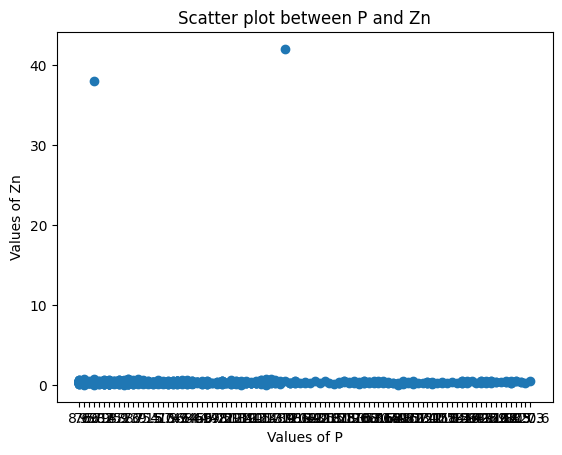

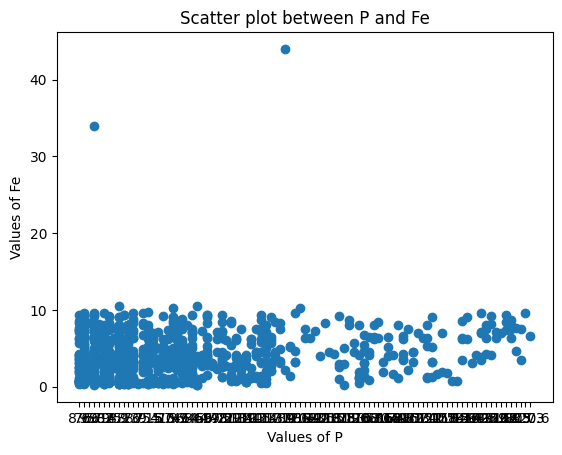

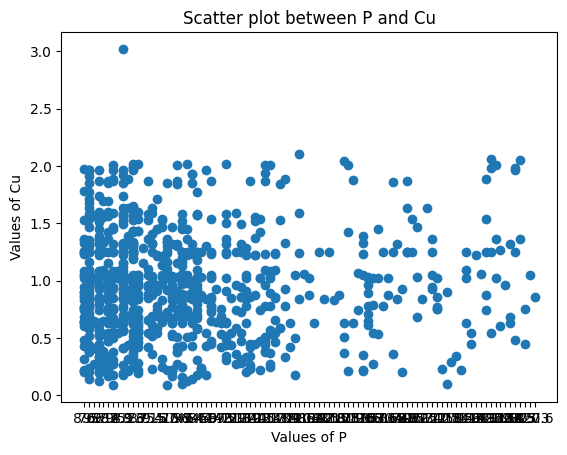

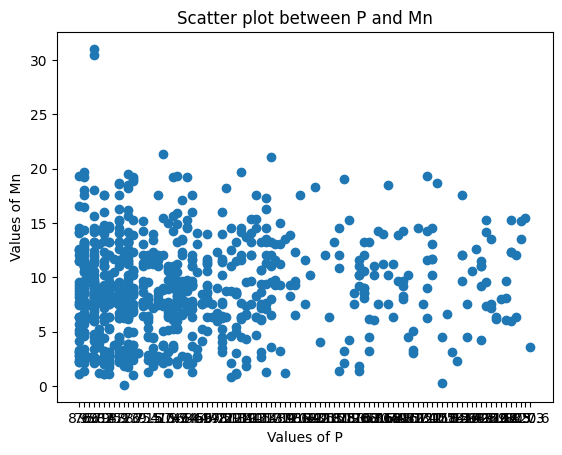

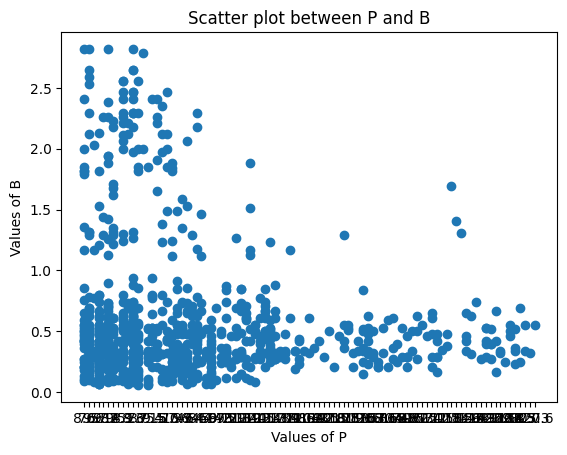

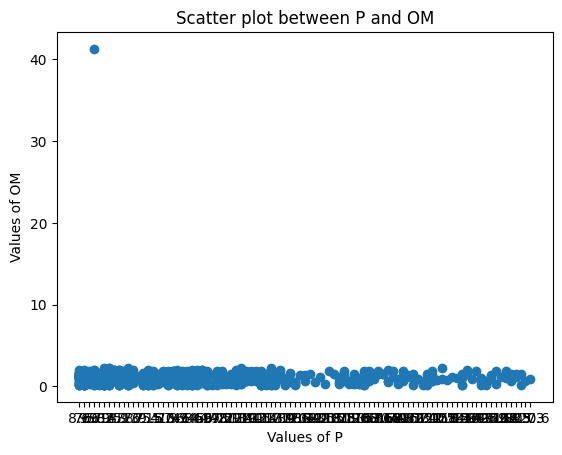

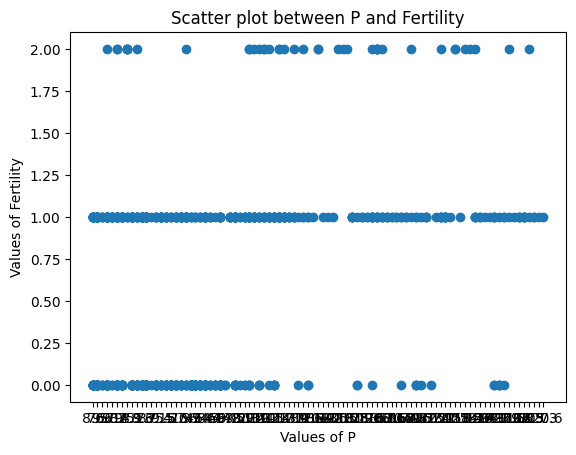

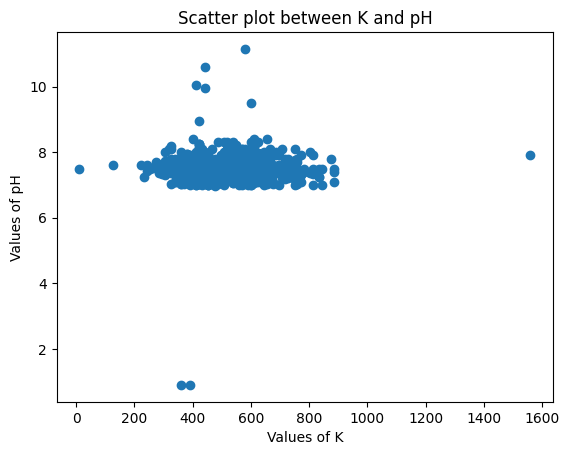

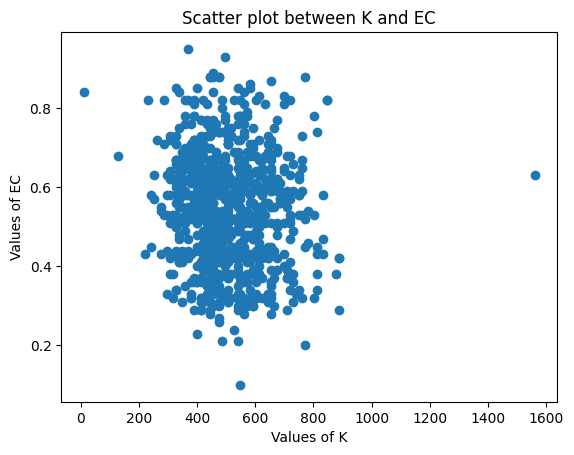

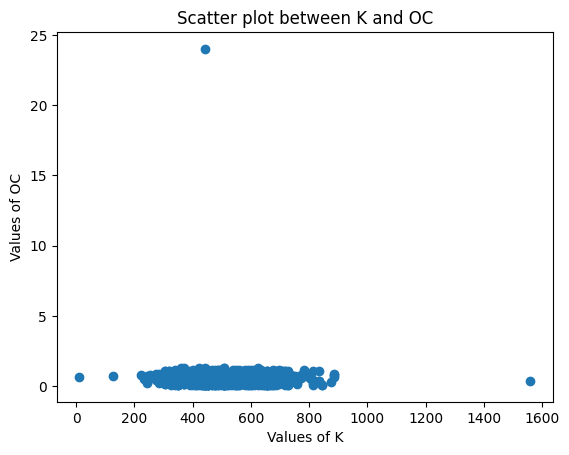

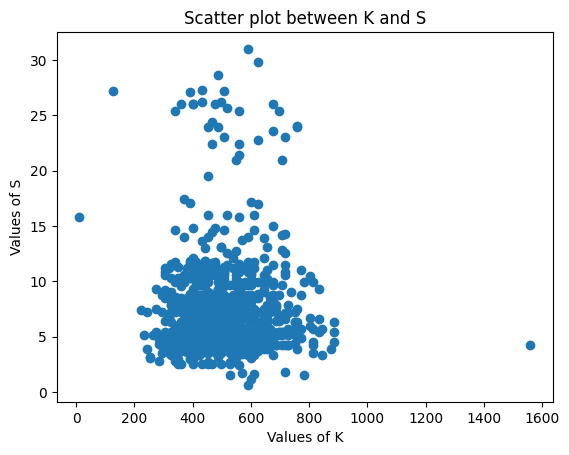

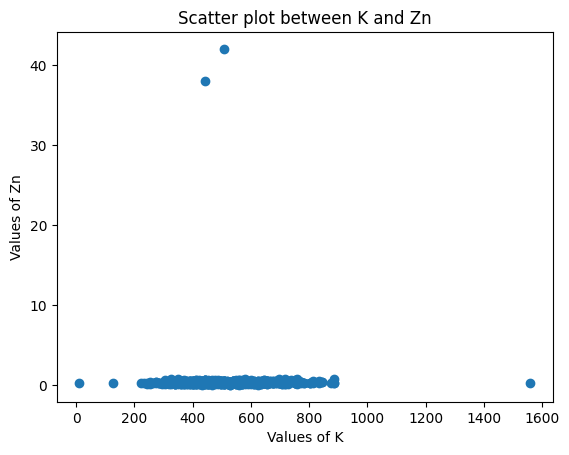

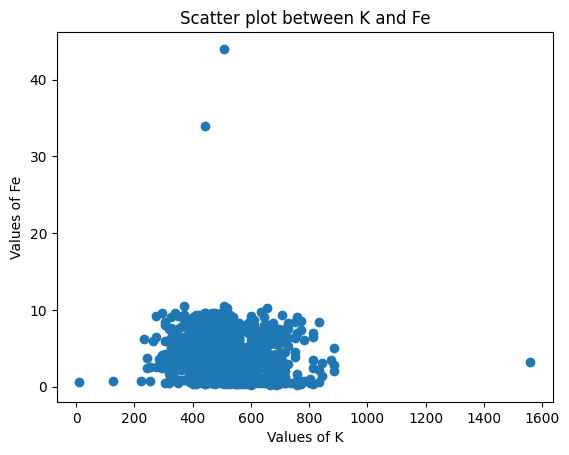

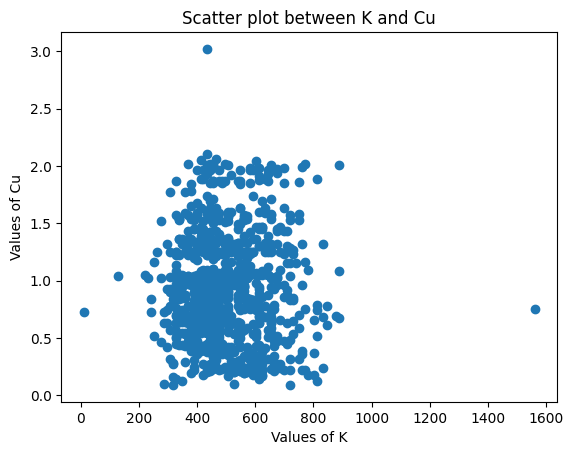

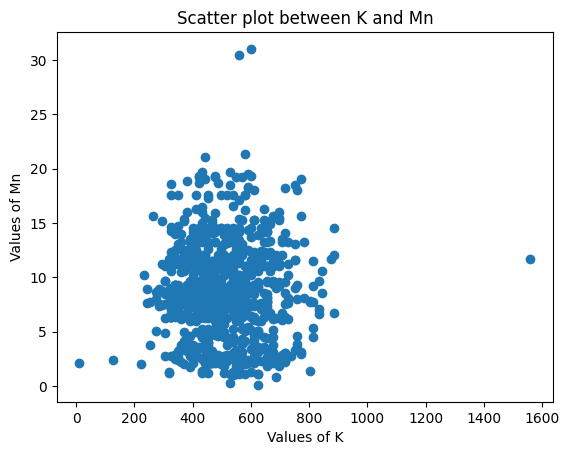

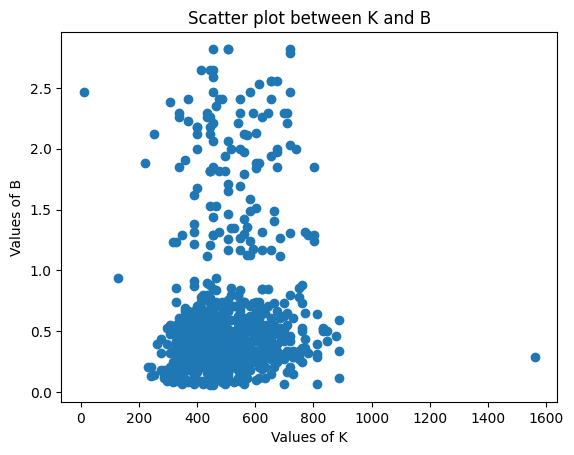

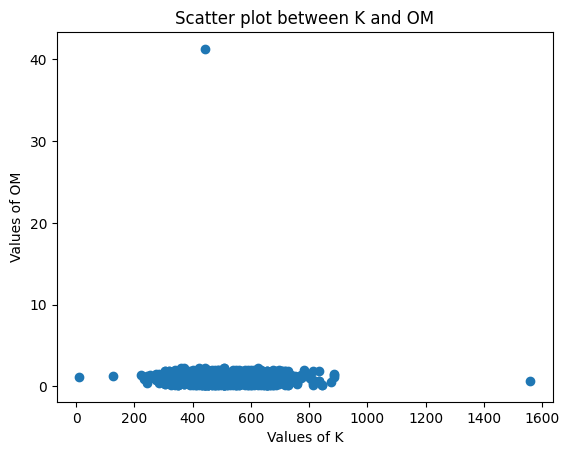

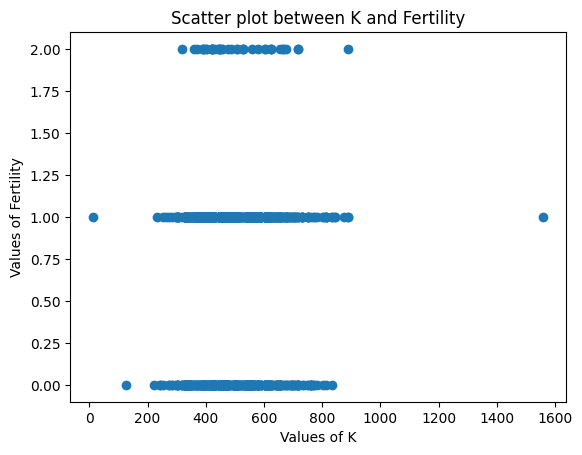

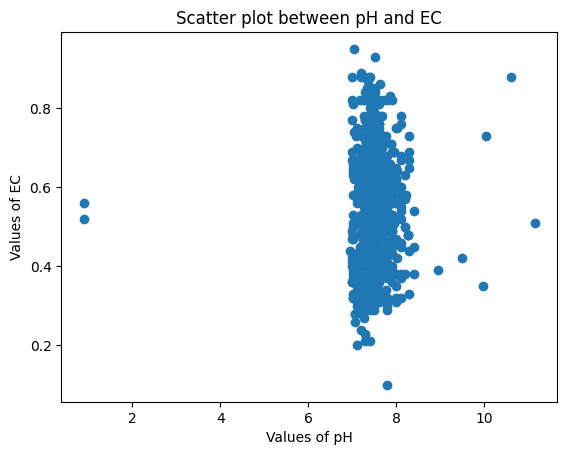

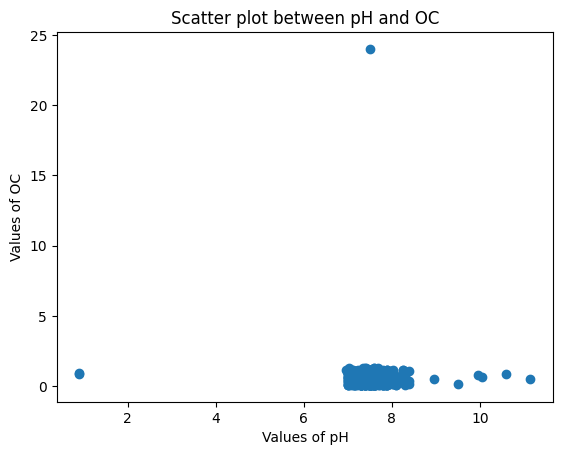

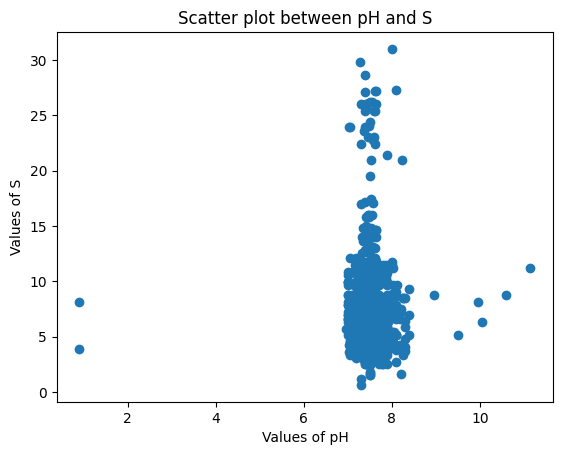

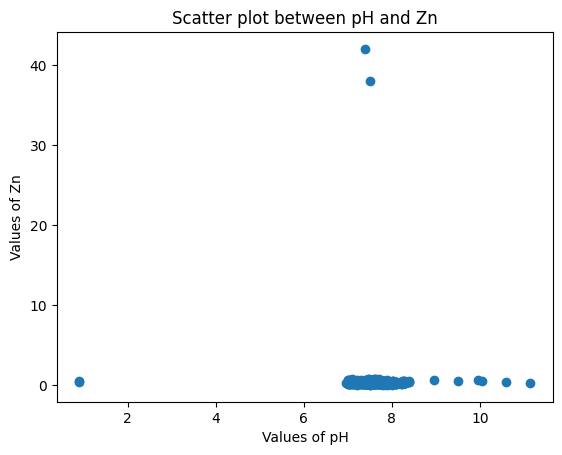

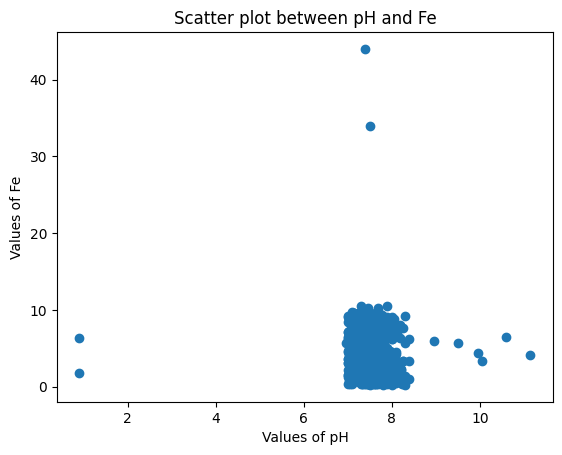

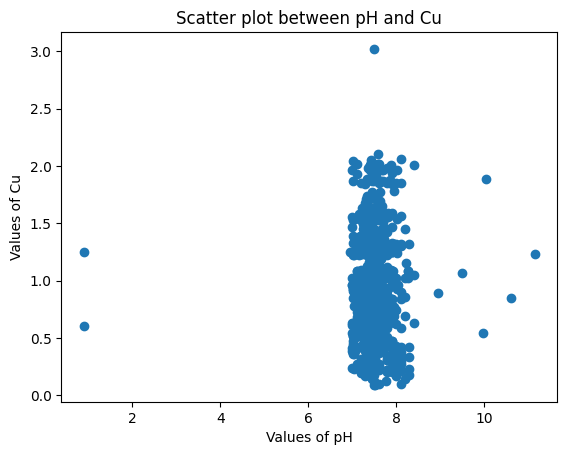

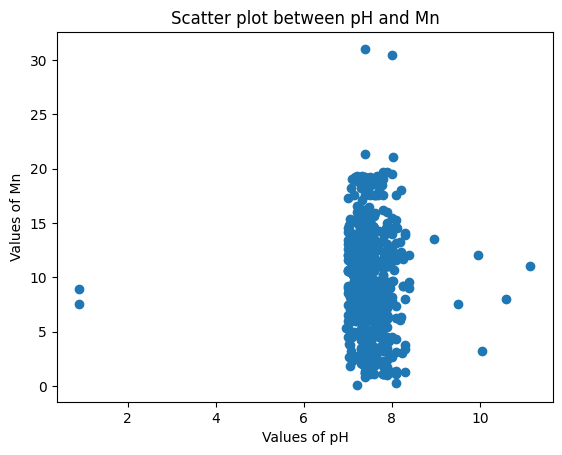

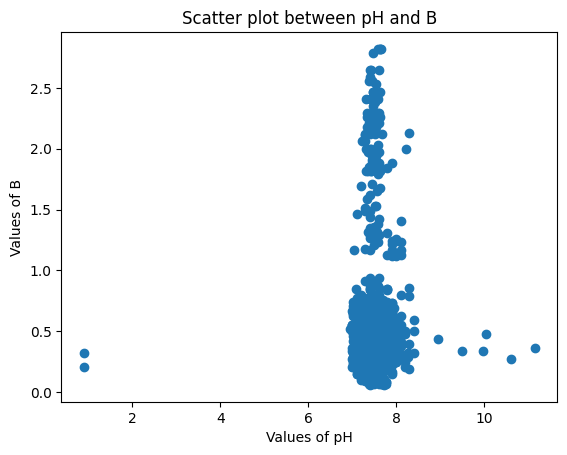

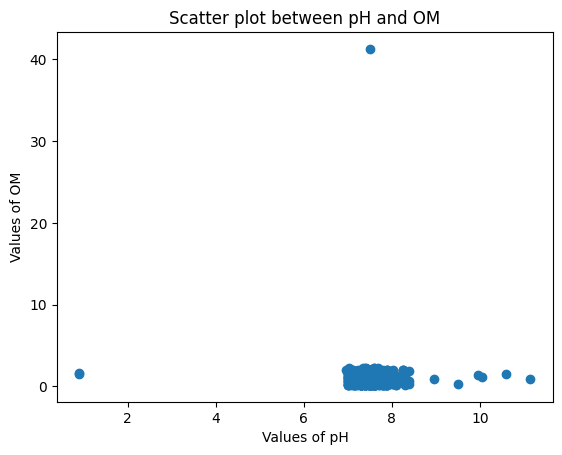

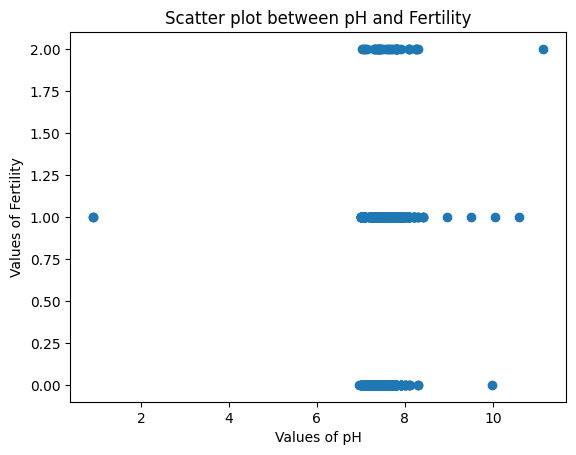

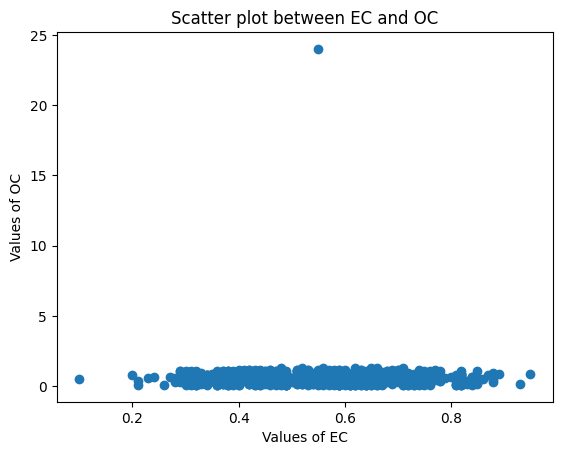

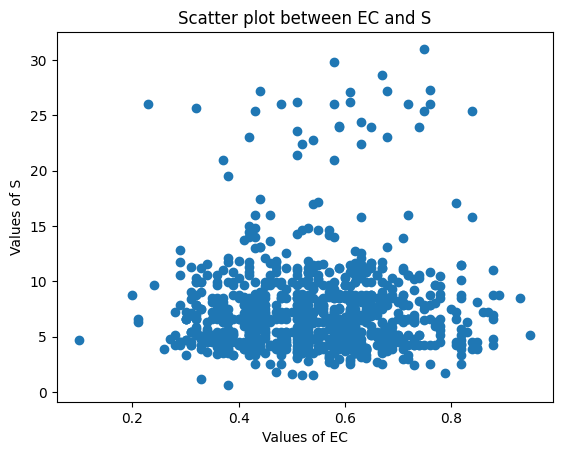

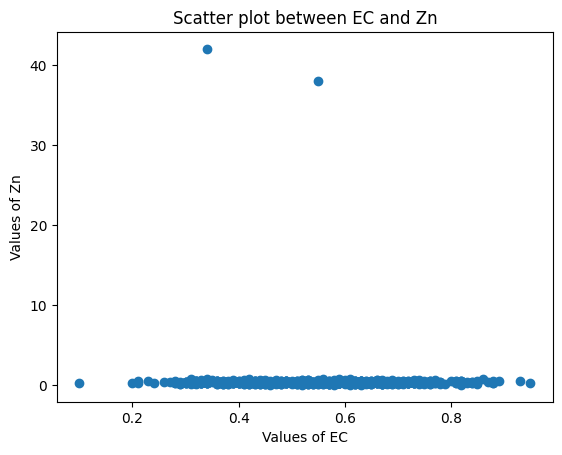

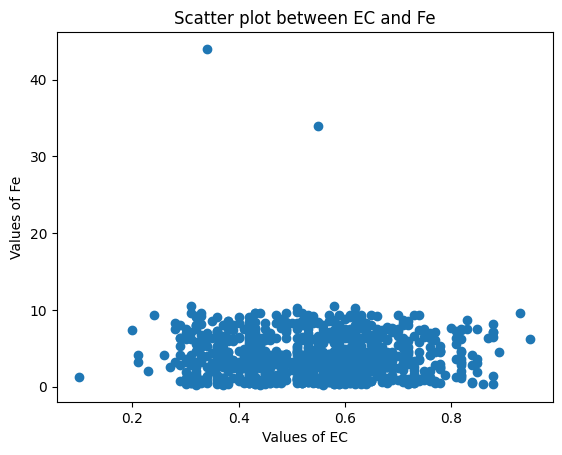

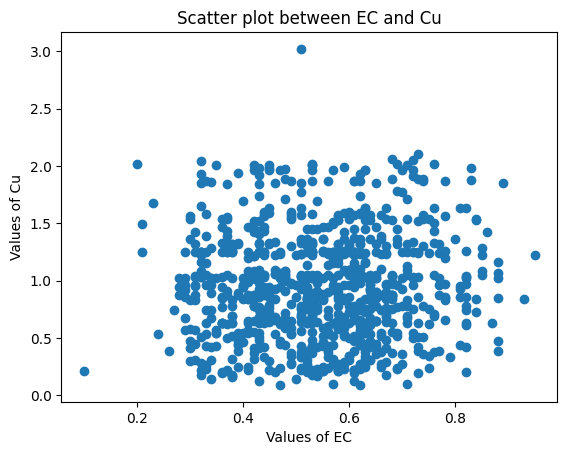

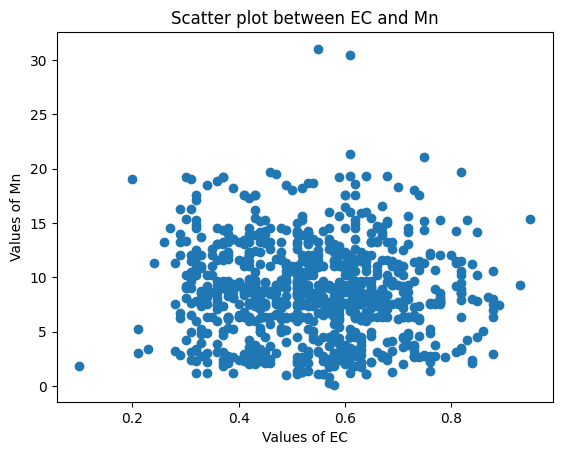

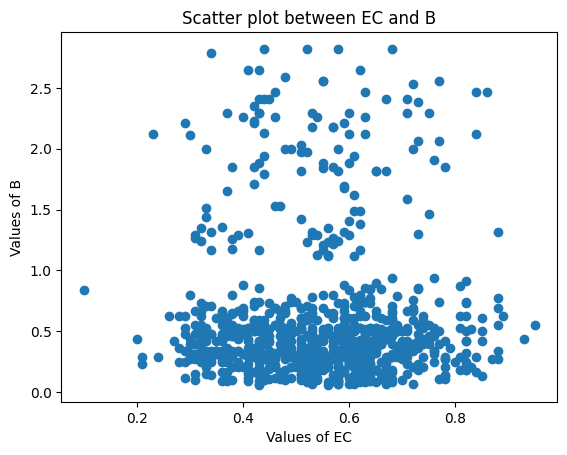

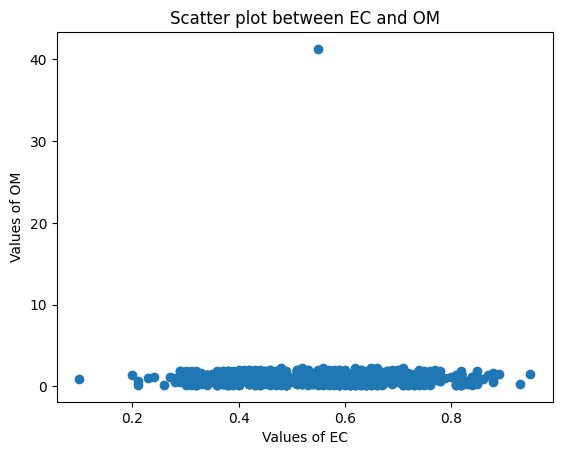

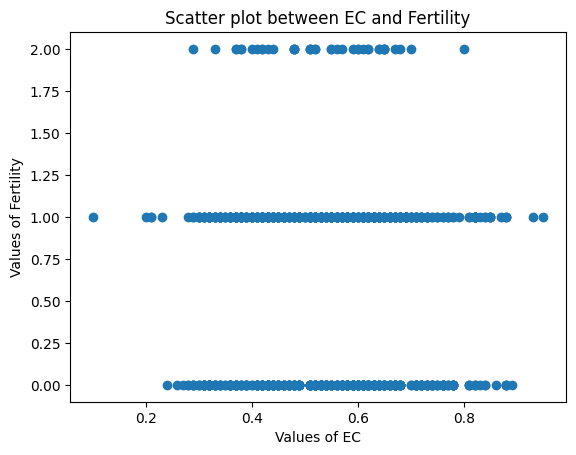

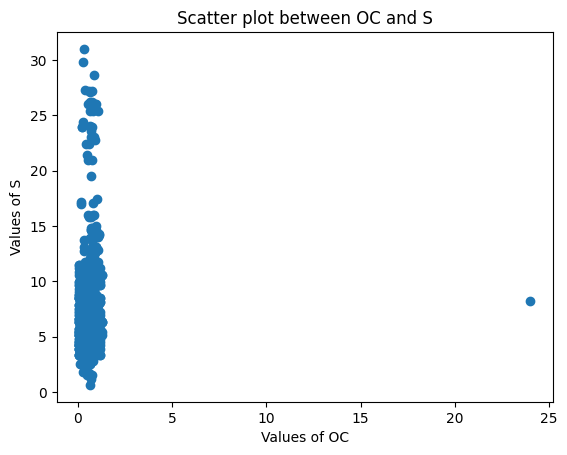

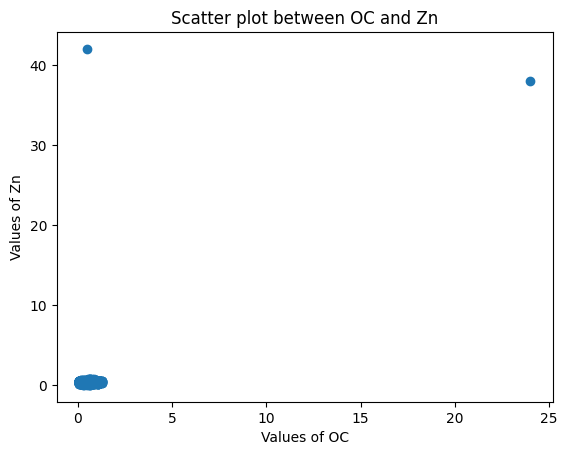

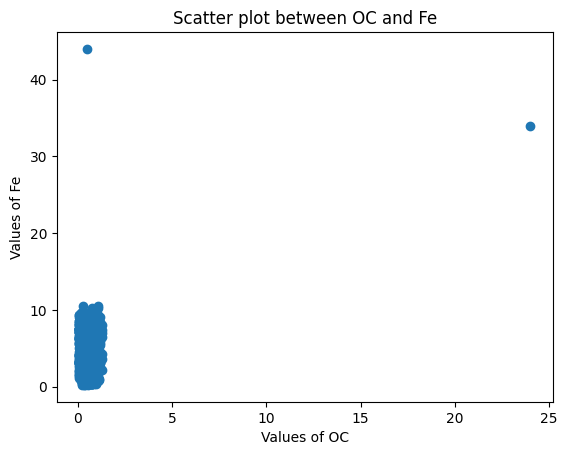

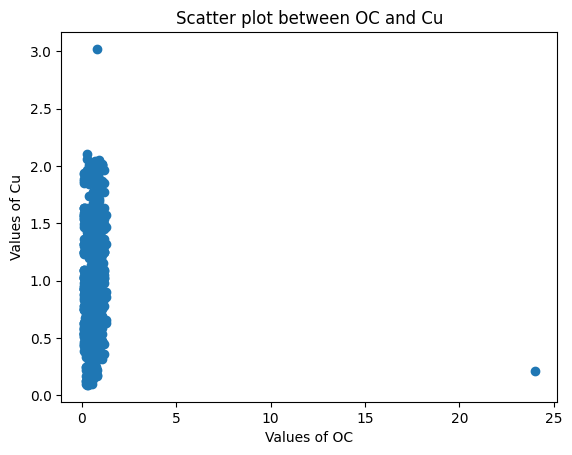

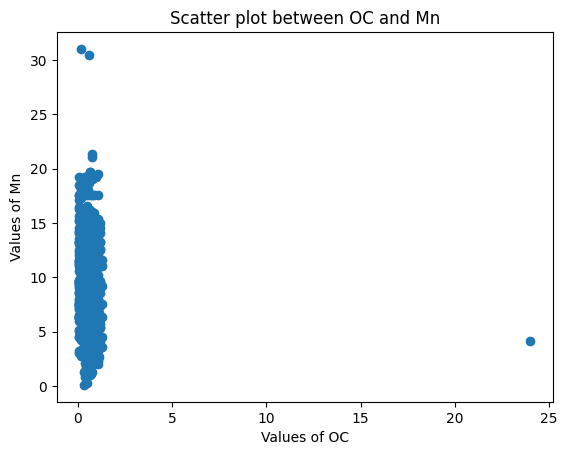

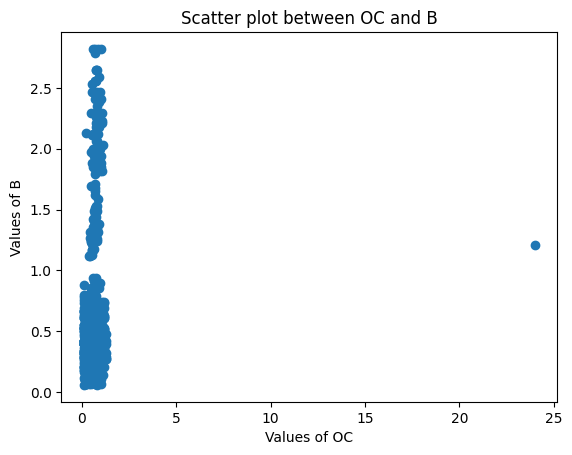

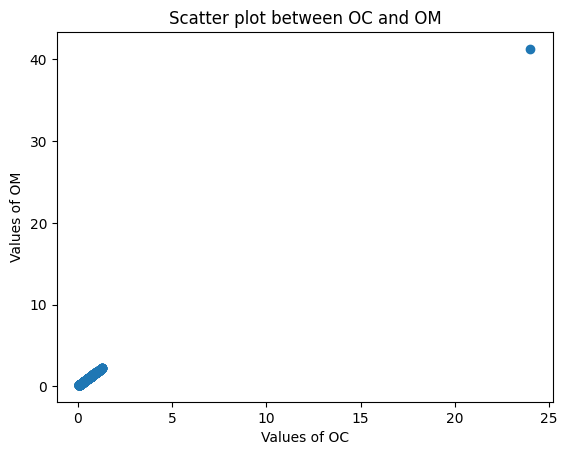

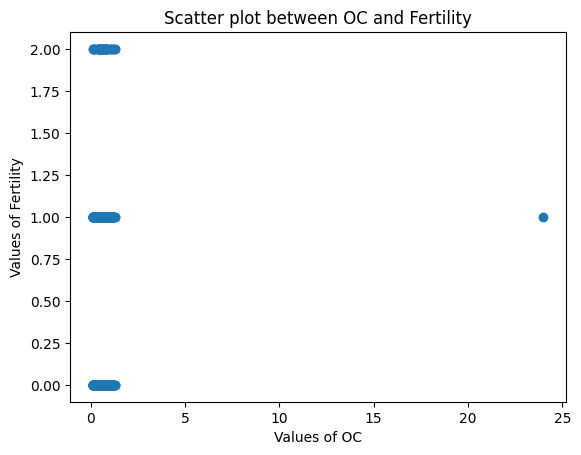

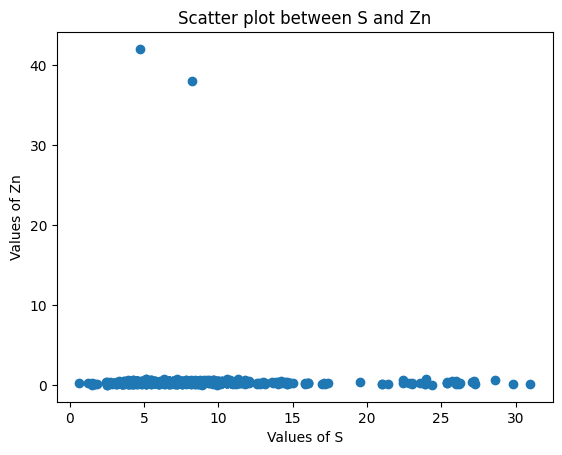

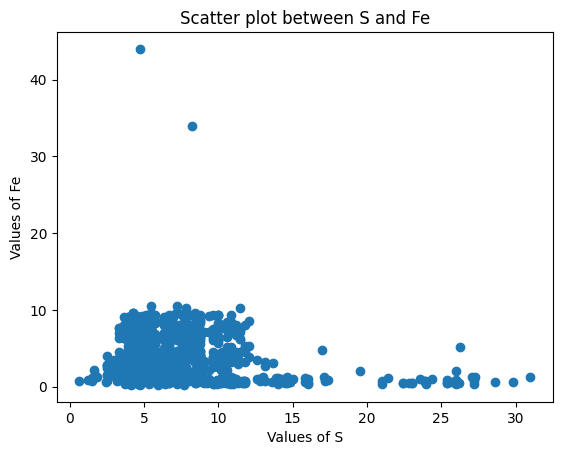

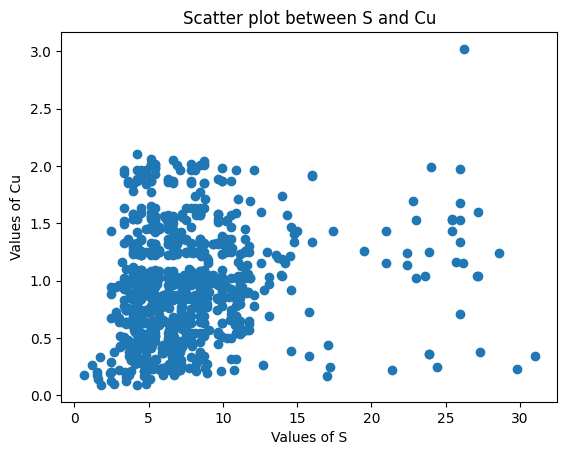

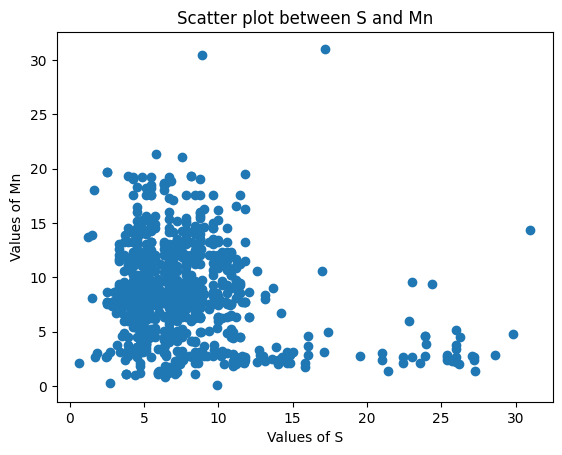

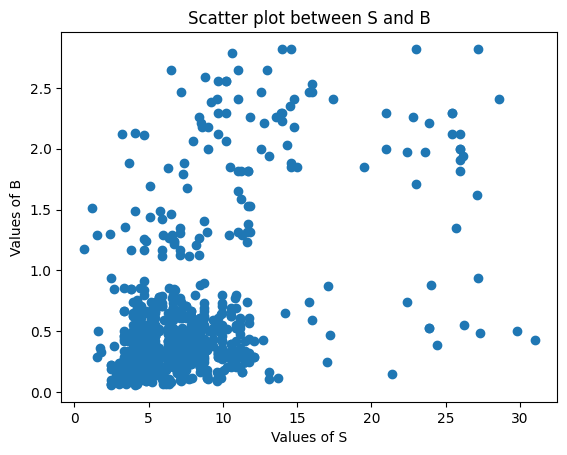

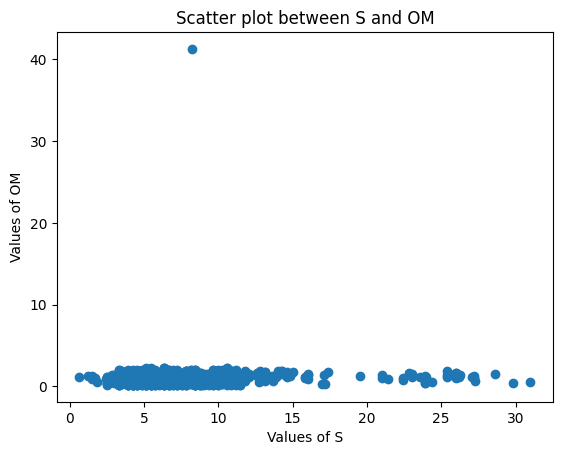

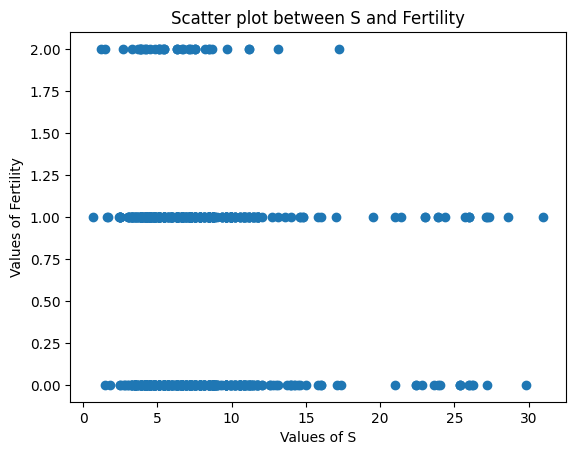

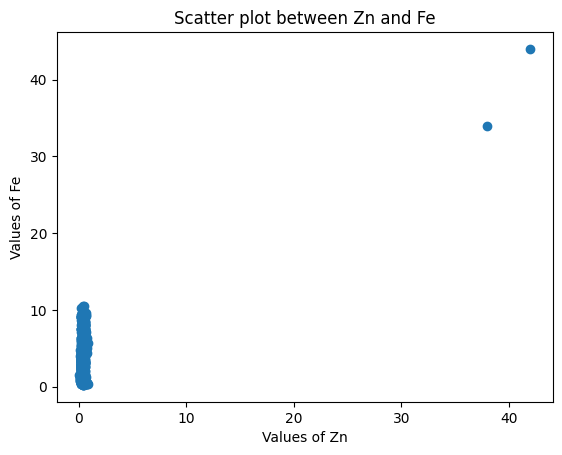

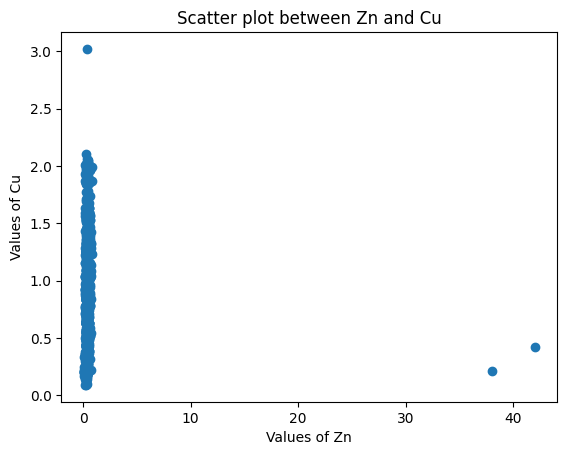

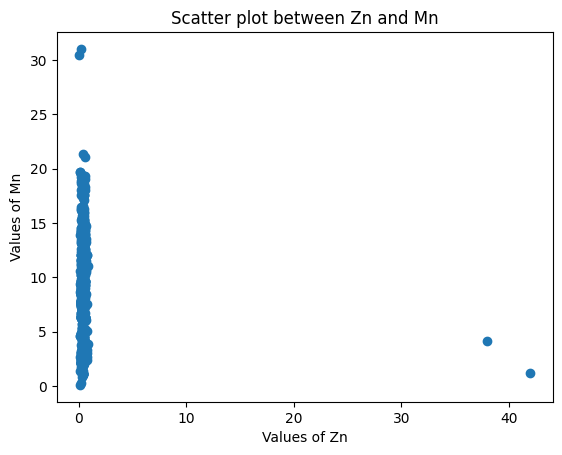

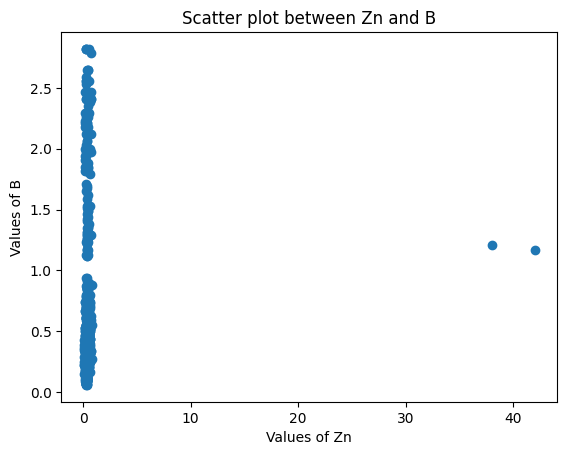

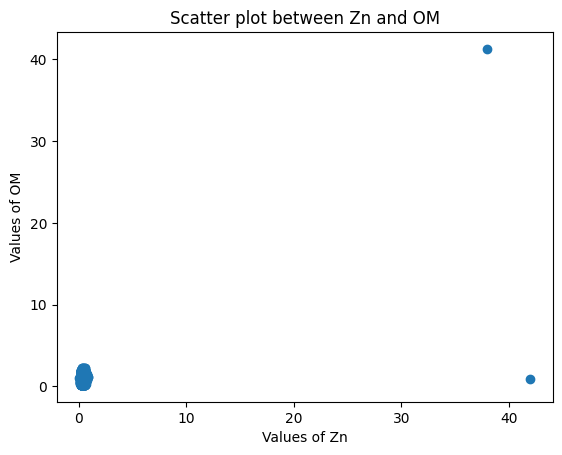

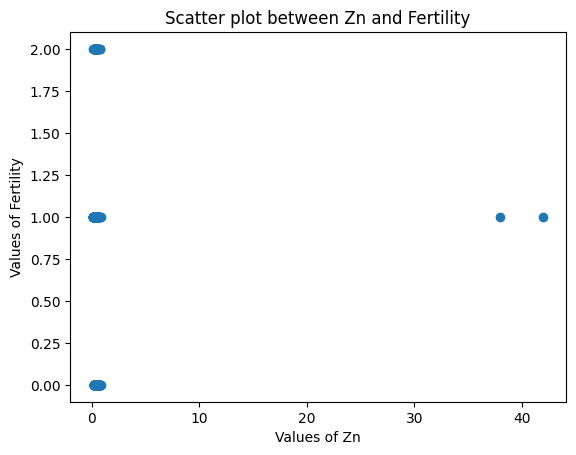

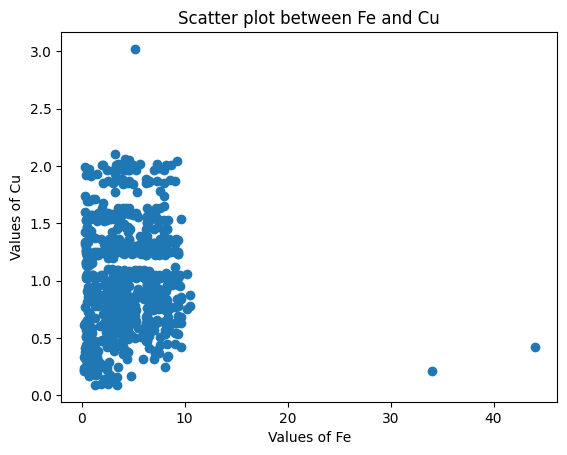

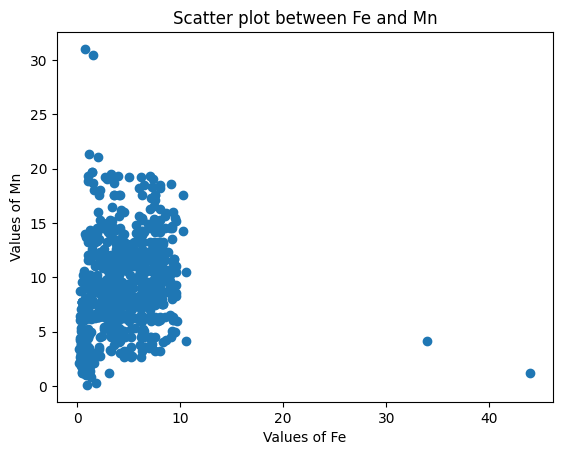

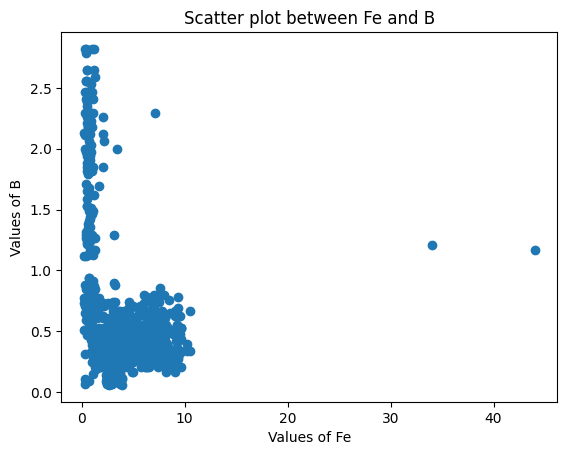

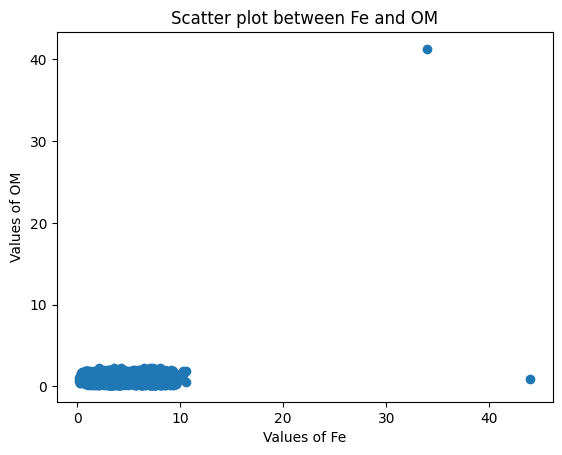

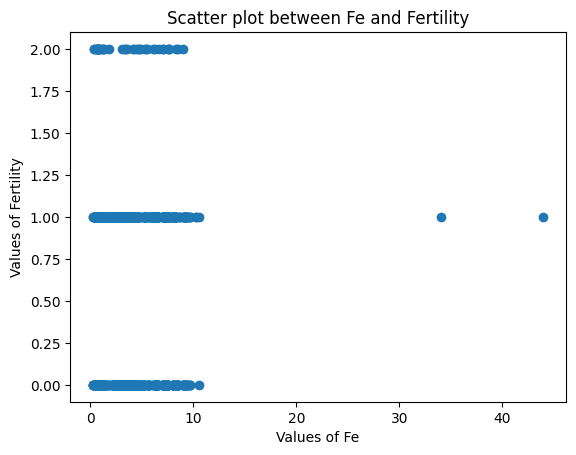

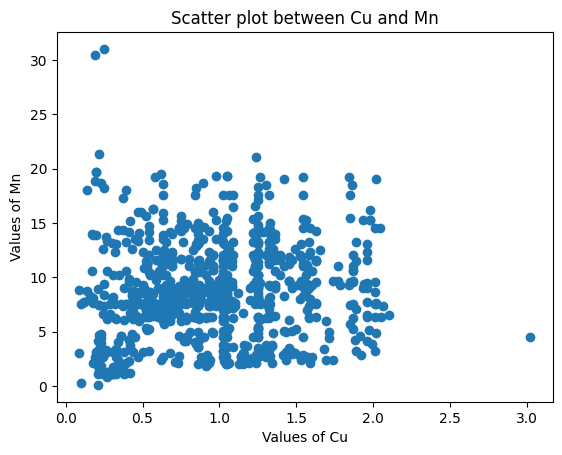

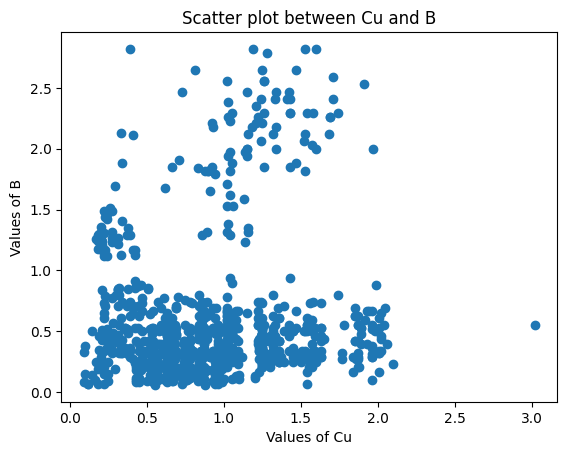

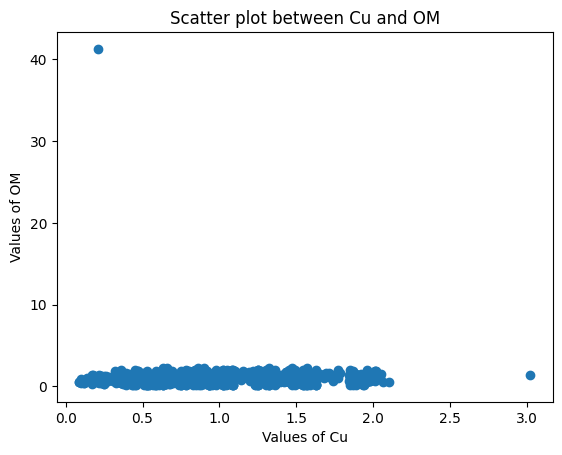

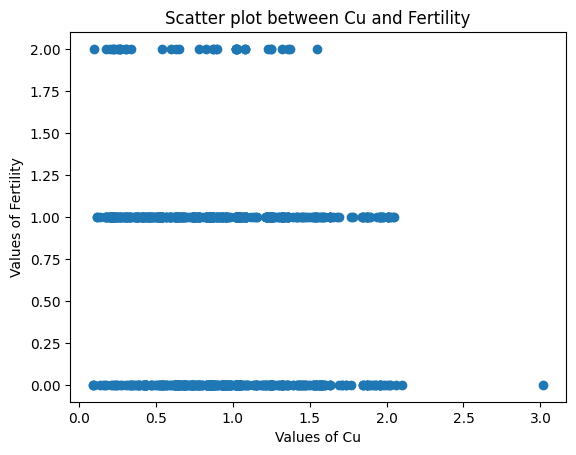

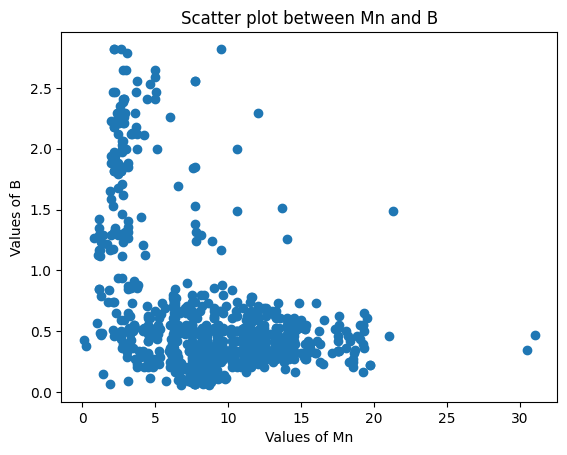

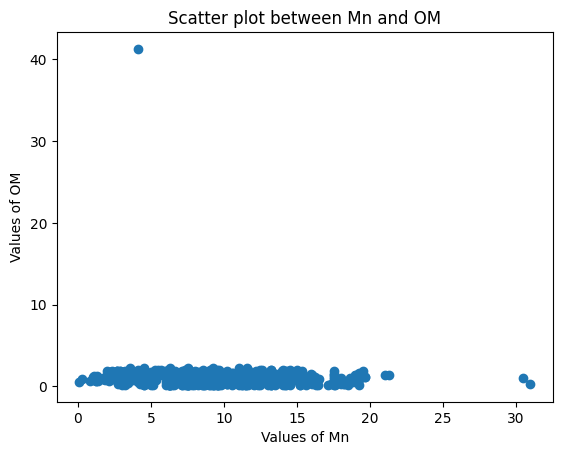

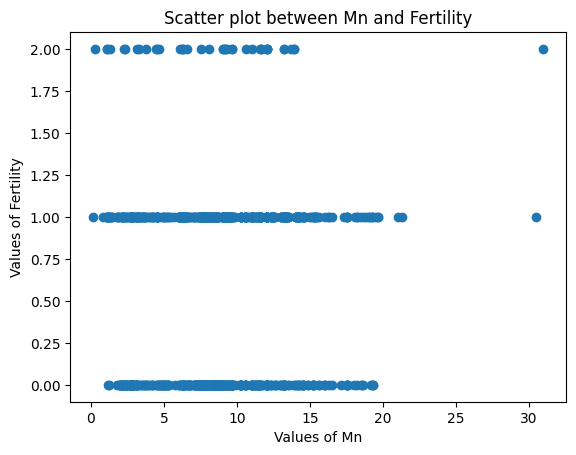

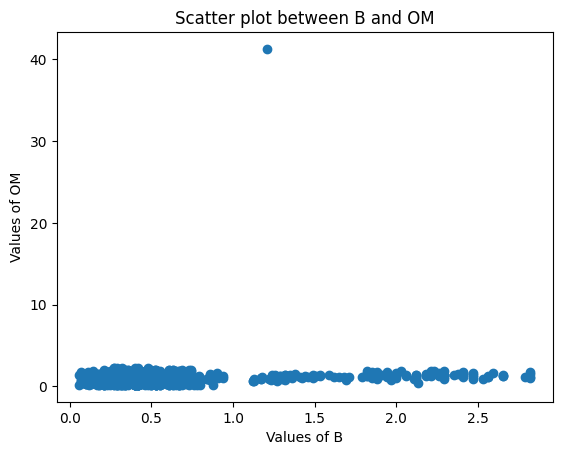

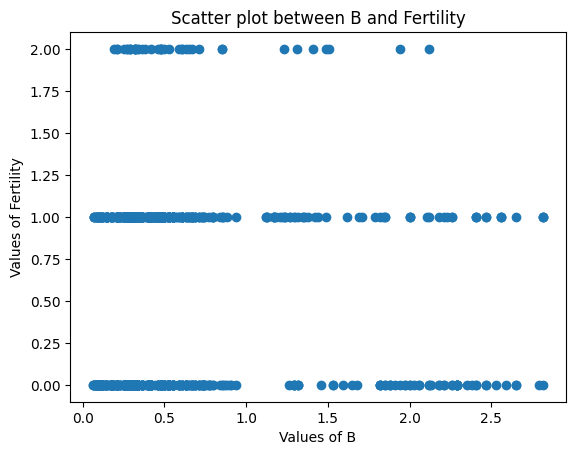

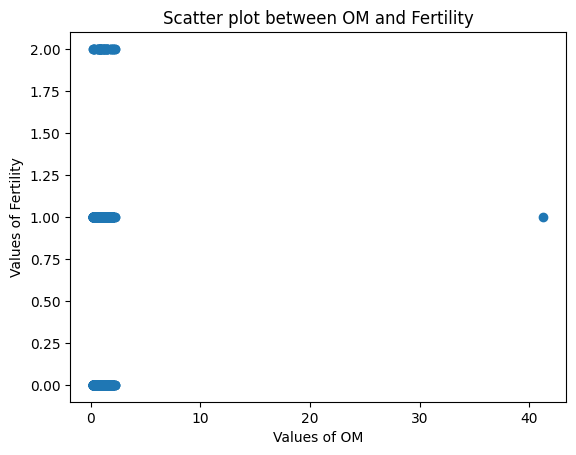

In [255]:
import itertools

def scatterplot(dataset, attr1, attr2):
    x = dataset[attr1]
    y = dataset[attr2]
    plt.scatter(x, y)
    plt.title(f'Scatter plot between {attr1} and {attr2}')
    plt.xlabel(f'Values of {attr1}')
    plt.ylabel(f'Values of {attr2}')
    plt.show()

# Get all combinations of attributes
attribute_combinations = list(itertools.combinations(dataset.columns, 2))

# Create scatter plots for each combination
for attr1, attr2 in attribute_combinations:
    scatterplot(dataset, attr1, attr2)


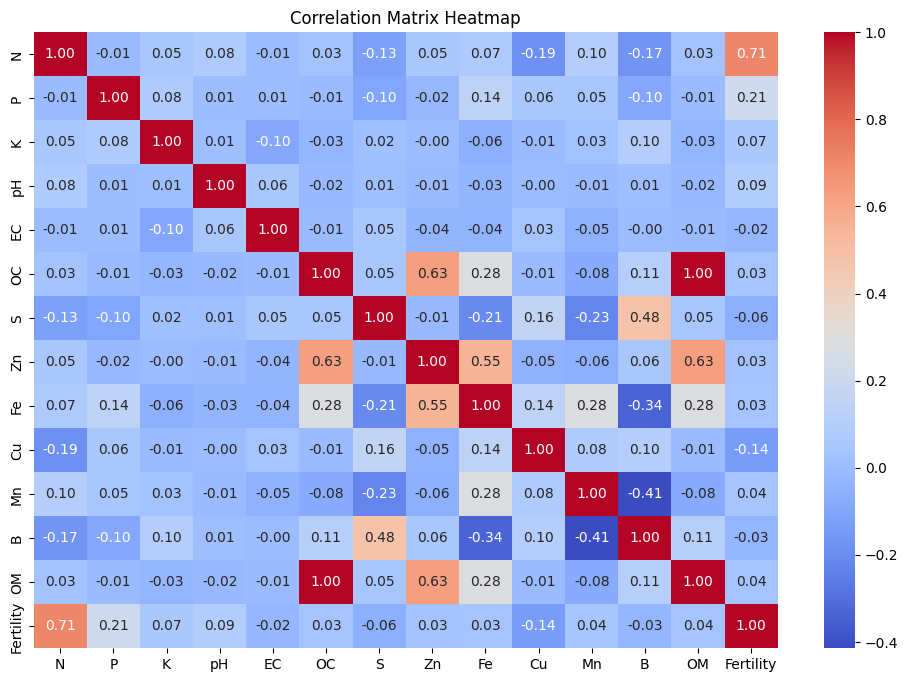

In [256]:
import seaborn as sns
def correlation(dataset):
    # Replace non-numeric values (e.g., '?') with NaN
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')

    # Calculate the correlation matrix for the cleaned dataset
    correlation_matrix = dataset_numeric.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()
correlation(dataset)


## 1.1.3. Prétraitement

In [257]:
def load(f):
    dataset = pd.read_csv(f)
    return dataset
dataset = load("Dataset1.csv")
print(dataset)

       N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1

In [258]:
import pandas as pd
import numpy as np
import re


def replace_missing(dataset, attr):
    integer_pattern = re.compile(r'^[+-]?\d+$')
    decimal_pattern = re.compile(r'^[+-]?\d*\.\d+$')

    # Replace values that don't match integer_pattern or decimal_pattern with NaN
    dataset[attr] = dataset[attr].apply(lambda x: x if pd.isna(x) or integer_pattern.match(str(x)) or decimal_pattern.match(str(x)) else np.nan)

    # Convert the attribute to numeric (assuming it's a numerical column)
    # Replace NaN with the mean of instances belonging to the same class
    for class_value in [0, 1, 2]:
        mask = dataset['Fertility'] == class_value
        mean_value = dataset.loc[mask, attr].astype(float).mean()
        dataset.loc[mask, attr] = dataset.loc[mask, attr].astype(float).fillna(mean_value)

    # Verify the changes
    return dataset

# Use the original dataset to verify changes
for attr in dataset.columns:
    dataset = replace_missing(dataset.copy(), attr)  # Use copy to avoid modifying the original dataset
print(dataset)

for attr in dataset.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants(dataset, attr)



       N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1

In [259]:
dataset3 = dataset.copy() # to use in outliers treatment by winsorizing

In [260]:
def define_k(dataset):
    n = len(dataset)
    k = 1 +(10/3) * math.log10(n)
    return int(math.ceil(k))-1

In [261]:
def categorize(dataset, k):
    categories = []
    dataset_length = len(dataset)
    
    for i in range(k):
        # max_val_index = int(dataset_length * (i + 1) / k)
        
        min_val_index = int(dataset_length * i / k)
        # print('min ', min_val_index)
        max_val_index = int(dataset_length * (i + 1) / k)
        # print('max ', max_val_index)
        interval = dataset[min_val_index:max_val_index]
        
        categories.append(interval)

    return categories


In [262]:
def discretise(dataset, attr):
    
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # define the number of ranges K
    k = define_k(x)
    # print(k)
    # categorize
    categories = categorize(x, k) 
    # print('categories')
    # print(categories)
    # print('--------------------------------------------')
    
    # calculate the average for each category and replace values with the average
    for i, category in enumerate(categories):
        avg = category.mean()
        categories[i] = pd.Series([avg] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset
    
    

In [263]:
dataset2 = dataset.copy()
for attr in dataset.columns:
    if attr != 'Fertility':
        print('COLUMN:', attr)
        dataset2 = discretise(dataset2.copy(), attr)

COLUMN: N
COLUMN: P
COLUMN: K
COLUMN: pH
COLUMN: EC
COLUMN: OC
COLUMN: S
COLUMN: Zn
COLUMN: Fe
COLUMN: Cu
COLUMN: Mn
COLUMN: B
COLUMN: OM


In [264]:
def binning(dataset, dataset2, min_threshold , max_threshold , attr):
    x = dataset[attr]
    
    
    mask = (x > max_threshold) | (x < min_threshold)
    dataset.loc[mask, attr] = dataset2.loc[mask, attr].astype(dataset[attr].dtype)
    
    return dataset
dataset = binning(dataset.copy(), dataset2, 100, 500, 'N')
dataset = binning(dataset.copy(), dataset2, 0, 80, 'P')
dataset = binning(dataset.copy(), dataset2, 40, 80, 'K')
dataset = binning(dataset.copy(), dataset2, 3, 9, 'pH')
dataset = binning(dataset.copy(), dataset2, 0.11, 0.57, 'EC')
dataset = binning(dataset.copy(), dataset2, 0, 14, 'OC')
dataset = binning(dataset.copy(), dataset2, 0, 18, 'S')
dataset = binning(dataset.copy(), dataset2, 0.12, 2.17, 'Zn')
dataset = binning(dataset.copy(), dataset2, 0.2, 55, 'Fe')
dataset = binning(dataset.copy(), dataset2, 0, 3.0, 'Cu')
dataset = binning(dataset.copy(), dataset2, 0.1, 13, 'Mn')
dataset = binning(dataset.copy(), dataset2, 0.04, 7.40, 'B')
dataset = binning(dataset.copy(), dataset2, 0, 20, 'OM')

In [265]:
def count_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    duplicate_rows = df[df.duplicated()]
    num_identical_rows = len(duplicate_rows)

    return num_identical_rows

In [266]:
result = count_identical_rows(dataset)
print(f"Number of identical rows: {result}")

Number of identical rows: 3


In [267]:
def remove_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    
    # Identify and store duplicated rows
    duplicated_rows = df[df.duplicated()]
    
    # Remove identical rows from the dataset
    df_no_duplicates = df.drop_duplicates()
    
    # Convert the results back to lists
    deleted_rows = duplicated_rows.values.tolist()

    return df_no_duplicates, deleted_rows

In [268]:
dataset, deleted = remove_identical_rows(dataset)
print("\nDeleted rows:")
for row in deleted:
    print(row)


Deleted rows:
[377, 11.2, 636, 7.8, 0.6382022471910113, 0.54, 3.8, 0.37, 0.88, 0.31, 1.13, 0.85, 0.9288, 2]
[220, 8.6, 441, 7.43, 0.6382022471910113, 0.72, 11.7, 0.37, 0.66, 0.9, 2.19, 1.82, 1.2384, 0]
[270, 8.1, 636, 7.45, 0.55, 0.67, 10.2, 0.28, 0.44, 1.26, 7.75, 2.56, 1.1524, 1]


In [269]:
dataset = dataset.drop(columns=['OM'])
print(dataset)

       N     P    K    pH        EC    OC         S    Zn    Fe    Cu  \
0    138   8.6  541  7.46  0.606136  0.70   5.90000  0.24  0.31  0.77   
1    213   7.5  311  7.62  0.794382  1.06  17.63382  0.30  0.86  1.54   
2    163   9.6  748  7.59  0.510000  1.11  14.30000  0.30  0.86  1.57   
3    157   6.8  462  7.64  0.569101  0.94  17.63382  0.34  0.54  1.53   
4    270   9.9  441  7.63  0.400000  0.86  11.80000  0.25  0.76  1.69   
..   ...   ...  ...   ...       ...   ...       ...   ...   ...   ...   
878  351  10.7  636  7.96  0.510000  0.29   7.24000  0.36  4.69  0.69   
879  264   9.0  497  7.24  0.470000  0.10   3.92000  0.35  8.26  0.45   
880  276   9.2  375  7.62  0.606136  0.49   6.64000  0.42  3.57  0.63   
881  320  13.8  375  7.38  0.638202  1.07   5.43000  0.58  4.58  1.02   
882  264  10.3  462  7.49  0.794382  0.88  10.56000  0.45  7.36  1.87   

            Mn     B  Fertility  
0     8.710000  0.11          0  
1     2.890000  2.29          0  
2     2.700000  2.03 

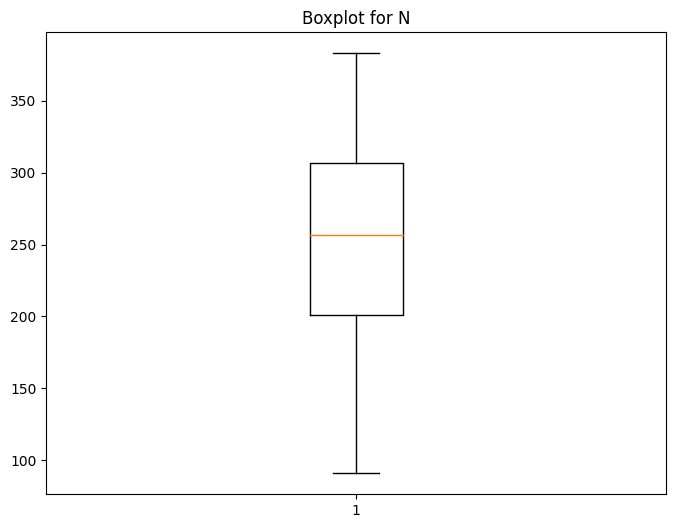

Aberrant values in column P are 17.40702947845805
Aberrant values in column P are 59.2
Aberrant values in column P are 78.9
Aberrant values in column P are 18.4
Aberrant values in column P are 20.4
Aberrant values in column P are 19.3
Aberrant values in column P are 18.2
Aberrant values in column P are 19.5
Aberrant values in column P are 20.8
Aberrant values in column P are 21.5
Aberrant values in column P are 20.4
Aberrant values in column P are 21.1
Aberrant values in column P are 76.8
Aberrant values in column P are 70.97086549975798
Aberrant values in column P are 78.9
Aberrant values in column P are 63.6
Aberrant values in column P are 61.4
Aberrant values in column P are 70.2
Aberrant values in column P are 68.0
Aberrant values in column P are 65.8
Aberrant values in column P are 74.6
Aberrant values in column P are 70.97086549975798
Aberrant values in column P are 68.0
Aberrant values in column P are 63.6
Aberrant values in column P are 70.2
Aberrant values in column P are 61.4

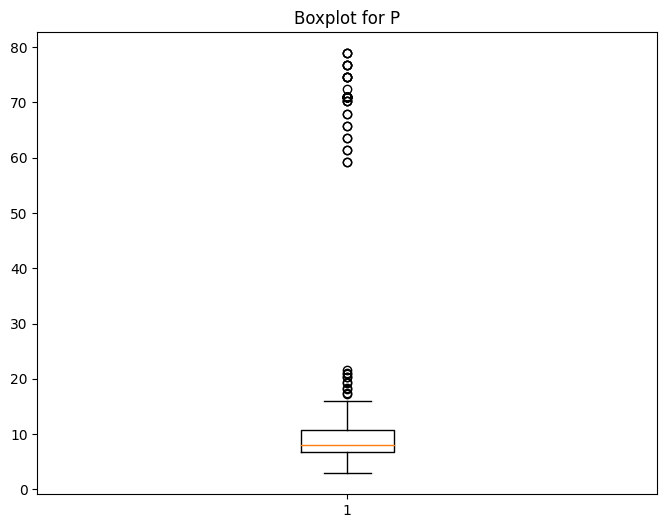

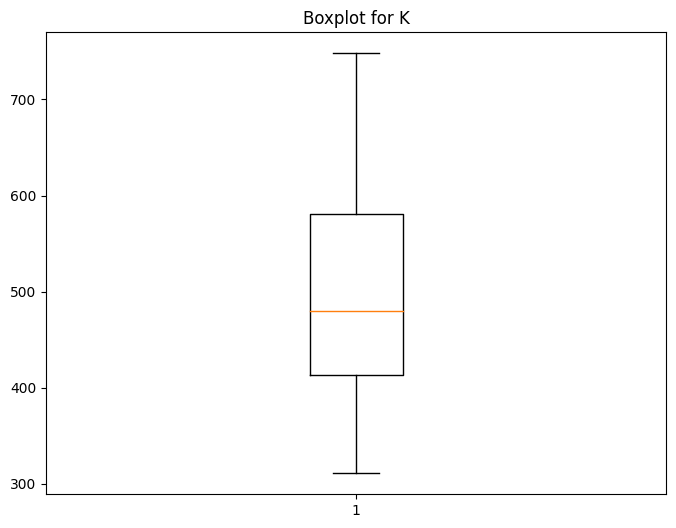

Aberrant values in column pH are 8.26
Aberrant values in column pH are 8.23
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.3
Aberrant values in column pH are 8.179213483146066
Aberrant values in column pH are 6.927727272727273
Aberrant values in column pH are 6.927727272727273
Aberrant values in column pH are 8.3
Aberrant values in column pH are 8.4
Aberrant values in column pH are 8.95
Aberrant values in column pH are 8.179213483146066
Aberrant values in column pH are 8.179213483146066
Aberrant values in column pH are 8.179213483146066
Aberrant values in column pH are 8.179213483146066
Aberrant values in column pH are 8.26
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.4
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.2
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.12
Aberrant values in column pH are 8.1
Aberrant values in column pH are 8.3
Aberrant values in column pH are 8.2
Aberrant 

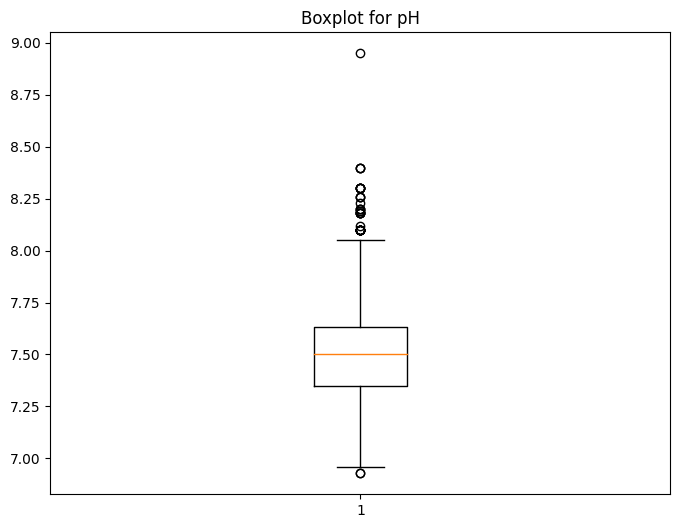

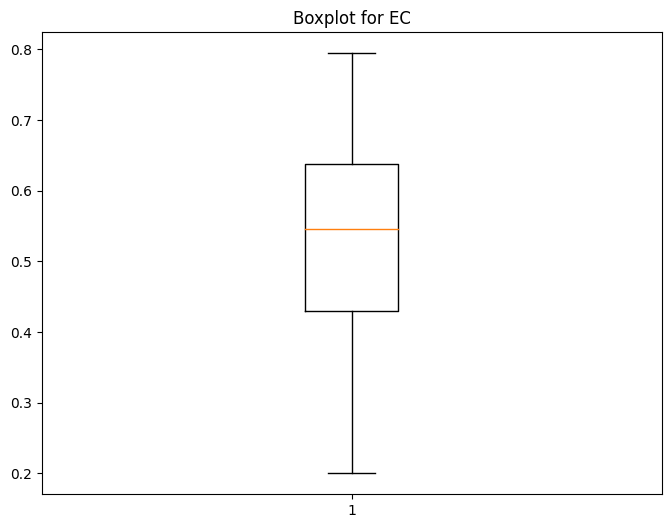

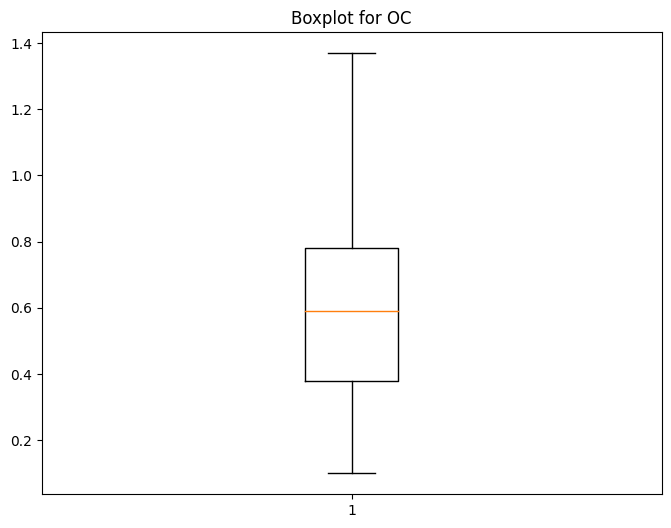

Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 15.8
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 15.8
Aberrant values in column S are 15.0
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 16.0
Aberrant values in column S are 16.0
Aberrant values in column S are 17.4
Aberrant values in column S are 17.633820224719102
Aberrant values in column S are 17.633820224719102
Aberrant valu

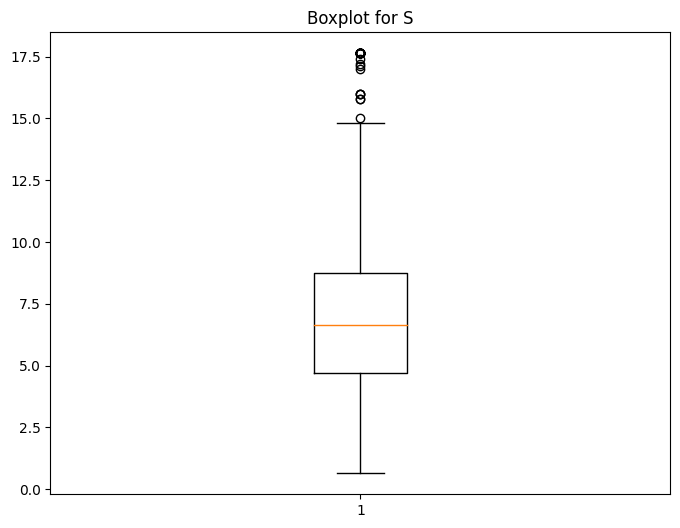

Aberrant values in column Zn are 0.77
Aberrant values in column Zn are 0.83
Aberrant values in column Zn are 0.76
Aberrant values in column Zn are 0.78
Aberrant values in column Zn are 0.79
Aberrant values in column Zn are 0.85
Aberrant values in column Zn are 1.5088764044943819
Aberrant values in column Zn are 1.5088764044943819


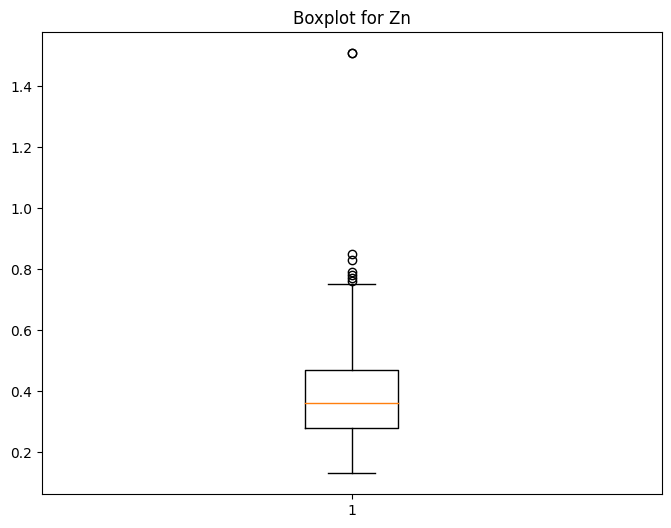

Aberrant values in column Fe are 44.0
Aberrant values in column Fe are 34.0


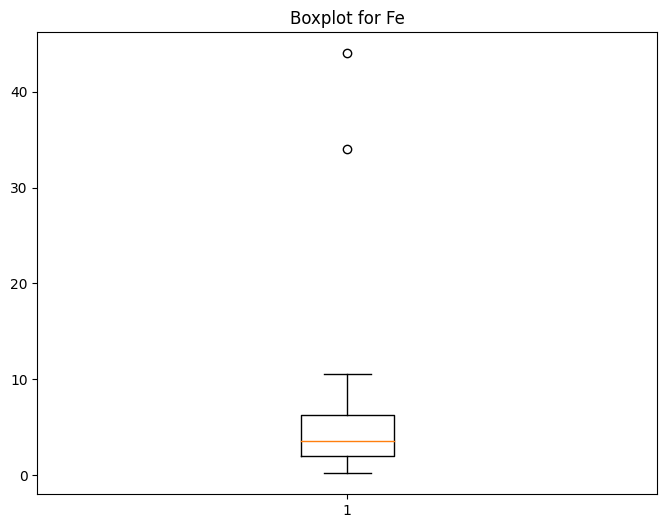

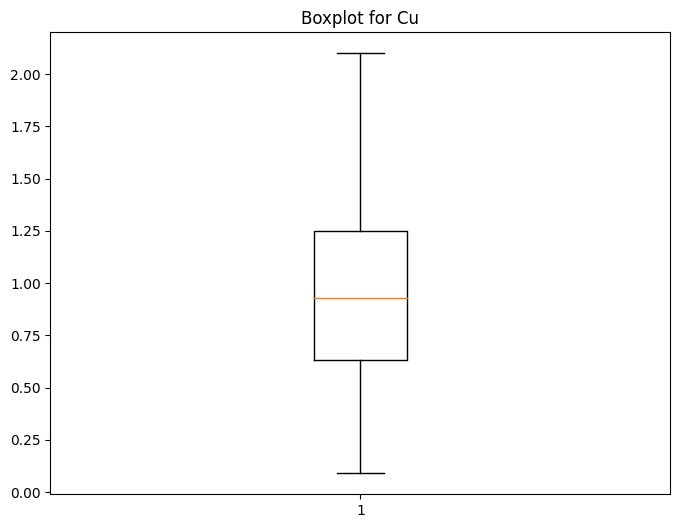

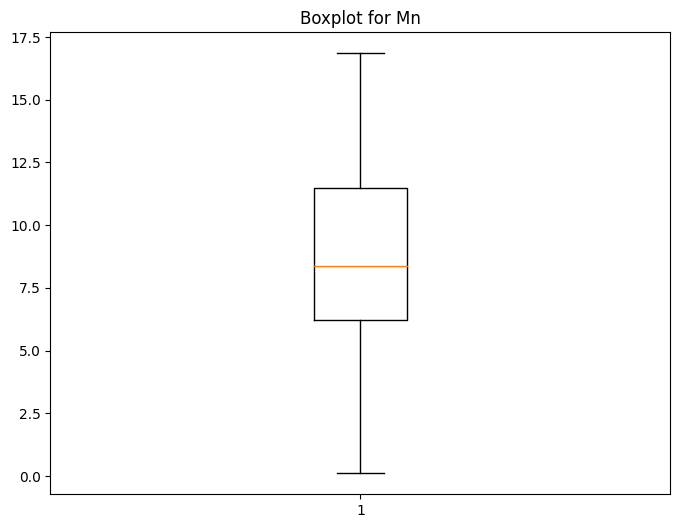

Aberrant values in column B are 2.29
Aberrant values in column B are 2.03
Aberrant values in column B are 1.82
Aberrant values in column B are 2.26
Aberrant values in column B are 1.82
Aberrant values in column B are 1.88
Aberrant values in column B are 1.68
Aberrant values in column B are 1.79
Aberrant values in column B are 2.0
Aberrant values in column B are 2.41
Aberrant values in column B are 2.38
Aberrant values in column B are 2.12
Aberrant values in column B are 2.29
Aberrant values in column B are 2.56
Aberrant values in column B are 2.79
Aberrant values in column B are 1.32
Aberrant values in column B are 2.56
Aberrant values in column B are 1.85
Aberrant values in column B are 2.65
Aberrant values in column B are 1.97
Aberrant values in column B are 2.47
Aberrant values in column B are 1.94
Aberrant values in column B are 1.91
Aberrant values in column B are 2.82
Aberrant values in column B are 1.85
Aberrant values in column B are 2.18
Aberrant values in column B are 2.12
Ab

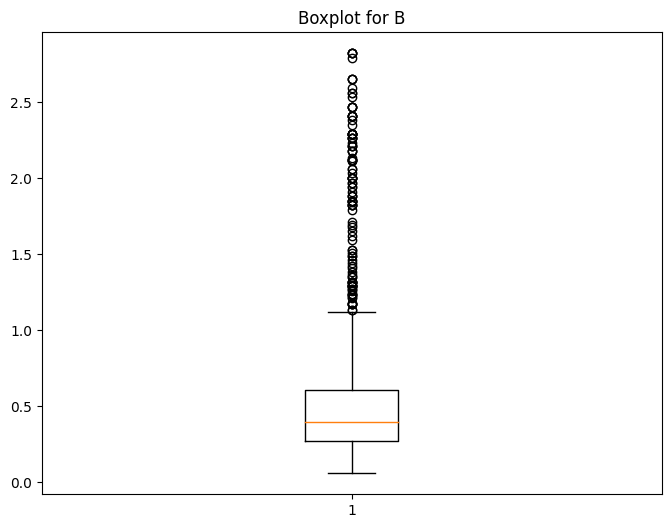

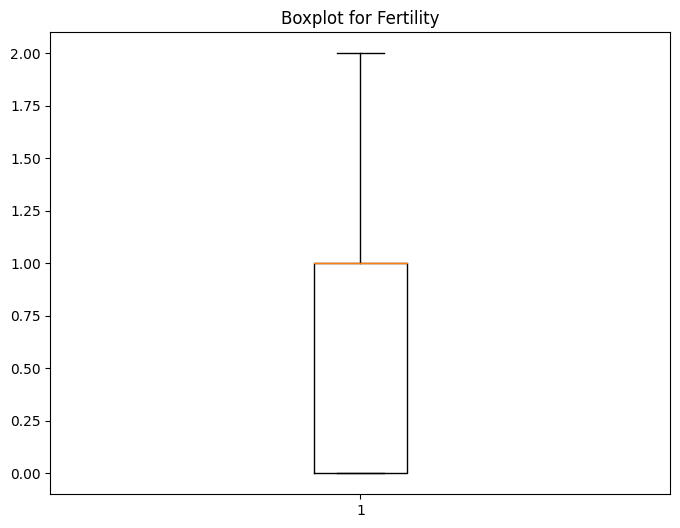

In [270]:
for attr in dataset.columns:
    box(dataset, attr)

In [271]:
def min_max_normalize(dataset, attr, new_min=0, new_max=1):
    # Trouver les valeurs minimales et maximales dans le dataset
    x = dataset[attr]
    min_val = x.min()
    max_val = x.max()
    
    # Appliquer la normalisation Min-Max
    normalized_data = (x - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    dataset[attr] = normalized_data
    
    return dataset

In [272]:
print(dataset)
for attr in dataset.columns:
    if attr != 'Fertility':
        print('COLUMN:', attr)
        dataset_min_max = min_max_normalize(dataset.copy(), attr)
print(dataset_min_max)

       N     P    K    pH        EC    OC         S    Zn    Fe    Cu  \
0    138   8.6  541  7.46  0.606136  0.70   5.90000  0.24  0.31  0.77   
1    213   7.5  311  7.62  0.794382  1.06  17.63382  0.30  0.86  1.54   
2    163   9.6  748  7.59  0.510000  1.11  14.30000  0.30  0.86  1.57   
3    157   6.8  462  7.64  0.569101  0.94  17.63382  0.34  0.54  1.53   
4    270   9.9  441  7.63  0.400000  0.86  11.80000  0.25  0.76  1.69   
..   ...   ...  ...   ...       ...   ...       ...   ...   ...   ...   
878  351  10.7  636  7.96  0.510000  0.29   7.24000  0.36  4.69  0.69   
879  264   9.0  497  7.24  0.470000  0.10   3.92000  0.35  8.26  0.45   
880  276   9.2  375  7.62  0.606136  0.49   6.64000  0.42  3.57  0.63   
881  320  13.8  375  7.38  0.638202  1.07   5.43000  0.58  4.58  1.02   
882  264  10.3  462  7.49  0.794382  0.88  10.56000  0.45  7.36  1.87   

            Mn     B  Fertility  
0     8.710000  0.11          0  
1     2.890000  2.29          0  
2     2.700000  2.03 

In [273]:

def z_score_normalization(dataset, attr):
    # Calculate mean and standard deviation
    #print(dataset)
    data=dataset[attr]
    #print(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Z-score normalization
    normalized_data = (data - mean) / std_dev
    dataset[attr] = normalized_data
    
    return dataset

In [274]:
print(dataset)
for attr in dataset.columns:
    if attr != 'Fertility':
        print('COLUMN:', attr)
        dataset = z_score_normalization(dataset.copy(), attr)
print(dataset)

       N     P    K    pH        EC    OC         S    Zn    Fe    Cu  \
0    138   8.6  541  7.46  0.606136  0.70   5.90000  0.24  0.31  0.77   
1    213   7.5  311  7.62  0.794382  1.06  17.63382  0.30  0.86  1.54   
2    163   9.6  748  7.59  0.510000  1.11  14.30000  0.30  0.86  1.57   
3    157   6.8  462  7.64  0.569101  0.94  17.63382  0.34  0.54  1.53   
4    270   9.9  441  7.63  0.400000  0.86  11.80000  0.25  0.76  1.69   
..   ...   ...  ...   ...       ...   ...       ...   ...   ...   ...   
878  351  10.7  636  7.96  0.510000  0.29   7.24000  0.36  4.69  0.69   
879  264   9.0  497  7.24  0.470000  0.10   3.92000  0.35  8.26  0.45   
880  276   9.2  375  7.62  0.606136  0.49   6.64000  0.42  3.57  0.63   
881  320  13.8  375  7.38  0.638202  1.07   5.43000  0.58  4.58  1.02   
882  264  10.3  462  7.49  0.794382  0.88  10.56000  0.45  7.36  1.87   

            Mn     B  Fertility  
0     8.710000  0.11          0  
1     2.890000  2.29          0  
2     2.700000  2.03 

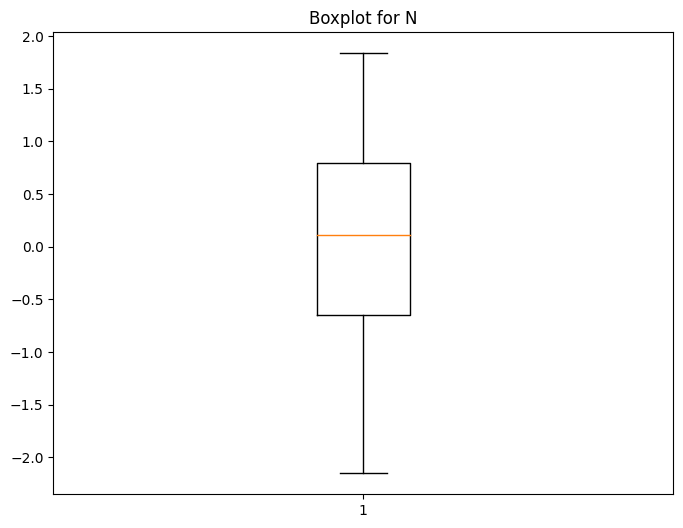

Aberrant values in column P are 0.24953747728561615
Aberrant values in column P are 2.742340859570104
Aberrant values in column P are 3.917376422205975
Aberrant values in column P are 0.30876466893337645
Aberrant values in column P are 0.42805761945478465
Aberrant values in column P are 0.36244649666801027
Aberrant values in column P are 0.29683537388123565
Aberrant values in column P are 0.374375791720151
Aberrant values in column P are 0.4519162095590664
Aberrant values in column P are 0.4936687422415592
Aberrant values in column P are 0.42805761945478465
Aberrant values in column P are 0.46981015213727767
Aberrant values in column P are 3.7921188241584955
Aberrant values in column P are 3.4444314973984933
Aberrant values in column P are 3.917376422205975
Aberrant values in column P are 3.004785350717202
Aberrant values in column P are 2.8735631051436528
Aberrant values in column P are 3.398452087437849
Aberrant values in column P are 3.2672298418643
Aberrant values in column P are 3

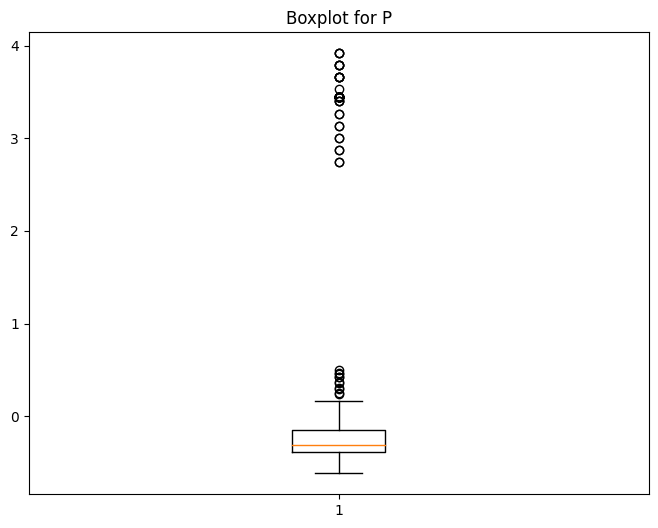

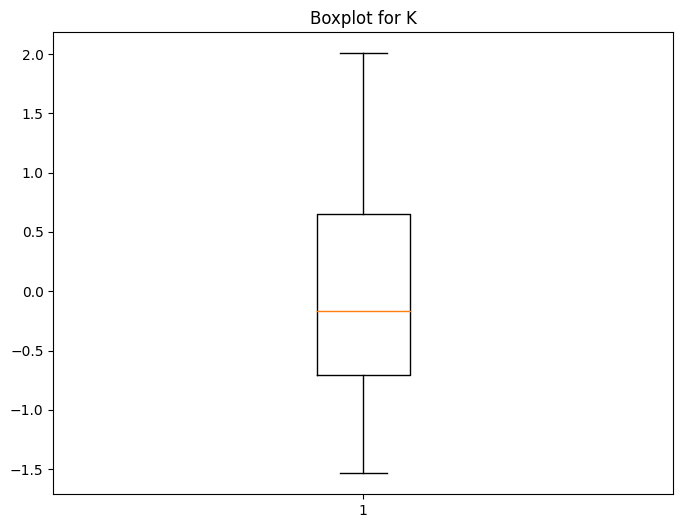

Aberrant values in column pH are 2.7084791972497597
Aberrant values in column pH are 2.599603216962565
Aberrant values in column pH are 2.127807302384708
Aberrant values in column pH are 2.8536471709660263
Aberrant values in column pH are 2.415288823367753
Aberrant values in column pH are 1.9463473352393832
Aberrant values in column pH are -2.126604109140767
Aberrant values in column pH are -2.126604109140767
Aberrant values in column pH are 2.8536471709660263
Aberrant values in column pH are 3.216567105256682
Aberrant values in column pH are 5.212626743855292
Aberrant values in column pH are 2.415288823367753
Aberrant values in column pH are 2.415288823367753
Aberrant values in column pH are 2.415288823367753
Aberrant values in column pH are 2.415288823367753
Aberrant values in column pH are 2.7084791972497597
Aberrant values in column pH are 2.127807302384708
Aberrant values in column pH are 3.216567105256682
Aberrant values in column pH are 2.127807302384708
Aberrant values in colum

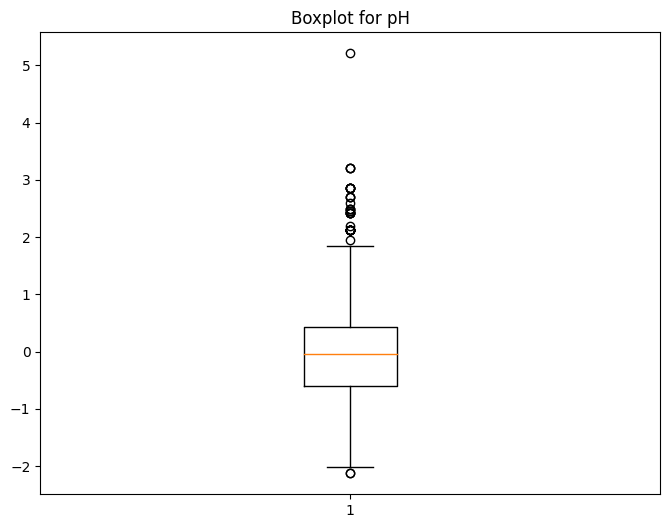

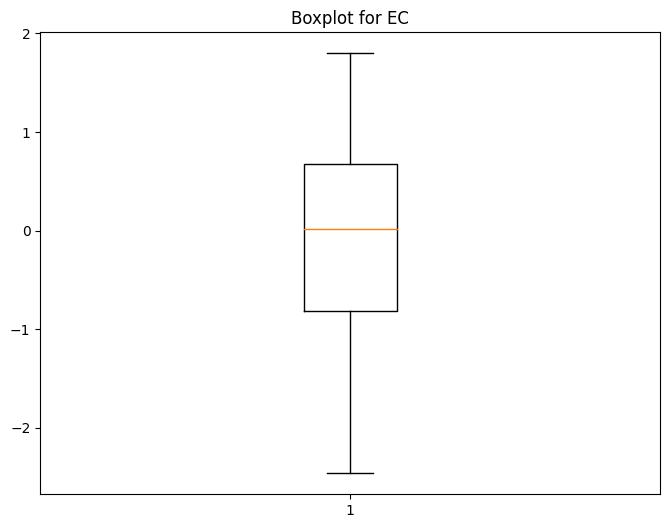

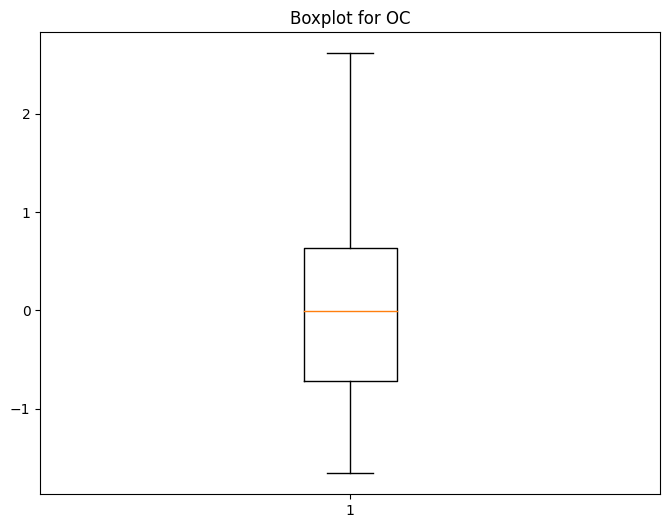

Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 2.493366542034571
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 2.493366542034571
Aberrant values in column S are 2.2595414747143385
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 3.0293579639072545
Aberrant values in column S are 2.5518228088646286
Aberrant values in column S are 2.5518228088646286
Aberrant values in column S are 2.9610166766750345
Aberrant values in column S are 3

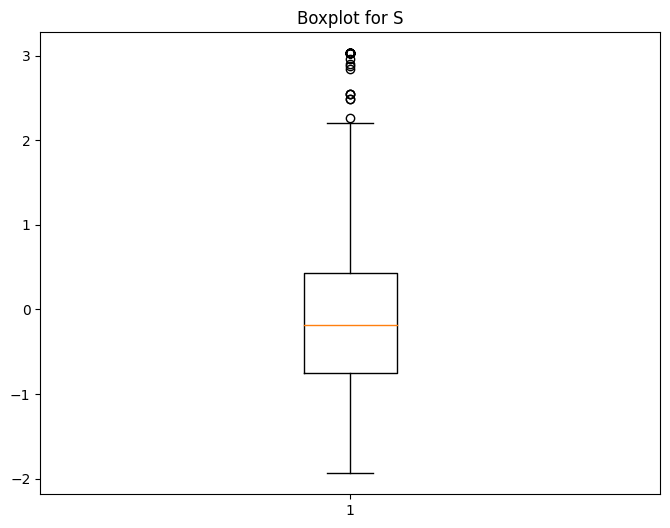

Aberrant values in column Zn are 2.900977242769187
Aberrant values in column Zn are 3.3503520969213296
Aberrant values in column Zn are 2.82608143374383
Aberrant values in column Zn are 2.9758730517945446
Aberrant values in column Zn are 3.0507688608199017
Aberrant values in column Zn are 3.500143714972044
Aberrant values in column Zn are 8.43485185120456
Aberrant values in column Zn are 8.43485185120456


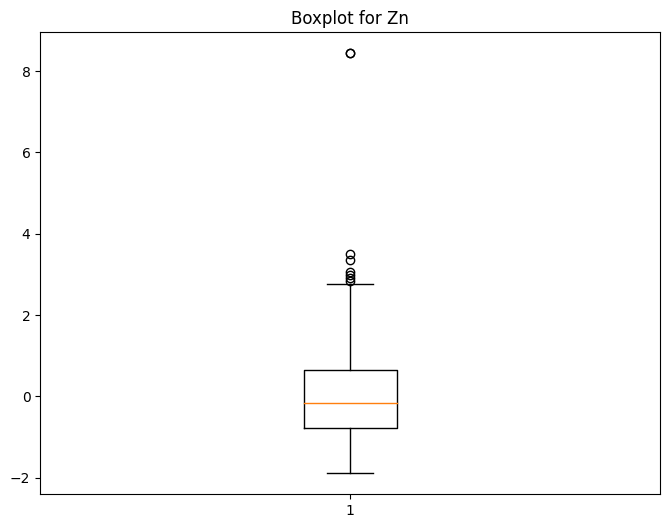

Aberrant values in column Fe are 12.837850272691105
Aberrant values in column Fe are 9.617232389742355


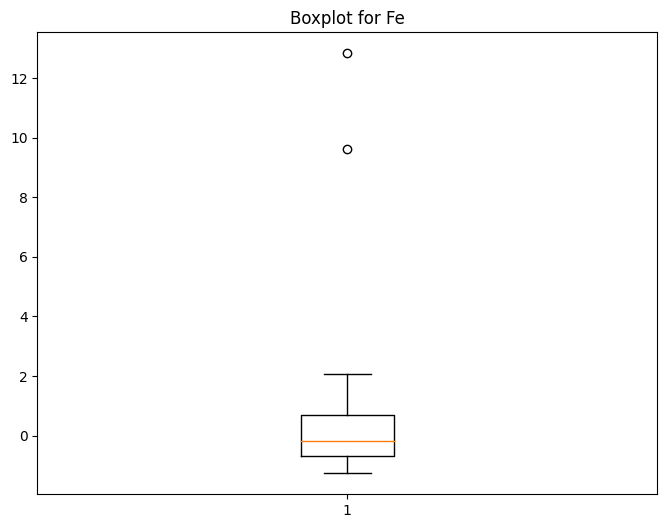

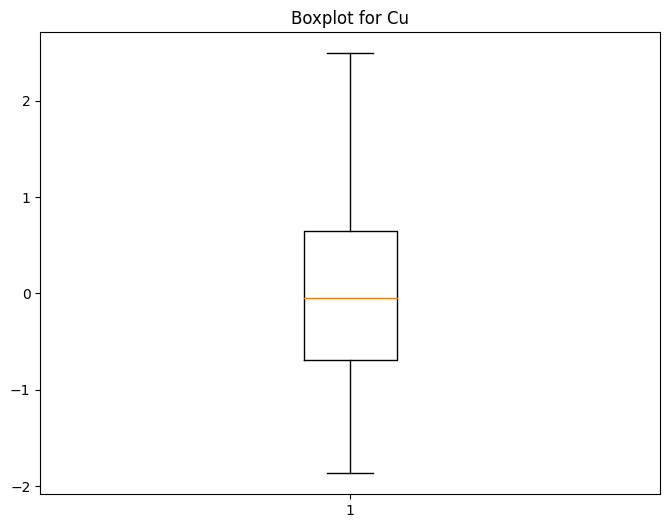

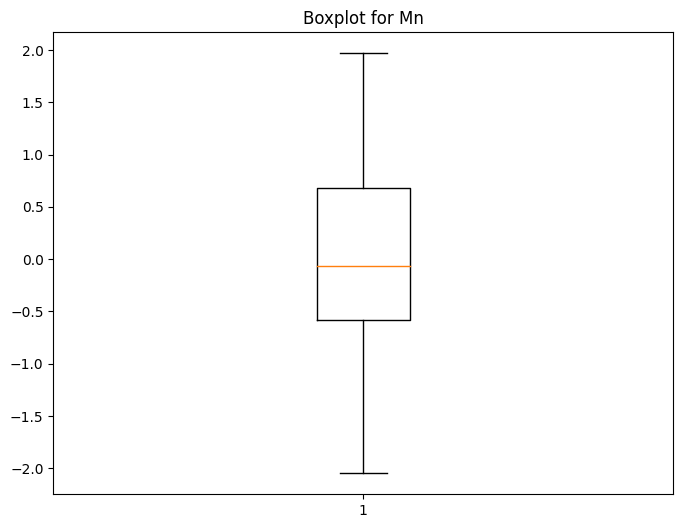

Aberrant values in column B are 2.983359914377954
Aberrant values in column B are 2.527212153921667
Aberrant values in column B are 2.158785116630051
Aberrant values in column B are 2.930727480479151
Aberrant values in column B are 2.158785116630051
Aberrant values in column B are 2.264049984427656
Aberrant values in column B are 1.9131670917689734
Aberrant values in column B are 2.106152682731249
Aberrant values in column B are 2.474579720022865
Aberrant values in column B are 3.1938896499731633
Aberrant values in column B are 3.1412572160743606
Aberrant values in column B are 2.6851094556180746
Aberrant values in column B are 2.983359914377954
Aberrant values in column B are 3.457051819467175
Aberrant values in column B are 3.860567146024659
Aberrant values in column B are 1.2815778849833461
Aberrant values in column B are 3.457051819467175
Aberrant values in column B are 2.2114175505288536
Aberrant values in column B are 3.614949121163581
Aberrant values in column B are 2.4219472861

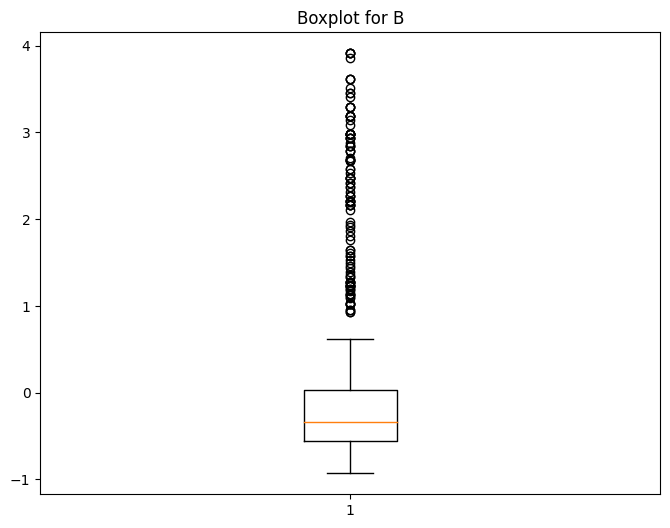

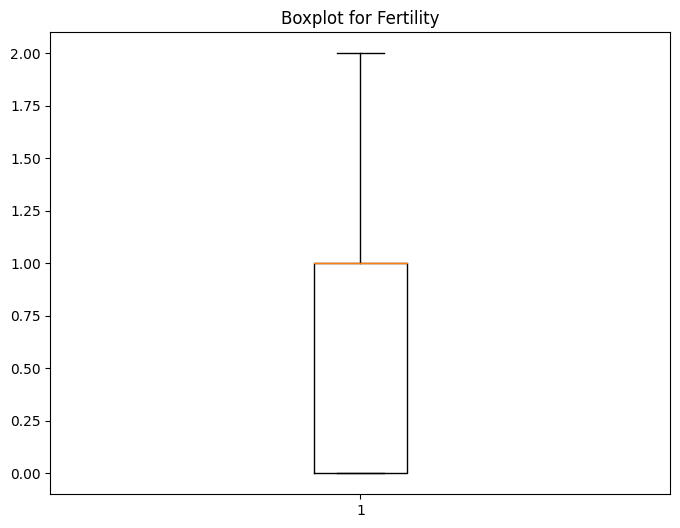

In [275]:
for attr in dataset.columns:
    box(dataset, attr)

## Treat outliers by winsorizing

below:  42.0
above:  466.0


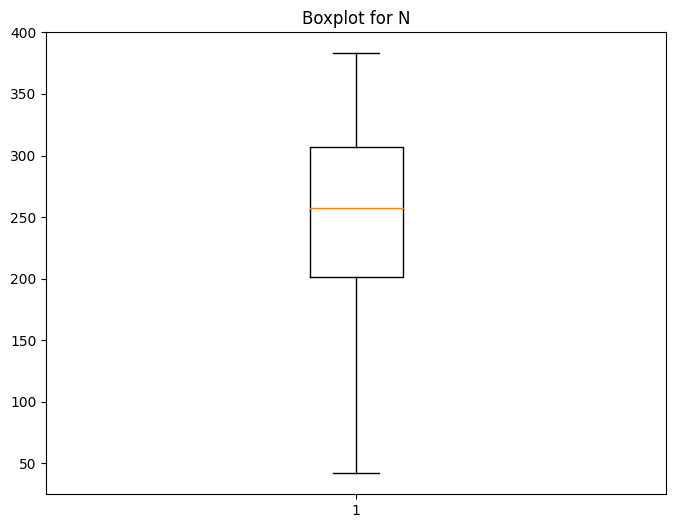

below:  0.9500000000000002
above:  16.549999999999997


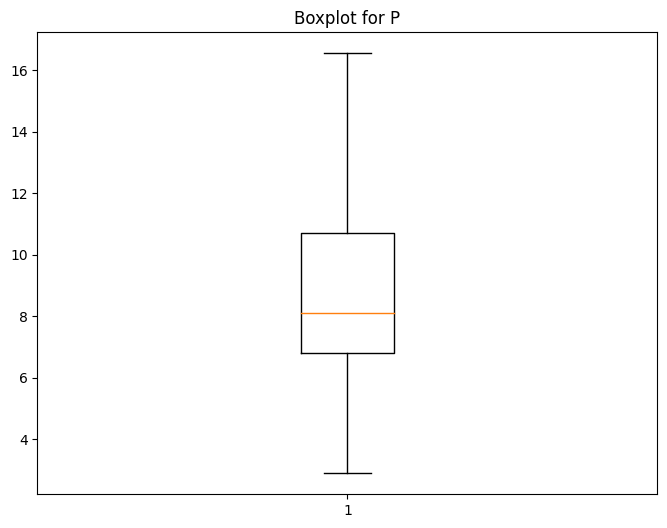

below:  158.5
above:  834.5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11556\3543758186.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '158.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[x < below_q1] = below_q1


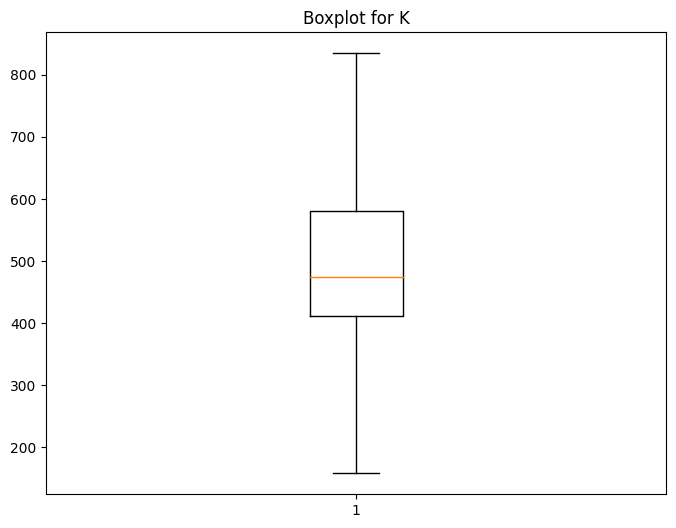

below:  6.93
above:  8.05


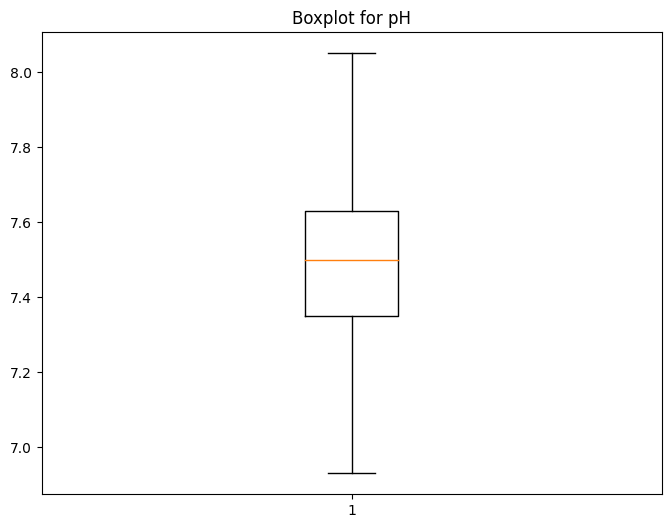

below:  0.11499999999999994
above:  0.9550000000000001


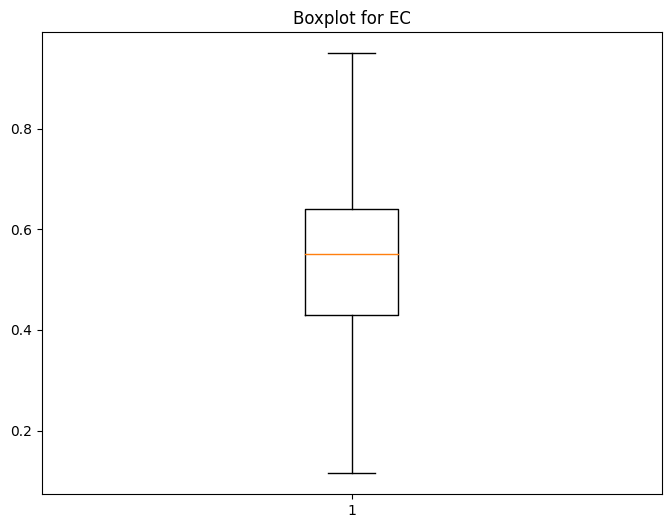

below:  -0.22000000000000008
above:  1.3800000000000001


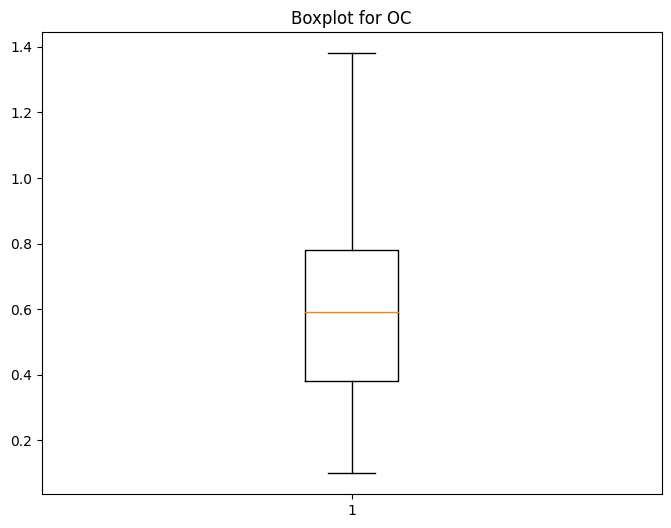

below:  -1.3749999999999991
above:  14.825


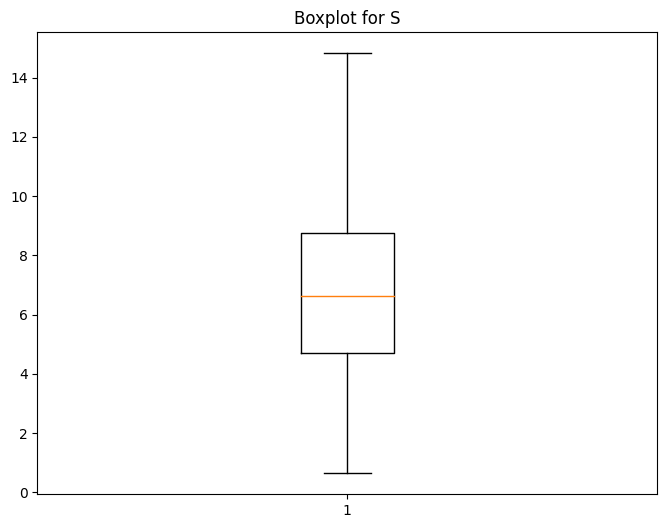

below:  -0.004999999999999893
above:  0.7549999999999999


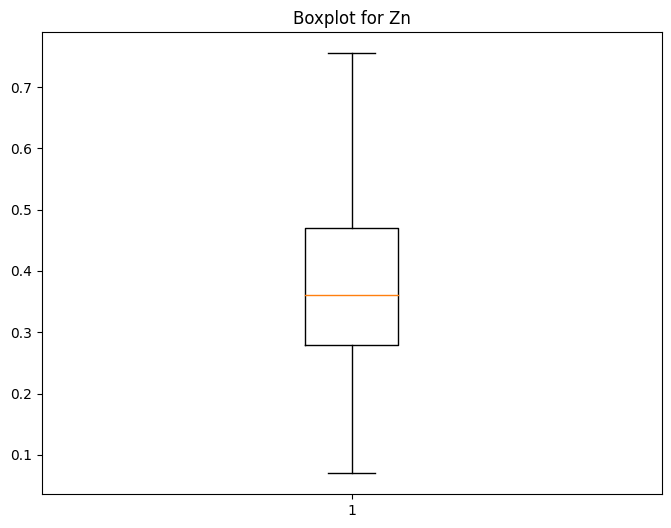

below:  -4.355000000000001
above:  12.725000000000001


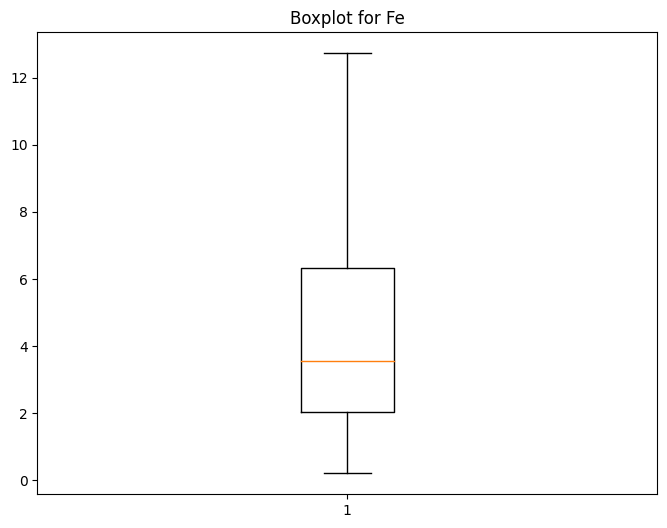

below:  -0.29999999999999993
above:  2.1799999999999997


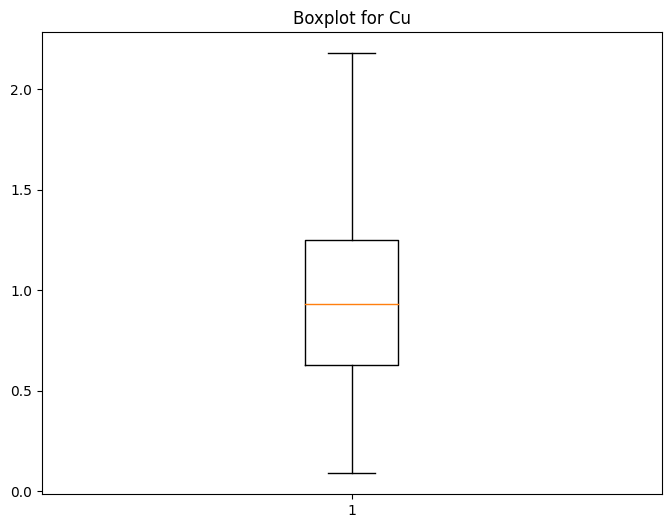

below:  -1.6800000000000006
above:  19.36


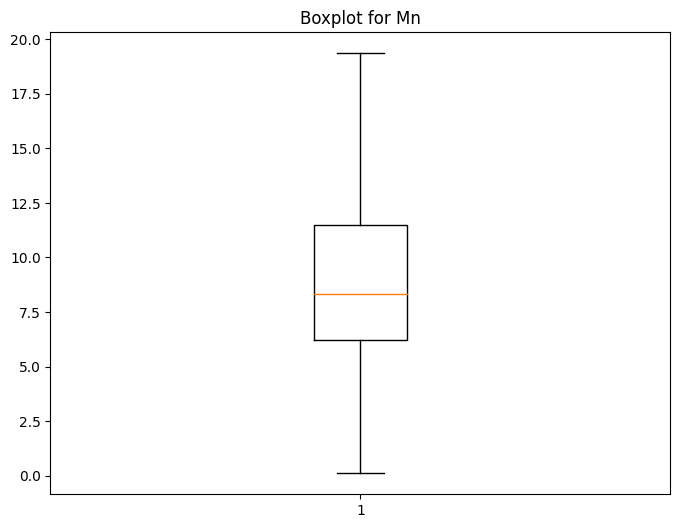

below:  -0.24
above:  1.12


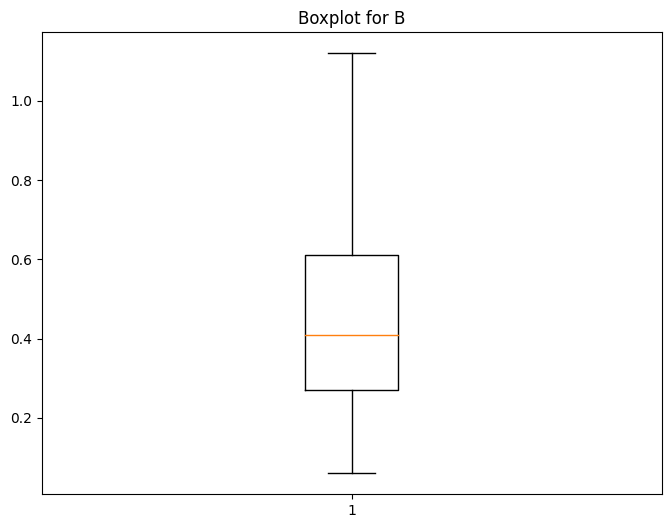

below:  -0.37840000000000007
above:  2.3735999999999997


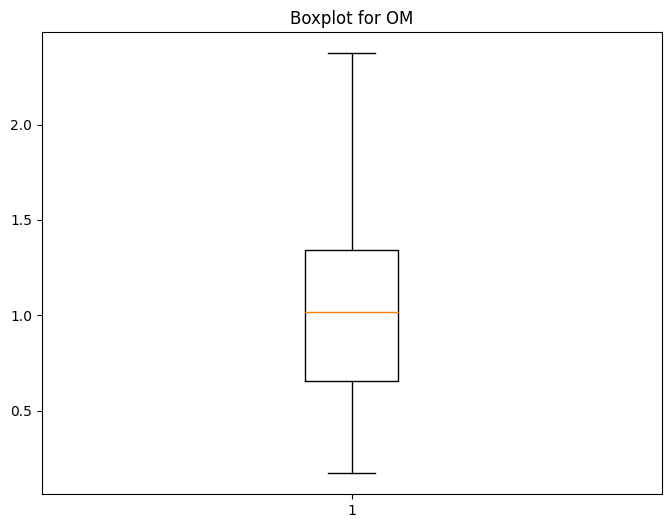

below:  -1.5
above:  2.5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11556\3543758186.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.loc[x < below_q1] = below_q1


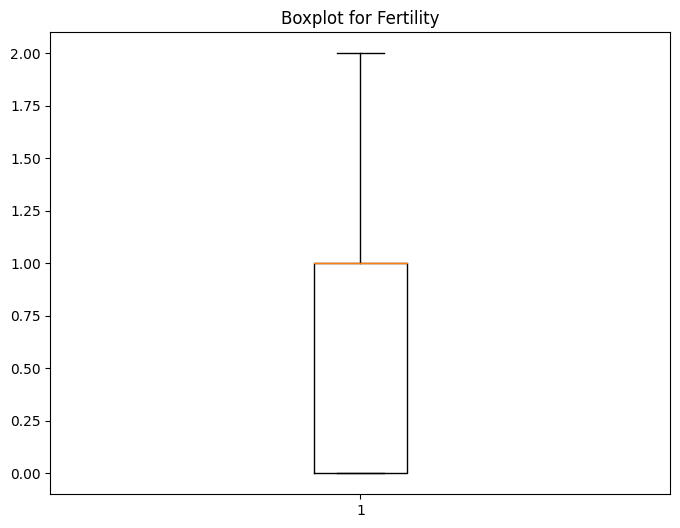

In [276]:
import pandas as pd
import matplotlib.pyplot as plt

def box_treat_outliers(dataset, attr):
    x = dataset[attr].copy()  # Make a copy of the column
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    val = 1.5 * (q3 - q1)
    below_q1 = q1 - val
    print('below: ', below_q1)
    above_q3 = q3 + val
    print('above: ', above_q3)
    
    # Replace outliers with below_q1 or above_q3
    x.loc[x < below_q1] = below_q1
    x.loc[x > above_q3] = above_q3
    
    dataset[attr] = x
    return dataset

# Assuming dataset is already defined
for attr in dataset3.columns:
    if attr != 'end date' and attr != 'Start date':
        # box(dataset, attr)
        dataset3 = box_treat_outliers(dataset3, attr)
        box(dataset3, attr)
        # plt.show()  # Display the box plot for each attribute


In [277]:
def count_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    duplicate_rows = df[df.duplicated()]
    num_identical_rows = len(duplicate_rows)

    return num_identical_rows

In [278]:
result = count_identical_rows(dataset3)
print(f"Number of identical rows: {result}")

Number of identical rows: 3


In [279]:
def remove_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    
    # Identify and store duplicated rows
    duplicated_rows = df[df.duplicated()]
    
    # Remove identical rows from the dataset
    df_no_duplicates = df.drop_duplicates()
    
    # Convert the results back to lists
    deleted_rows = duplicated_rows.values.tolist()

    return df_no_duplicates, deleted_rows

In [280]:
dataset3, deleted = remove_identical_rows(dataset3)
print("\nDeleted rows:")
for row in deleted:
    print(row)


Deleted rows:
[377, 11.2, 623.0, 7.8, 0.64, 0.54, 3.8, 0.37, 0.88, 0.31, 1.13, 0.85, 0.9288, 2.0]
[220, 8.6, 444.0, 7.43, 0.65, 0.72, 11.7, 0.37, 0.66, 0.9, 2.19, 1.12, 1.2384, 0.0]
[270, 8.1, 655.0, 7.45, 0.55, 0.67, 10.2, 0.28, 0.44, 1.26, 7.75, 1.12, 1.1524, 1.0]


In [281]:
dataset3 = dataset3.drop(columns=['OM'])
print(dataset3)

       N     P      K    pH    EC    OC       S    Zn    Fe    Cu     Mn  \
0    138   8.6  560.0  7.46  0.62  0.70   5.900  0.24  0.31  0.77   8.71   
1    213   7.5  338.0  7.62  0.75  1.06  14.825  0.30  0.86  1.54   2.89   
2    163   9.6  718.0  7.59  0.51  1.11  14.300  0.30  0.86  1.57   2.70   
3    157   6.8  475.0  7.64  0.58  0.94  14.825  0.34  0.54  1.53   2.65   
4    270   9.9  444.0  7.63  0.40  0.86  11.800  0.25  0.76  1.69   2.43   
..   ...   ...    ...   ...   ...   ...     ...   ...   ...   ...    ...   
878  351  10.7  623.0  7.96  0.51  0.29   7.240  0.36  4.69  0.69  11.03   
879  264   9.0  486.0  7.24  0.47  0.10   3.920  0.35  8.26  0.45   7.98   
880  276   9.2  370.0  7.62  0.62  0.49   6.640  0.42  3.57  0.63   6.48   
881  320  13.8  391.0  7.38  0.65  1.07   5.430  0.58  4.58  1.02  13.25   
882  264  10.3  475.0  7.49  0.74  0.88  10.560  0.45  7.36  1.87  10.63   

        B  Fertility  
0    0.11        0.0  
1    1.12        0.0  
2    1.12        0

In [282]:
def min_max_normalize(dataset, attr, new_min=0, new_max=1):
    # Trouver les valeurs minimales et maximales dans le dataset
    x = dataset[attr]
    min_val = x.min()
    max_val = x.max()
    
    # Appliquer la normalisation Min-Max
    normalized_data = (x - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    dataset[attr] = normalized_data
    
    return dataset

In [283]:
# print(dataset)
# for attr in dataset3.columns:
#     if attr != 'Fertility':
#         print('COLUMN:', attr)
#         dataset3 = min_max_normalize(dataset3.copy(), attr)
# print(dataset)

In [284]:
def z_score_normalization(dataset, attr):
    # Calculate mean and standard deviation
    #print(dataset)
    data=dataset[attr]
    #print(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Z-score normalization
    normalized_data = (data - mean) / std_dev
    dataset[attr] = normalized_data
    
    return dataset

In [285]:
print(dataset3)
for attr in dataset3.columns:
    if attr != 'Fertility':
        print('COLUMN:', attr)
        dataset3 = z_score_normalization(dataset3.copy(), attr)
print(dataset3)

       N     P      K    pH    EC    OC       S    Zn    Fe    Cu     Mn  \
0    138   8.6  560.0  7.46  0.62  0.70   5.900  0.24  0.31  0.77   8.71   
1    213   7.5  338.0  7.62  0.75  1.06  14.825  0.30  0.86  1.54   2.89   
2    163   9.6  718.0  7.59  0.51  1.11  14.300  0.30  0.86  1.57   2.70   
3    157   6.8  475.0  7.64  0.58  0.94  14.825  0.34  0.54  1.53   2.65   
4    270   9.9  444.0  7.63  0.40  0.86  11.800  0.25  0.76  1.69   2.43   
..   ...   ...    ...   ...   ...   ...     ...   ...   ...   ...    ...   
878  351  10.7  623.0  7.96  0.51  0.29   7.240  0.36  4.69  0.69  11.03   
879  264   9.0  486.0  7.24  0.47  0.10   3.920  0.35  8.26  0.45   7.98   
880  276   9.2  370.0  7.62  0.62  0.49   6.640  0.42  3.57  0.63   6.48   
881  320  13.8  391.0  7.38  0.65  1.07   5.430  0.58  4.58  1.02  13.25   
882  264  10.3  475.0  7.49  0.74  0.88  10.560  0.45  7.36  1.87  10.63   

        B  Fertility  
0    0.11        0.0  
1    1.12        0.0  
2    1.12        0

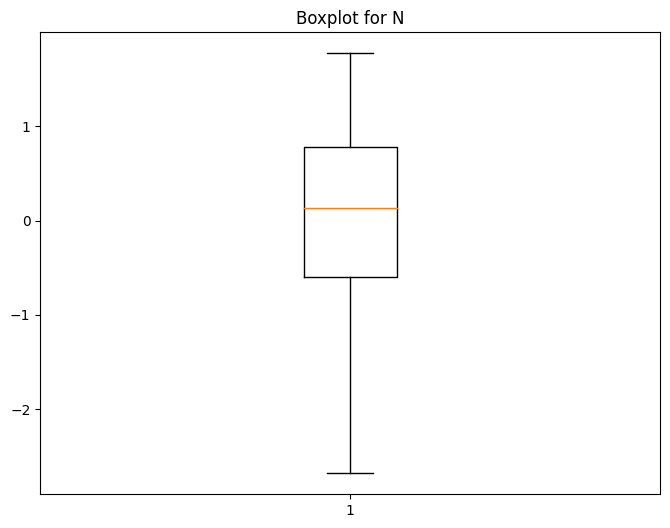

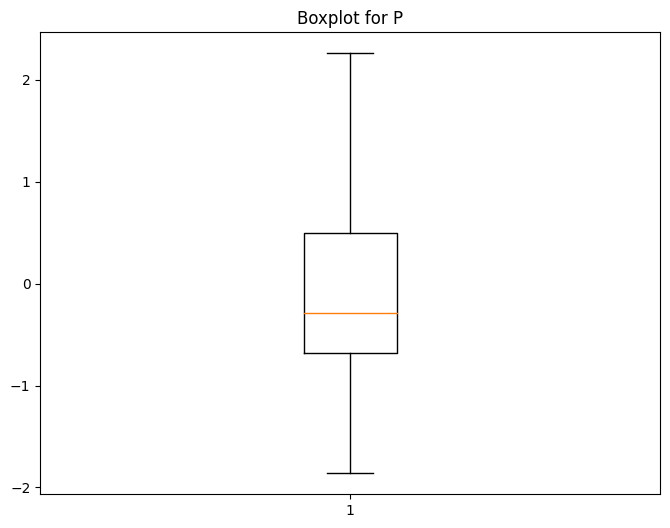

Aberrant values in column K are -2.7745063367563563
Aberrant values in column K are -2.7745063367563563


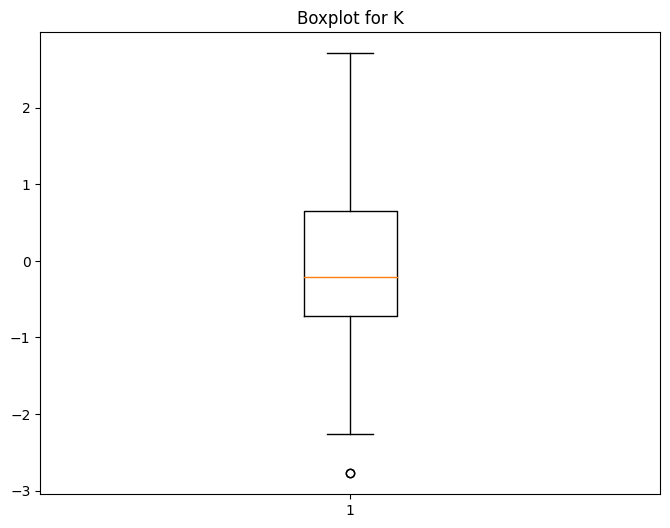

Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant values in column pH are 2.1179411694312797
Aberrant val

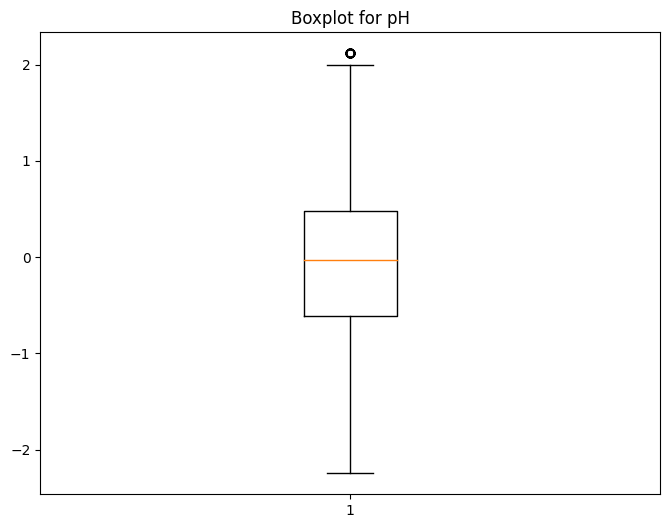

Aberrant values in column EC are -3.0329240854193853


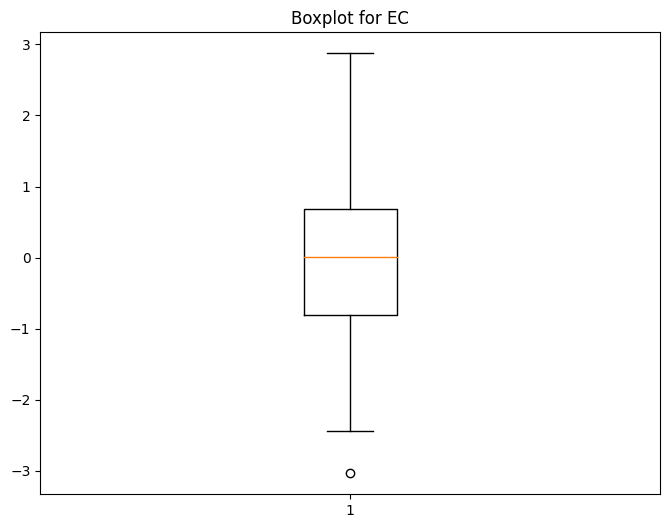

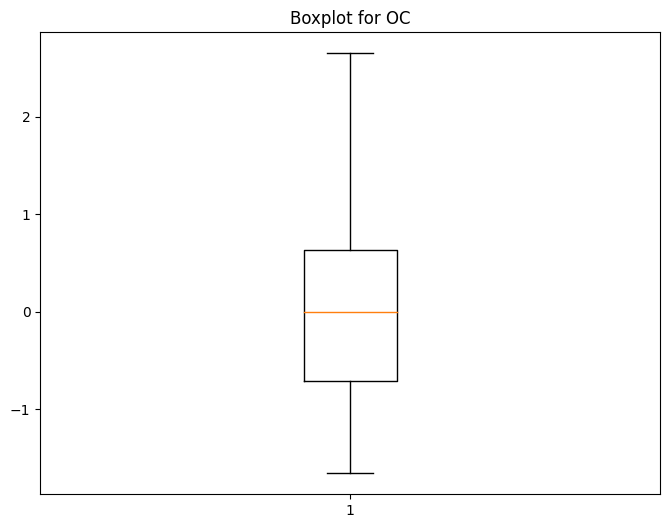

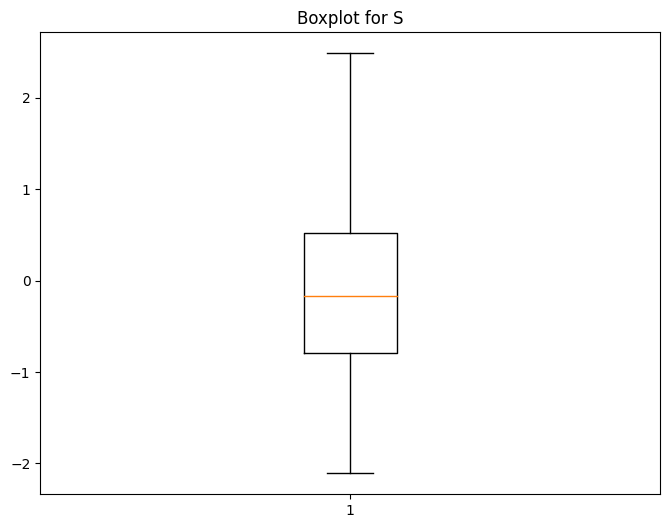

Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856
Aberrant values in column Zn are 3.0229735754724856


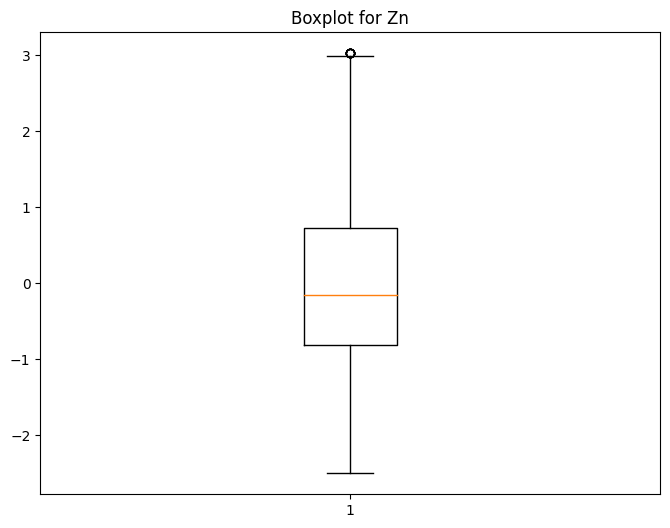

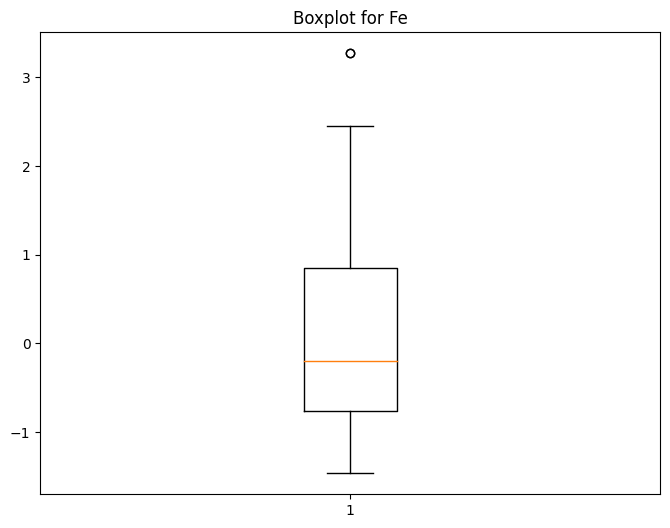

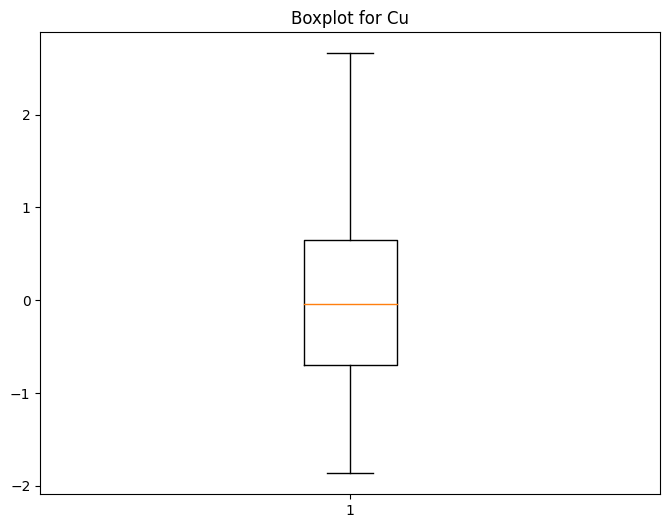

Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714
Aberrant values in column Mn are 2.565170381111714


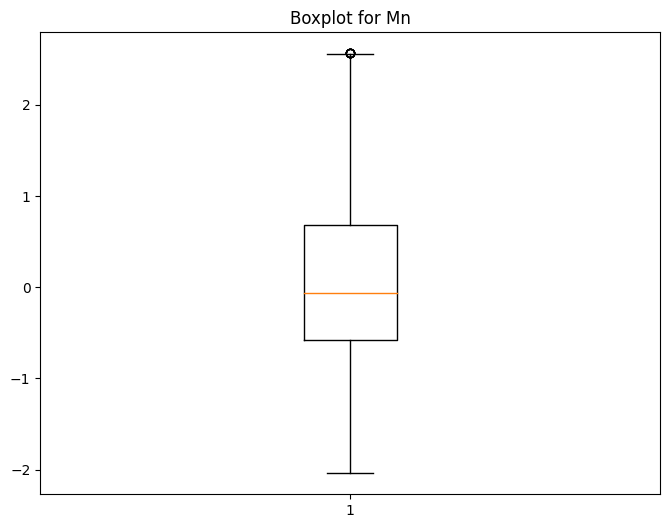

Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488
Aberrant values in column B are 2.065045222110488


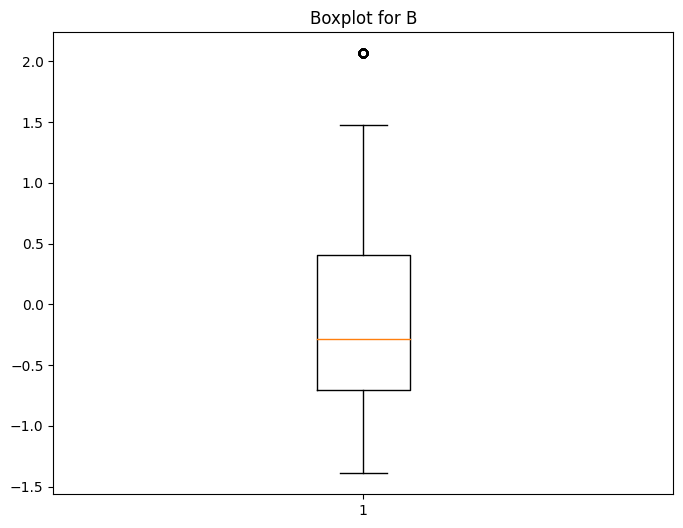

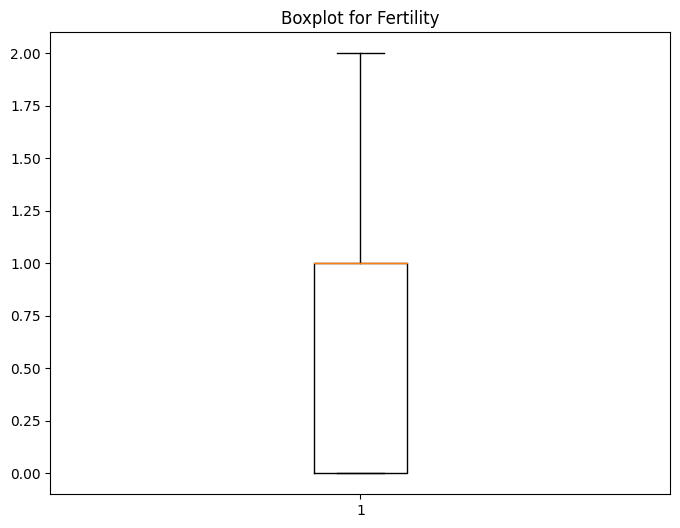

In [286]:
for attr in dataset3.columns:
    box(dataset3, attr)

# 1. Analyse supervisée

## KNN

In [287]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 882
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          882 non-null    float64
 1   P          882 non-null    object 
 2   K          882 non-null    float64
 3   pH         882 non-null    float64
 4   EC         882 non-null    float64
 5   OC         882 non-null    float64
 6   S          882 non-null    float64
 7   Zn         882 non-null    float64
 8   Fe         882 non-null    float64
 9   Cu         882 non-null    float64
 10  Mn         882 non-null    float64
 11  B          882 non-null    float64
 12  Fertility  882 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 96.5+ KB


In [288]:
print(dataset)

            N         P         K        pH        EC        OC         S  \
0   -1.509505 -0.275771  0.328864 -0.194880  0.449445  0.362939 -0.400219   
1   -0.485269 -0.341382 -1.535003  0.385792  1.798369  1.573914  3.029358   
2   -1.168093 -0.216124  2.006345  0.276916 -0.239445  1.742105  2.054945   
3   -1.250032 -0.383134 -0.311334  0.458376  0.184060  1.170256  3.029358   
4    0.293150  -0.19823 -0.481513  0.422084 -1.027678  0.901150  1.324241   
..        ...       ...       ...       ...       ...       ...       ...   
878  1.399324 -0.150513  1.098723  1.619719 -0.239445 -1.016228 -0.008562   
879  0.211211 -0.251912 -0.027702 -0.993304 -0.526075 -1.655354 -0.978936   
880  0.375089 -0.239983 -1.016362  0.385792  0.449445 -0.343464 -0.183930   
881  0.975974  0.034391 -1.016362 -0.485216  0.679222  1.607552 -0.537591   
882  0.211211 -0.174372 -0.311334 -0.086004  1.798369  0.968426  0.961812   

           Zn        Fe        Cu        Mn         B  Fertility  
0   -1.0

In [289]:
from sklearn.model_selection import train_test_split

# Remove the 'Fertility' column from X (features)
X = dataset.drop('Fertility', axis=1)

# Set 'Fertility' as the target variable (y)
y = dataset['Fertility']

# Use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.8, random_state=42)


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [290]:
X_train

N         P         K        pH        EC        OC         S  \
198  0.457027 -0.383134 -1.535003 -0.811844  0.449445 -0.511655 -0.254078   
383  0.894035 -0.383134 -0.708419 -1.174764 -1.600939  1.607552  0.783521   
58  -2.151359 -0.305594  0.653015 -0.666676 -0.812706  0.632044  1.967260   
107 -2.151359 -0.526286 -0.027702  0.676128 -0.096130 -1.655354 -0.625275   
543  0.552623 -0.228054  1.098723 -1.501392 -0.239445 -1.016228 -0.008562   
..        ...       ...       ...       ...       ...       ...       ...   
728  1.399324 -0.216124  1.098723  1.401967 -0.812706 -0.074358 -0.400219   
322  1.576858 -0.275771  2.006345 -0.412632 -0.096130  0.295662 -0.891251   
48  -1.509505 -0.305594  2.006345 -0.122296  0.679222  1.170256  1.558066   
835 -0.731086 -0.263841 -0.481513 -0.158588 -0.096130  1.607552 -0.625275   
626  0.211211 -0.067008  0.328864 -0.267464 -0.096130  1.607552  1.049497   

           Zn        Fe        Cu        Mn         B  
198 -0.843813 -0.479405 -0.826254 -0.046503 -0.858808  
383  1.702644  1.198537  0.171676 -0.644092 -0.437748  
58   0.579207 -1.220147  1.711960 -1.503277  2.983360  
107  0.054936 -0.038180  0.171676  1.066368 -0.595646  
543  0.129832  1.781469 -0.587619 -0.627293 -0.665822  
..        ...       ...       ...       ...       ...  
728 -0.094855 -0.920629 -1.173361  0.212692  1.018416  
322 -0.993605 -0.701627 -1.021502  1.066368 -0.297395  
48  -1.442980 -1.004365  0.432006 -1.536876  3.299155  
835  0.129832  0.264558  2.297702 -1.306480 -0.104410  
626  0.728999 -0.930291  0.149982  0.385489 -0.297395  

[176 rows x 12 columns]

In [291]:
y_train

198    1
383    1
58     0
107    0
543    1
      ..
728    1
322    1
48     0
835    0
626    1
Name: Fertility, Length: 176, dtype: int64

In [292]:
y_test

26     0
47     0
216    0
512    1
11     1
      ..
122    0
752    1
740    1
217    1
480    0
Name: Fertility, Length: 706, dtype: int64

In [293]:
# Définition des distances
def distance_manhattan(instance1, instance2):
    return np.sum(np.abs(instance1 - instance2))

def distance_euclidienne(instance1, instance2):
    # print('instance1')
    # print(instance1)
    # print('instance2')
    # print(instance2)
    return np.sqrt(np.sum((instance1 - instance2)**2))

def distance_minkowski(instance1, instance2, p):
    # print('DISTANCE',np.power(np.sum(np.abs(instance1 - instance2)**p), 1/p))
    return np.power(np.sum(np.abs(instance1 - instance2)**p), 1/p)

# def distance_cosine(instance1, instance2):
#     dot_product = np.dot(instance1, instance2)
#     norm_instance1 = np.linalg.norm(instance1)
#     norm_instance2 = np.linalg.norm(instance2)
#     return 1 - (dot_product / (norm_instance1 * norm_instance2))
def distance_cosine(instance1, instance2):
    common_length = min(len(instance1), len(instance2))
    dot_product = np.dot(instance1[:common_length], instance2[:common_length])
    norm_instance1 = np.linalg.norm(instance1[:common_length])
    norm_instance2 = np.linalg.norm(instance2[:common_length])
    return 1 - (dot_product / (norm_instance1 * norm_instance2))


# def distance_hamming(instance1, instance2):
#     return np.sum(instance1 != instance2)
def distance_hamming(instance1, instance2):
    # Assuming both instances are pandas Series
    distance = 0
    for attr1, attr2 in zip(instance1, instance2):
        if pd.api.types.is_numeric_dtype(attr1) and pd.api.types.is_numeric_dtype(attr2):
            # For numeric attributes, calculate absolute difference
            distance += np.abs(attr1 - attr2)
        elif attr1 != attr2:
            # For non-numeric attributes, check for inequality
            distance += 1
    return distance

In [294]:

# Calcul de distance entre deux instances
def calculer_distance(instance1, instance2, distance_type):
    if distance_type == 'manhattan':
        return distance_manhattan(instance1, instance2)
    elif distance_type == 'euclidean':
        
        return distance_euclidienne(instance1, instance2)
    elif distance_type == 'minkowski':
        # Vous devez spécifier la valeur de p pour la distance de Minkowski
        p = 3  # Vous pouvez changer la valeur de p selon vos besoins
        return distance_minkowski(instance1, instance2, p)
    elif distance_type == 'cosine':
        return distance_cosine(instance1, instance2)
    elif distance_type == 'hamming':
        return distance_hamming(instance1, instance2)
    else:
        raise ValueError("Distance type non pris en charge")

In [295]:
# 2. Trier les instances selon la distance calculée
def trier_par_distance(dataset, y_train, instance, distance_type):
    distances = [calculer_distance(instance, row, distance_type) for _, row in dataset.iterrows()]
    dataset['distance'] = distances
    y_train['distance'] = distances
    # print(dataset['distance'])
    dataset = dataset.sort_values(by='distance')
    
    # y_train = y_train.sort_values(by='distance')
    sorted_indices = np.argsort(distances)
    y_train_copy = y_train.iloc[sorted_indices]
    return dataset, y_train

In [296]:
def classe_dominante(classes):
    return max(set(classes), key=classes.count)

In [297]:
def knn(dataset, y_train, instance, k, distance_type):
    dataset_trie, y_train_trie = trier_par_distance(dataset, y_train, instance, distance_type)
    k_plus_proches = y_train_trie.head(k)
    # print(y_train_trie)
    classes_k_plus_proches = list(k_plus_proches)
    return classe_dominante(classes_k_plus_proches)

In [298]:
X_train

N         P         K        pH        EC        OC         S  \
198  0.457027 -0.383134 -1.535003 -0.811844  0.449445 -0.511655 -0.254078   
383  0.894035 -0.383134 -0.708419 -1.174764 -1.600939  1.607552  0.783521   
58  -2.151359 -0.305594  0.653015 -0.666676 -0.812706  0.632044  1.967260   
107 -2.151359 -0.526286 -0.027702  0.676128 -0.096130 -1.655354 -0.625275   
543  0.552623 -0.228054  1.098723 -1.501392 -0.239445 -1.016228 -0.008562   
..        ...       ...       ...       ...       ...       ...       ...   
728  1.399324 -0.216124  1.098723  1.401967 -0.812706 -0.074358 -0.400219   
322  1.576858 -0.275771  2.006345 -0.412632 -0.096130  0.295662 -0.891251   
48  -1.509505 -0.305594  2.006345 -0.122296  0.679222  1.170256  1.558066   
835 -0.731086 -0.263841 -0.481513 -0.158588 -0.096130  1.607552 -0.625275   
626  0.211211 -0.067008  0.328864 -0.267464 -0.096130  1.607552  1.049497   

           Zn        Fe        Cu        Mn         B  
198 -0.843813 -0.479405 -0.826254 -0.046503 -0.858808  
383  1.702644  1.198537  0.171676 -0.644092 -0.437748  
58   0.579207 -1.220147  1.711960 -1.503277  2.983360  
107  0.054936 -0.038180  0.171676  1.066368 -0.595646  
543  0.129832  1.781469 -0.587619 -0.627293 -0.665822  
..        ...       ...       ...       ...       ...  
728 -0.094855 -0.920629 -1.173361  0.212692  1.018416  
322 -0.993605 -0.701627 -1.021502  1.066368 -0.297395  
48  -1.442980 -1.004365  0.432006 -1.536876  3.299155  
835  0.129832  0.264558  2.297702 -1.306480 -0.104410  
626  0.728999 -0.930291  0.149982  0.385489 -0.297395  

[176 rows x 12 columns]

In [299]:
# Assuming X_test is your testing feature matrix
# Choose the index of the instance you want to extract (replace 0 with the desired index)
instance_index = 4

# Extract the instance using iloc
selected_instance = X_test.iloc[[instance_index]].iloc[0]

# Print or use the selected instance as needed
# print(selected_instance)



# K = 3
classe_predite_k3 = knn(X_train, y_train, selected_instance, k=10, distance_type='cosine')

# Assuming y_test is your true labels for the testing set
true_class = y_test.iloc[[instance_index]].iloc[0]

print(f"Classe prédite avec K=3 : {classe_predite_k3}")
print(f"Classe réelle : {true_class}")

# Compare the predicted class with the true class
if classe_predite_k3 == true_class:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

Classe prédite avec K=3 : 1
Classe réelle : 1
Prediction is correct!


In [300]:
from sklearn.metrics import accuracy_score

# Set the value of k
k_value = 5

# Initialize a list to store predictions
predictions = []

# Loop through all instances in y_test
for instance_index in range(len(y_test)):
    # Extract the instance using iloc
    selected_instance = X_test.iloc[[instance_index]].iloc[0]

    # Use k-NN to make a prediction
    classe_predite_k = knn(X_train, y_train, selected_instance, k=k_value, distance_type='cosine')

    # Append the predicted class to the list
    predictions.append(classe_predite_k)

# Convert the list to a pandas Series for easier comparison with y_test
predicted_series = pd.Series(predictions, index=y_test.index)

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(y_test, predicted_series)

print(f"Accuracy with K={k_value}: {accuracy}")


Accuracy with K=5: 0.5


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Random Forest

In [312]:
labels = ['Low', 'Medium', 'High']

In [311]:
dataset

N         P         K        pH        EC        OC         S  \
0   -1.509505 -0.275771  0.328864 -0.194880  0.449445  0.362939 -0.400219   
1   -0.485269 -0.341382 -1.535003  0.385792  1.798369  1.573914  3.029358   
2   -1.168093 -0.216124  2.006345  0.276916 -0.239445  1.742105  2.054945   
3   -1.250032 -0.383134 -0.311334  0.458376  0.184060  1.170256  3.029358   
4    0.293150  -0.19823 -0.481513  0.422084 -1.027678  0.901150  1.324241   
..        ...       ...       ...       ...       ...       ...       ...   
878  1.399324 -0.150513  1.098723  1.619719 -0.239445 -1.016228 -0.008562   
879  0.211211 -0.251912 -0.027702 -0.993304 -0.526075 -1.655354 -0.978936   
880  0.375089 -0.239983 -1.016362  0.385792  0.449445 -0.343464 -0.183930   
881  0.975974  0.034391 -1.016362 -0.485216  0.679222  1.607552 -0.537591   
882  0.211211 -0.174372 -0.311334 -0.086004  1.798369  0.968426  0.961812   

           Zn        Fe        Cu        Mn         B  Fertility  
0   -1.068501 -1.233029 -0.392372  0.015896 -0.841264          0  
1   -0.619126 -1.055895  1.278077 -1.380879  2.983360          0  
2   -0.619126 -1.055895  1.343160 -1.426478  2.527212          0  
3   -0.319543 -1.158955  1.256383 -1.438478  2.158785          0  
4   -0.993605 -1.088101  1.603489 -1.491277  2.930727          1  
..        ...       ...       ...       ...       ...        ...  
878 -0.169751  0.177601 -0.565925  0.572686  0.176297          1  
879 -0.244647  1.327362 -1.086584 -0.159301 -0.332483          1  
880  0.279624 -0.183108 -0.696090 -0.519295 -0.472837          1  
881  1.477957  0.142175  0.149982  1.066368 -0.104410          2  
882  0.504311  1.037506  1.993984  0.476688  0.071032          0  

[882 rows x 13 columns]

In [319]:
import math
import pandas as pd


def categorize_freq(dataset, labels):
    categories = []
    dataset_sorted = dataset.sort_values()
    dataset_length = len(dataset_sorted)

    for i in range(len(labels)):
        min_val_index = int(dataset_length * i / len(labels))
        max_val_index = int(dataset_length * (i + 1) / len(labels))
        interval = dataset_sorted[min_val_index:max_val_index]
        categories.append((interval, labels[i]))

    return categories

def discretise_freq(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # categorize
    categories = categorize_freq(x, labels)
    # print(categories)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset

dataset_discretized = dataset.copy()
for attr in dataset.columns:
    if attr != 'Fertility':
        # print('COLUMN:', attr)
        dataset_discretized = discretise_freq(dataset_discretized.copy(), attr, labels)
print(dataset_discretized)


COLUMN: N
COLUMN: P
COLUMN: K
COLUMN: pH
COLUMN: EC
COLUMN: OC
COLUMN: S
COLUMN: Zn
COLUMN: Fe
COLUMN: Cu
COLUMN: Mn
COLUMN: B
          N       P       K      pH      EC      OC       S      Zn      Fe  \
0       Low  Medium  Medium  Medium    High  Medium  Medium     Low     Low   
1    Medium  Medium     Low    High    High    High    High     Low     Low   
2       Low    High    High  Medium  Medium    High    High     Low     Low   
3       Low     Low  Medium    High  Medium    High    High  Medium     Low   
4    Medium    High  Medium    High     Low    High    High     Low     Low   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
878    High    High    High    High  Medium     Low  Medium  Medium  Medium   
879  Medium  Medium  Medium     Low     Low     Low     Low  Medium    High   
880  Medium    High     Low    High    High  Medium  Medium    High  Medium   
881    High    High     Low     Low    High    High  Medium    High  Medium   
882 

In [330]:
from sklearn.model_selection import train_test_split

# Remove the 'Fertility' column from X (features)
X = dataset_discretized.drop('Fertility', axis=1)

# Set 'Fertility' as the target variable (y)
y = dataset_discretized['Fertility']

# Use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.8, random_state=42)


c:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [331]:
X_train

N       P       K      pH      EC      OC       S      Zn      Fe  \
198  Medium     Low     Low     Low  Medium  Medium  Medium     Low  Medium   
383    High     Low     Low     Low     Low    High    High    High    High   
58      Low  Medium    High     Low     Low    High    High    High     Low   
107     Low     Low  Medium    High  Medium     Low  Medium  Medium  Medium   
543  Medium    High    High     Low  Medium     Low  Medium  Medium    High   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
728    High    High    High    High     Low  Medium  Medium  Medium     Low   
322    High  Medium    High     Low  Medium  Medium     Low     Low     Low   
48      Low  Medium    High  Medium    High    High    High     Low     Low   
835     Low  Medium     Low  Medium  Medium    High     Low  Medium  Medium   
626  Medium    High    High  Medium  Medium    High    High    High     Low   

         Cu      Mn       B  Fertility  
198     Low  Medium     Low          1  
383  Medium     Low  Medium          1  
58     High     Low    High          0  
107  Medium    High     Low          0  
543     Low     Low     Low          1  
..      ...     ...     ...        ...  
728     Low  Medium    High          1  
322     Low    High  Medium          1  
48     High     Low    High          0  
835    High     Low    High          0  
626  Medium    High  Medium          1  

[176 rows x 13 columns]

In [332]:
y_train

198    1
383    1
58     0
107    0
543    1
      ..
728    1
322    1
48     0
835    0
626    1
Name: Fertility, Length: 176, dtype: int64

In [333]:
dataset_discretized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 882
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   N          882 non-null    object
 1   P          882 non-null    object
 2   K          882 non-null    object
 3   pH         882 non-null    object
 4   EC         882 non-null    object
 5   OC         882 non-null    object
 6   S          882 non-null    object
 7   Zn         882 non-null    object
 8   Fe         882 non-null    object
 9   Cu         882 non-null    object
 10  Mn         882 non-null    object
 11  B          882 non-null    object
 12  Fertility  882 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 96.5+ KB


In [334]:
# class Node:
#     def __init__(self, attribute=None, value=None, results=None, branches=None):
#         self.attribute = attribute  # Attribute to split on
#         self.value = value  # Value of the attribute for the split
#         self.results = results  # Outcome for leaf nodes
#         self.branches = branches  # Subtrees

# def entropy(data):
#     # Calculate the entropy of a dataset
#     # Implementation depends on your specific data and information gain calculation
#     # You can use the formula for entropy: -p1 * log2(p1) - p2 * log2(p2) - ...

# def split_data(data, attribute, value):
#     # Split dataset based on a particular attribute and its value
#     # Return two subsets of data

# def information_gain(data, attribute):
#     # Calculate the information gain for a specific attribute
#     # Information gain is the entropy of the original dataset minus the weighted sum of entropies of the subsets after the split

# def id3(data, available_attributes):
#     # Recursive ID3 algorithm
#     # Base case: if all examples have the same class, create a leaf node with that class
#     # Base case: if there are no more attributes to split on, create a leaf node with the majority class
#     # Otherwise, choose the best attribute to split on and create a node
#     # Recur on each branch of the node

# def predict(node, example):
#     # Predict the class for a given example using the decision tree

# def print_tree(node, indent=''):
#     # Print the decision tree
#     # Print the attribute and value of the node, and recursively print the subtrees

# # Example usage:
# # Assuming 'train_data' is your training dataset and 'test_data' is your test dataset
# # 'attributes' is a list of attributes in your dataset
# root = id3(train_data, attributes)

# # Print the decision tree
# print_tree(root)

# # Example of making predictions on the test dataset
# for example in test_data:
#     prediction = predict(root, example)
#     print(f"Predicted: {prediction}")


In [350]:
import pandas as pd
import math

class Node:
    def __init__(self, attribute=None, value=None, results=None, branches=None):
        self.attribute = attribute  # Attribute to split on
        self.value = value  # Value of the attribute for the split
        self.results = results  # Outcome for leaf nodes
        self.branches = branches  # Subtrees

def entropy(data):
    # Calculate the entropy of a dataset
    results = data['Fertility'].value_counts(normalize=True)
    entropy = -sum(p * math.log2(p) for p in results)
    return entropy

def split_data(data, attribute, value):
    # Split dataset based on a particular attribute and its value
    subset = data[data[attribute] == value]
    return subset

def information_gain(data, attribute):
    # Calculate the information gain for a specific attribute
    original_entropy = entropy(data)
    values = data[attribute].unique()
    weighted_entropy = sum(len(subset) / len(data) * entropy(subset) for value, subset in data.groupby(attribute))
    information_gain = original_entropy - weighted_entropy
    return information_gain

def id3(data, available_attributes):
    # Recursive ID3 algorithm
    # Base case: if all examples have the same class, create a leaf node with that class
    if len(data['Fertility'].unique()) == 1:
        return Node(results=data['Fertility'].iloc[0])

    # Base case: if there are no more attributes to split on, create a leaf node with the majority class
    if not available_attributes:
        majority_class = data['Fertility'].mode().iloc[0]
        return Node(results=majority_class)

    # Otherwise, choose the best attribute to split on and create a node
    best_attribute = max(available_attributes, key=lambda attr: information_gain(data, attr))
    available_attributes.remove(best_attribute)

    node = Node(attribute=best_attribute)
    
    # Create branches dictionary
    node.branches = {}
    
    # Recur on each branch of the node
    for value, subset in data.groupby(best_attribute):
        if len(subset) == 0:
            majority_class = data['Fertility'].mode().iloc[0]
            node.branches[value] = Node(results=majority_class)
        else:
            node.branches[value] = id3(subset, available_attributes.copy())

    return node



def predict(node, example):
    # Predict the class for a given example using the decision tree
    if node.results is not None:
        return node.results
    else:
        value = example[node.attribute]
        if value not in node.branches:
            # If the value is not in the training set, return the majority class of the entire node
            return max(node.branches.values(), key=lambda x: (x.results if x.results is not None else 0)).results
        else:
            return predict(node.branches[value], example)






def print_tree(node, indent=''):
    # Print the decision tree
    if node.results is not None:
        print(f"Leaf Node: {node.results}")
    else:
        print(f"Attribute: {node.attribute}")
        for value, branch in node.branches.items():
            print(f"{indent}Value {value}:")
            print_tree(branch, indent + '  ')



In [351]:
# Assuming 'df' is your DataFrame
attributes = X_train.columns[:-1].tolist()
print(attr)
root = id3(X_train, attributes)

# Print the decision tree
print_tree(root)

# Example of making predictions on the dataset
for index, example in X_test.iterrows():
    prediction = predict(root, example)
    print(f"Example {index}: Predicted Fertility = {prediction}")

['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B']


Attribute: N
Value High:
Attribute: P
  Value High:
Attribute: S
    Value High:
Leaf Node: 1
    Value Low:
Attribute: Cu
      Value High:
Leaf Node: 1
      Value Low:
Leaf Node: 2
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Low:
Leaf Node: 2
    Value Medium:
Attribute: OC
      Value High:
Leaf Node: 2
      Value Low:
Leaf Node: 1
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Medium:
Leaf Node: 2
  Value Low:
Leaf Node: 1
  Value Medium:
Leaf Node: 1
Value Low:
Attribute: P
  Value High:
Attribute: Zn
    Value High:
Leaf Node: 1
    Value Low:
Attribute: pH
      Value High:
Leaf Node: 0
      Value Low:
Leaf Node: 1
    Value Medium:
Leaf Node: 0
  Value Low:
Attribute: Zn
    Value High:
Leaf Node: 2
    Value Low:
Attribute: S
      Value High:
Attribute: K
        Value Low:
Leaf Node: 1
        Value Medium:
Leaf Node: 0
      Value Low:
Leaf Node: 0
      Value Medium:
Leaf Node: 0
    Value Medium:
Leaf